## Cryptocurrency Price Prediction Project

##### Using machine learning for cryptocurrency price prediction can only work in situations where prices change due to historical prices that people see before buying and selling the cryptocurrency.

In [5]:
pip install yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.3/315.3 kB 371.7 kB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 20.5 kB/s eta 0:00:0000:0200:04m
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.0/73.0 kB 71.4 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 76.7 kB/s eta 0:00:00a 0:00:01
  Created wheel for frozendict: filename=frozendict-2.4.2-cp311-cp311-macosx_11_0_arm64.whl size=15503 sha256=8755eb56acc7700c29a027ca754bd6eb25208c19aba5b104176ba69d20208457
  Stored in directory: /Users/oluwadamilolapopoola/Library/Caches/pip/wheels/b6/d6/b5/da9ad65b3c11d2d2f3245b0b2476231dc58a2a91768c5ec755
  Created wheel for peewee: filename=peewee-3.17.3-cp311-cp3

In [7]:
import pandas as pd
import yfinance as yf
import datetime
from datetime import date,timedelta
today = date.today()

d1 = today.strftime("%Y-%m-%d")
end_date = d1
d2 = date.today() - timedelta(days= 800) #Total number of days we are working with at the moment. 
d2 = d2.strftime("%Y-%m-%d")
start_date = d2

data = yf.download("BTC-USD", #Bitcoin
                  start=start_date,
                  end=end_date,
                  progress=False)
data["Date"]= data.index
data = data[["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume"]]
data.reset_index(drop=True, inplace= True)

In [35]:
#print(data.head())

In [37]:
#print(data.tail())

In [9]:
data.shape

(800, 7)

/opt/anaconda3/lib/python3.11/site-packages/_plotly_utils/basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



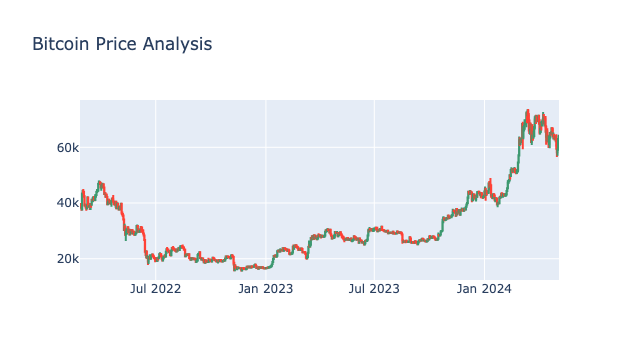

In [11]:
import plotly.graph_objects as go
figure = go.Figure(data=[go.Candlestick(x=data["Date"],
                                       open=data["Open"],
                                       high=data["High"],
                                       low=data["Low"],
                                       close=data["Close"])])
figure.update_layout(title = "Bitcoin Price Analysis", 
                     xaxis_rangeslider_visible=False)

In [13]:
correlation = data.corr()
print(correlation["Close"].sort_values(ascending=False))

Close        1.000000
Adj Close    1.000000
High         0.998817
Low          0.998622
Open         0.996991
Date         0.559092
Volume       0.234794
Name: Close, dtype: float64


In [15]:
pip install autots

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 830.2/830.2 kB 4.3 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [20]:
from autots import AutoTS
model = AutoTS(forecast_length=30, frequency="infer", ensemble= "simple")
model = model.fit(data, date_col = "Date", value_col= 'Close', id_col = None)
prediction= model.predict()
forecast = prediction.forecast
#print(forecast)

Using 4 cpus for n_jobs.
Data frequency is: D, used frequency is: D
Model Number: 1 with model ARIMA in generation 0 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.39814D+02    |proj g|=  4.85695D+02

At iterate    1    f=  8.78343D+00    |proj g|=  5.23527D-01


 This problem is unconstrained.



At iterate    2    f=  8.73143D+00    |proj g|=  4.76187D-01

At iterate    3    f=  8.44923D+00    |proj g|=  2.44236D-01

At iterate    4    f=  8.39640D+00    |proj g|=  1.92735D-01

At iterate    5    f=  8.35070D+00    |proj g|=  1.88792D-01

At iterate    6    f=  8.33941D+00    |proj g|=  1.56157D-01

At iterate    7    f=  8.33201D+00    |proj g|=  1.27662D-01

At iterate    8    f=  8.32832D+00    |proj g|=  1.16683D-01

At iterate    9    f=  8.32415D+00    |proj g|=  1.07647D-01

At iterate   10    f=  8.32047D+00    |proj g|=  1.05977D-01

At iterate   11    f=  8.31484D+00    |proj g|=  1.10583D-01

At iterate   12    f=  8.29885D+00    |proj g|=  3.78167D-02

At iterate   13    f=  8.29109D+00    |proj g|=  2.98275D-02

At iterate   14    f=  8.28688D+00    |proj g|=  8.12347D-02

At iterate   15    f=  8.28307D+00    |proj g|=  2.86936D-02

At iterate   16    f=  8.27960D+00    |proj g|=  2.19554D-02

At iterate   17    f=  8.27539D+00    |proj g|=  7.59179D-02

At iter

/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 8 with model DatepartRegression in generation 0 of 20
Epoch 1/50


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.4013
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 843us/step - loss: 0.3863
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 735us/step - loss: 0.3759
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3640 
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 950us/step - loss: 0.3544
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3520
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3539
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3527 
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3517
Epoch 10/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 990us/step - loss: 0.3531
Epoch 11/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3473
Epoch 12/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3467 
Epoch 13/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3454 
Epoch 14/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 990us/step - loss: 0.3476
Epoch 15/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3453
Epoch 16/50
25/2

/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 31 with model FBProphet in generation 0 of 20
Template Eval Error: ModuleNotFoundError("No module named 'fbprophet'") in model 31 in generation 0: FBProphet
Model Number: 32 with model MultivariateRegression in generation 0 of 20
Model Number: 33 with model MultivariateRegression in generation 0 of 20
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 33 in generation 0: MultivariateRegression
Model Number: 34 with model DatepartRegression in generation 0 of 20
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 34 in generation 0: DatepartRegression
Model Number: 35 with model SeasonalNaive in generation 0 of 20
Model Number: 36 with model DatepartRegression in generation 0 of 20
Model Number: 37 with model UnobservedComponents in generation 0 of 20
Model Number: 38 with model UnobservedComponents in generation 0 of 20
Model Number: 39 with model ETS in generation 0 of 20
Mod

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning:

overflow encountered in exp



Template Eval Error: ModuleNotFoundError("No module named 'fbprophet'") in model 64 in generation 0: FBProphet
Model Number: 65 with model UnobservedComponents in generation 0 of 20
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params pchip {'0': {'method': 'clip', 'std_threshold': 1, 'fillna': None}, '1': {'model': 'GLS', 'phi': 0.999, 'window': None, 'transform_dict': {'fillna': None, 'transformations': {'0': 'ScipyFilter'}, 'transformation_params': {'0': {'method': 'savgol_filter', 'method_args': {'window_length': 31, 'polyorder': 3, 'deriv': 0, 'mode': 'interp'}}}}}, '2': {'model': 'Linear', 'phi': 1, 'window': None, 'transform_dict': None}, '3': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 0.9, 'first_value_only': True}}") in model 65 in generation 0: UnobservedComponents
Model Number: 66 with model VAR in generation 0 of 20
Template Eval Error: ValueError('Only gave one variable to VAR') in model 66 in generation 0: VAR
Model Number:

 This problem is unconstrained.


Epoch 1/50


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Template Eval Error: InvalidArgumentError() in model 70 in generation 0: DatepartRegression
Model Number: 71 with model UnivariateRegression in generation 0 of 20


2024-05-07 17:10:07.578561: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: INVALID_ARGUMENT: Incompatible shapes: [32,22,1] vs. [32,1]
	 [[{{function_node __inference_one_step_on_data_38375}}{{node residual_wrapper_1/add}}]]


Model Number: 72 with model MultivariateRegression in generation 0 of 20
Model Number: 73 with model UnivariateMotif in generation 0 of 20
Model Number: 74 with model MultivariateMotif in generation 0 of 20
Model Number: 75 with model SectionalMotif in generation 0 of 20
Model Number: 76 with model NVAR in generation 0 of 20
Model Number: 77 with model Theta in generation 0 of 20
Model Number: 78 with model ARDL in generation 0 of 20
Model Number: 79 with model ARCH in generation 0 of 20
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 79 in generation 0: ARCH
Model Number: 80 with model MetricMotif in generation 0 of 20
Model Number: 81 with model SeasonalityMotif in generation 0 of 20
Model Number: 82 with model FBProphet in generation 0 of 20
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 82 in generation 0: FBProphet
Model Number: 83 with model WindowRegression in generation 0 of 20
Template Ev

/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.



Model Number: 99 with model Theta in generation 0 of 20
Model Number: 100 with model ETS in generation 0 of 20
Model Number: 101 with model DatepartRegression in generation 0 of 20
Model Number: 102 with model LastValueNaive in generation 0 of 20
Model Number: 103 with model WindowRegression in generation 0 of 20
Template Eval Error: ModuleNotFoundError("No module named 'lightgbm'") in model 103 in generation 0: WindowRegression
Model Number: 104 with model SeasonalityMotif in generation 0 of 20
Model Number: 105 with model VAR in generation 0 of 20
Template Eval Error: ValueError('Only gave one variable to VAR') in model 105 in generation 0: VAR
Model Number: 106 with model ETS in generation 0 of 20
Model Number: 107 with model SeasonalityMotif in generation 0 of 20
Model Number: 108 with model UnivariateMotif in generation 0 of 20
Model Number: 109 with model LastValueNaive in generation 0 of 20
Model Number: 110 with model SeasonalNaive in generation 0 of 20
Model Number: 111 with m

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:527: RuntimeWarning:

overflow encountered in exp

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:445: RuntimeWarning:

divide by zero encountered in divide

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning:

invalid value encountered in multiply

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning:

divide by zero encountered in divide

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:1243: RuntimeWarning:

invalid value encountered in multiply



Model Number: 125 with model Theta in generation 0 of 20
Model Number: 126 with model WindowRegression in generation 0 of 20
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 126 in generation 0: WindowRegression
Model Number: 127 with model SeasonalNaive in generation 0 of 20
Model Number: 128 with model AverageValueNaive in generation 0 of 20
Model Number: 129 with model MetricMotif in generation 0 of 20
Model Number: 130 with model UnivariateMotif in generation 0 of 20
Model Number: 131 with model ARCH in generation 0 of 20
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 131 in generation 0: ARCH
Model Number: 132 with model GLS in generation 0 of 20
Model Number: 133 with model DatepartRegression in generation 0 of 20
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 133 in generation 0: DatepartRegression
Model Number: 134 with model GLM in generat

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.



Model Number: 138 with model WindowRegression in generation 0 of 20
Template Eval Error: ModuleNotFoundError("No module named 'lightgbm'") in model 138 in generation 0: WindowRegression
Model Number: 139 with model MetricMotif in generation 0 of 20
Model Number: 140 with model ARDL in generation 0 of 20
Model Number: 141 with model SectionalMotif in generation 0 of 20
Model Number: 142 with model WindowRegression in generation 0 of 20
Template Eval Error: ModuleNotFoundError("No module named 'xgboost'") in model 142 in generation 0: WindowRegression
Model Number: 143 with model ConstantNaive in generation 0 of 20
Model Number: 144 with model WindowRegression in generation 0 of 20
Template Eval Error: ModuleNotFoundError("No module named 'lightgbm'") in model 144 in generation 0: WindowRegression
Model Number: 145 with model UnobservedComponents in generation 0 of 20
Template Eval Error: ValueError('Model UnobservedComponents returned NaN for one or more series. fail_on_forecast_nan=Tru

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.



RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.36405D-01    |proj g|=  4.95716D-01

At iterate    1    f= -5.37769D-01    |proj g|=  1.25503D-01

At iterate    2    f= -5.38066D-01    |proj g|=  8.50394D-02

At iterate    3    f= -5.40316D-01    |proj g|=  3.15643D-01

At iterate    4    f= -5.42309D-01    |proj g|=  4.31562D-01

At iterate    5    f= -5.44618D-01    |proj g|=  2.39376D-01

At iterate    6    f= -5.44967D-01    |proj g|=  5.04036D-02

At iterate    7    f= -5.44983D-01    |proj g|=  7.61498D-03


 This problem is unconstrained.



At iterate    8    f= -5.44985D-01    |proj g|=  7.52631D-03

At iterate    9    f= -5.44991D-01    |proj g|=  2.42730D-02

At iterate   10    f= -5.45004D-01    |proj g|=  4.41933D-02

At iterate   11    f= -5.45032D-01    |proj g|=  6.75379D-02

At iterate   12    f= -5.45076D-01    |proj g|=  7.47669D-02

At iterate   13    f= -5.45145D-01    |proj g|=  6.20804D-02

At iterate   14    f= -5.45180D-01    |proj g|=  2.42299D-02

At iterate   15    f= -5.45238D-01    |proj g|=  1.63099D-02

At iterate   16    f= -5.45255D-01    |proj g|=  2.28275D-02

At iterate   17    f= -5.45289D-01    |proj g|=  2.43369D-02

At iterate   18    f= -5.45346D-01    |proj g|=  5.10875D-03

At iterate   19    f= -5.45424D-01    |proj g|=  2.77203D-02

At iterate   20    f= -5.45478D-01    |proj g|=  2.18532D-02

At iterate   21    f= -5.45518D-01    |proj g|=  1.91450D-01

At iterate   22    f= -5.45790D-01    |proj g|=  6.39485D-02

At iterate   23    f= -5.45942D-01    |proj g|=  1.16548D-02

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 175 with model VAR in generation 0 of 20
Template Eval Error: ValueError('Only gave one variable to VAR') in model 175 in generation 0: VAR
Model Number: 176 with model UnobservedComponents in generation 0 of 20
Model Number: 177 with model DatepartRegression in generation 0 of 20
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 177 in generation 0: DatepartRegression
Model Number: 178 with model AverageValueNaive in generation 0 of 20
Model Number: 179 with model SeasonalityMotif in generation 0 of 20
Model Number: 180 with model ARIMA in generation 0 of 20
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 180 in generation 0: ARIMA
Model Number: 181 with model WindowRegression in generation 0 of 20
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params ffill {'0': {'method': 'clip', 'std_threshold': 4, 'fillna': None}, '1': {'model': 'Lin

 This problem is unconstrained.



At iterate    2    f=  8.39836D+00    |proj g|=  2.30750D-01

At iterate    3    f=  8.34675D+00    |proj g|=  4.37563D-02

At iterate    4    f=  8.34131D+00    |proj g|=  3.45205D-02

At iterate    5    f=  8.33683D+00    |proj g|=  3.85913D-02

At iterate    6    f=  8.33091D+00    |proj g|=  1.84852D-02

At iterate    7    f=  8.33043D+00    |proj g|=  1.69353D-02

At iterate    8    f=  8.33007D+00    |proj g|=  7.59860D-03

At iterate    9    f=  8.32973D+00    |proj g|=  1.17059D-02

At iterate   10    f=  8.32944D+00    |proj g|=  1.17007D-02

At iterate   11    f=  8.32911D+00    |proj g|=  1.09381D-02

At iterate   12    f=  8.32874D+00    |proj g|=  8.87649D-03

At iterate   13    f=  8.32860D+00    |proj g|=  1.02902D-02

At iterate   14    f=  8.32850D+00    |proj g|=  5.24670D-03

At iterate   15    f=  8.32849D+00    |proj g|=  1.13038D-03

At iterate   16    f=  8.32849D+00    |proj g|=  6.90836D-04

At iterate   17    f=  8.32848D+00    |proj g|=  6.19493D-04

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 189 with model UnobservedComponents in generation 1 of 20
Model Number: 190 with model ETS in generation 1 of 20
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params quadratic {'0': {}, '1': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}, '2': {}, '3': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True}}") in model 190 in generation 1: ETS
Model Number: 191 with model GLM in generation 1 of 20
Model Number: 192 with model SeasonalityMotif in generation 1 of 20
Model Number: 193 with model ARDL in generation 1 of 20
Template Eval Error: ValueError("ARDL series Close failed with error IndexError('tuple index out of range') exog train None and predict None") in model 193 in generation 1: ARDL
Model Number: 194 with model UnivariateRegression in generation 1 of 20


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.



Model Number: 195 with model Theta in generation 1 of 20
Model Number: 196 with model GLM in generation 1 of 20
Model Number: 197 with model MultivariateRegression in generation 1 of 20
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 197 in generation 1: MultivariateRegression
Model Number: 198 with model SeasonalNaive in generation 1 of 20
Model Number: 199 with model UnivariateMotif in generation 1 of 20
Model Number: 200 with model ETS in generation 1 of 20
Model Number: 201 with model SeasonalityMotif in generation 1 of 20
Model Number: 202 with model MultivariateMotif in generation 1 of 20
Model Number: 203 with model ConstantNaive in generation 1 of 20
Model Number: 204 with model ARIMA in generation 1 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.24069D+00    |proj g|=  3.242

 This problem is unconstrained.



At iterate   19    f=  8.23695D+00    |proj g|=  2.12073D-03

At iterate   20    f=  8.23694D+00    |proj g|=  2.57288D-04

At iterate   21    f=  8.23694D+00    |proj g|=  3.04991D-04

At iterate   22    f=  8.23694D+00    |proj g|=  2.11362D-04

At iterate   23    f=  8.23694D+00    |proj g|=  7.36241D-05

At iterate   24    f=  8.23694D+00    |proj g|=  7.36247D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     24     28      1     0     0   7.362D-05   8.237D+00
  F =   8.2369412356190495     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Model Number: 205 with model SeasonalNaive in gener

/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 209 with model UnobservedComponents in generation 1 of 20
Model Number: 210 with model LastValueNaive in generation 1 of 20
Model Number: 211 with model MultivariateRegression in generation 1 of 20
Model Number: 212 with model DatepartRegression in generation 1 of 20
Template Eval Error: Exception("Transformer BTCD failed on fit from params fake_date {'0': {'method': 'clip', 'std_threshold': 3.5, 'fillna': None}, '1': {'model': 'Linear', 'phi': 1, 'window': None, 'transform_dict': None}, '2': {'regression_model': {'model': 'LinearRegression', 'model_params': {}}, 'max_lags': 2}, '3': {'rows': 7, 'lag': 1, 'method': 'additive', 'strength': 0.9, 'first_value_only': False}}") in model 212 in generation 1: DatepartRegression
Model Number: 213 with model LastValueNaive in generation 1 of 20
Model Number: 214 with model NVAR in generation 1 of 20
Model Number: 215 with model MetricMotif in generation 1 of 20
Model Number: 216 with model ConstantNaive in generation 1 of 20
Model

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning:

invalid value encountered in log



Model Number: 235 with model GLS in generation 1 of 20
Model Number: 236 with model LastValueNaive in generation 1 of 20
Model Number: 237 with model GLS in generation 1 of 20
Model Number: 238 with model ConstantNaive in generation 1 of 20
Template Eval Error: Exception("Transformer Cointegration failed on fit from params ffill {'0': {'method': 'clip', 'std_threshold': 3, 'fillna': None}, '1': {'det_order': -1, 'k_ar_diff': 0}, '2': {'rows': 1, 'lag': 2, 'method': 'additive', 'strength': 0.9, 'first_value_only': False}, '3': {'window': None}}") in model 238 in generation 1: ConstantNaive
Model Number: 239 with model WindowRegression in generation 1 of 20
Model Number: 240 with model MetricMotif in generation 1 of 20
Model Number: 241 with model UnivariateMotif in generation 1 of 20
Model Number: 242 with model ConstantNaive in generation 1 of 20
Model Number: 243 with model SectionalMotif in generation 1 of 20
Template Eval Error: Exception("Transformer ReplaceConstant failed on fit f

/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 245 with model Theta in generation 1 of 20
Model Number: 246 with model ARIMA in generation 1 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.21837D+08    |proj g|=  2.80673D+09

At iterate    1    f=  4.49090D+05    |proj g|=  9.45460D+05


 This problem is unconstrained.



At iterate    2    f=  2.17251D+05    |proj g|=  5.07534D+05

At iterate    3    f=  2.08083D+04    |proj g|=  3.68982D+04

At iterate    4    f=  1.67885D+04    |proj g|=  2.95445D+04

At iterate    5    f=  7.53459D+03    |proj g|=  1.28826D+04

At iterate    6    f=  4.31780D+03    |proj g|=  7.22917D+03

At iterate    7    f=  2.27304D+03    |proj g|=  3.70854D+03

At iterate    8    f=  1.24415D+03    |proj g|=  1.97677D+03

At iterate    9    f=  6.74875D+02    |proj g|=  1.04083D+03

At iterate   10    f=  3.69506D+02    |proj g|=  5.51404D+02

At iterate   11    f=  2.02841D+02    |proj g|=  2.91541D+02

At iterate   12    f=  1.12021D+02    |proj g|=  1.54151D+02

At iterate   13    f=  6.22541D+01    |proj g|=  8.12311D+01

At iterate   14    f=  3.49319D+01    |proj g|=  4.25804D+01

At iterate   15    f=  1.99079D+01    |proj g|=  2.21314D+01

At iterate   16    f=  1.16446D+01    |proj g|=  1.13436D+01

At iterate   17    f=  7.10719D+00    |proj g|=  5.73268D+00

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   27    f=  5.43240D-01    |proj g|=  1.22571D+02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   17     27     73      2     1     0   1.226D+02   5.432D-01
  F =  0.54323975830711091     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Model Number: 247 with model ETS in generation 1 of 20
Template Eval Error: Exception("Transformer BTCD failed on fit from params quadratic {'0': {}, '1': {'regression_model': {'model': 'LinearRegression', 'model_params': {}}, 'max_lags': 2}}") in model 247 in generation 1: ETS
Model Number: 248 with model UnivariateRegression in generation 1 of 20
Model Numb

 This problem is unconstrained.



At iterate    3    f=  5.32471D+00    |proj g|=  1.40034D-01

At iterate    4    f=  5.26488D+00    |proj g|=  8.41655D-02

At iterate    5    f=  5.23873D+00    |proj g|=  3.88833D-02

At iterate    6    f=  5.23468D+00    |proj g|=  2.95965D-02

At iterate    7    f=  5.22463D+00    |proj g|=  1.91673D-02

At iterate    8    f=  5.19843D+00    |proj g|=  2.83500D-02

At iterate    9    f=  5.18308D+00    |proj g|=  1.95711D-02

At iterate   10    f=  5.17532D+00    |proj g|=  2.00094D-02

At iterate   11    f=  5.14807D+00    |proj g|=  3.33958D-02

At iterate   12    f=  5.04620D+00    |proj g|=  1.48583D-01

At iterate   13    f=  4.99259D+00    |proj g|=  3.01176D-01

At iterate   14    f=  4.82195D+00    |proj g|=  4.64459D-01
  ys=-1.258E+00  -gs= 2.415E-01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   15    f=  4.53615D+00    |proj g|=  3.52237D+00

At iterate   16    f=  4.41108D+00    |proj g|=  3.87092D+01
  ys=-1.017E+01  -gs= 1.216E+00 BFGS update SKIPPED

At iterate   17    f=  4.15446D+00    |proj g|=  7.98985D+00

At iterate   18    f=  4.15442D+00    |proj g|=  1.37220D+01

At iterate   19    f=  4.15439D+00    |proj g|=  1.18425D+01

At iterate   20    f=  4.15337D+00    |proj g|=  5.96246D+00

At iterate   21    f=  4.15335D+00    |proj g|=  1.20392D+01

At iterate   22    f=  4.15304D+00    |proj g|=  1.08101D+01

At iterate   23    f=  4.15299D+00    |proj g|=  1.12184D+01

At iterate   24    f=  4.15296D+00    |proj g|=  6.14758D+00

At iterate   25    f=  4.15293D+00    |proj g|=  1.29007D+01

At iterate   26    f=  4.15292D+00    |proj g|=  1.34741D+01

At iterate   27    f=  4.15292D+00    |proj g|=  1.34741D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored d


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/opt/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_fastica.py:583: UserWarning:

Ignoring n_components with whiten=False.

/opt/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_fastica.py:89: RuntimeWarning:

invalid value encountered in divide



Model Number: 256 with model ConstantNaive in generation 1 of 20
Model Number: 257 with model ETS in generation 1 of 20
Model Number: 258 with model MultivariateMotif in generation 1 of 20
Model Number: 259 with model DatepartRegression in generation 1 of 20
Template Eval Error: Exception("Transformer BTCD failed on fit from params fake_date {'0': {'method': 'clip', 'std_threshold': 3, 'fillna': None}, '1': {'model': 'GLS', 'phi': 1, 'window': None, 'transform_dict': None}, '2': {'regression_model': {'model': 'LinearRegression', 'model_params': {}}, 'max_lags': 2}, '3': {'output_distribution': 'uniform', 'n_quantiles': 1000}, '4': {}}") in model 259 in generation 1: DatepartRegression
Model Number: 260 with model ConstantNaive in generation 1 of 20
Model Number: 261 with model ETS in generation 1 of 20
Model Number: 262 with model MetricMotif in generation 1 of 20
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params ffill_mean_biased {'0': {'rows': 1

/opt/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Model Number: 265 with model LastValueNaive in generation 1 of 20
Model Number: 266 with model MultivariateMotif in generation 1 of 20
Model Number: 267 with model MultivariateRegression in generation 1 of 20
Template Eval Error: ModuleNotFoundError("No module named 'lightgbm'") in model 267 in generation 1: MultivariateRegression
Model Number: 268 with model ARDL in generation 1 of 20
Model Number: 269 with model LastValueNaive in generation 1 of 20
Model Number: 270 with model GLS in generation 1 of 20
Model Number: 271 with model SeasonalityMotif in generation 1 of 20
Model Number: 272 with model LastValueNaive in generation 1 of 20
Model Number: 273 with model ConstantNaive in generation 1 of 20
Model Number: 274 with model AverageValueNaive in generation 1 of 20
Model Number: 275 with model NVAR in generation 1 of 20
Model Number: 276 with model Theta in generation 1 of 20
Model Number: 277 with model ARIMA in generation 1 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine

 This problem is unconstrained.



At iterate    3    f= -2.03157D+00    |proj g|=  2.15030D-02

At iterate    4    f= -2.03158D+00    |proj g|=  1.61015D-01

At iterate    5    f= -2.03162D+00    |proj g|=  3.23422D-01

At iterate    6    f= -2.03171D+00    |proj g|=  5.93004D-01

At iterate    7    f= -2.03189D+00    |proj g|=  8.57745D-01

At iterate    8    f= -2.03216D+00    |proj g|=  9.03665D-01

At iterate    9    f= -2.03240D+00    |proj g|=  4.86789D-01

At iterate   10    f= -2.03247D+00    |proj g|=  7.30604D-02

At iterate   11    f= -2.03248D+00    |proj g|=  3.19652D-02

At iterate   12    f= -2.03248D+00    |proj g|=  5.01785D-02

At iterate   13    f= -2.03248D+00    |proj g|=  7.54683D-02

At iterate   14    f= -2.03249D+00    |proj g|=  1.12521D-01

At iterate   15    f= -2.03250D+00    |proj g|=  1.58881D-01

At iterate   16    f= -2.03252D+00    |proj g|=  1.91616D-01

At iterate   17    f= -2.03255D+00    |proj g|=  1.74858D-01

At iterate   18    f= -2.03255D+00    |proj g|=  1.12448D-01

At iter

/opt/anaconda3/lib/python3.11/site-packages/autots/tools/fast_kalman.py:1296: RuntimeWarning:

overflow encountered in matmul

/opt/anaconda3/lib/python3.11/site-packages/autots/tools/fast_kalman.py:1296: RuntimeWarning:

invalid value encountered in matmul

/opt/anaconda3/lib/python3.11/site-packages/autots/tools/fast_kalman.py:1309: RuntimeWarning:

overflow encountered in matmul

/opt/anaconda3/lib/python3.11/site-packages/autots/tools/fast_kalman.py:1309: RuntimeWarning:

invalid value encountered in matmul

/opt/anaconda3/lib/python3.11/site-packages/autots/tools/fast_kalman.py:1314: RuntimeWarning:

overflow encountered in multiply

/opt/anaconda3/lib/python3.11/site-packages/autots/tools/fast_kalman.py:1314: RuntimeWarning:

invalid value encountered in multiply



Model Number: 281 with model UnobservedComponents in generation 1 of 20
Model Number: 282 with model Theta in generation 1 of 20
Model Number: 283 with model MultivariateMotif in generation 1 of 20
Template Eval Error: Exception("Transformer BTCD failed on fit from params akima {'0': {'method': 'butter', 'method_args': {'N': 8, 'btype': 'highpass', 'analog': False, 'output': 'sos', 'Wn': 0.5}}, '1': {'regression_model': {'model': 'FastRidge', 'model_params': {}}, 'max_lags': 2}}") in model 283 in generation 1: MultivariateMotif
Model Number: 284 with model ETS in generation 1 of 20
Model Number: 285 with model SeasonalNaive in generation 1 of 20
Model Number: 286 with model GLS in generation 1 of 20
Model Number: 287 with model GLM in generation 1 of 20
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params cubic {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True}, '1': {'rows': 1, 'lag': 1, 'method': 'additive'

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=1.38533e-25): result may not be accurate.

/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

 This problem is unconstrained.


Model Number: 314 with model ARIMA in generation 2 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.33523D+00    |proj g|=  9.72215D-02

At iterate    1    f=  8.32596D+00    |proj g|=  6.16291D-03

At iterate    2    f=  8.32592D+00    |proj g|=  3.17169D-03

At iterate    3    f=  8.32591D+00    |proj g|=  2.35507D-03

At iterate    4    f=  8.32588D+00    |proj g|=  3.29054D-03

At iterate    5    f=  8.32579D+00    |proj g|=  9.72004D-03

At iterate    6    f=  8.32493D+00    |proj g|=  4.77337D-02

At iterate    7    f=  8.32481D+00    |proj g|=  5.46659D-02

At iterate    8    f=  8.32447D+00    |proj g|=  6.59144D-02

At iterate    9    f=  8.32383D+00    |proj g|=  6.79054D-02

At iterate   10    f=  8.32157D+00    |proj g|=  5.40732D-02

At iterate   11    f=  8.32081D+00    |proj g|=  5.46214D-02

At iterate   12    f=  8.31890D

 This problem is unconstrained.



At iterate    3    f= -2.74501D-01    |proj g|=  1.29980D-01

At iterate    4    f= -2.75400D-01    |proj g|=  7.37836D-02

At iterate    5    f= -2.76214D-01    |proj g|=  1.28633D-01

At iterate    6    f= -2.81998D-01    |proj g|=  3.91430D-01

At iterate    7    f= -2.86724D-01    |proj g|=  3.82461D-01

At iterate    8    f= -2.95225D-01    |proj g|=  2.79873D-01

At iterate    9    f= -3.04319D-01    |proj g|=  5.89714D-02

At iterate   10    f= -3.06542D-01    |proj g|=  5.77822D-02

At iterate   11    f= -3.07824D-01    |proj g|=  3.80263D-02

At iterate   12    f= -3.08639D-01    |proj g|=  2.03563D-01

At iterate   13    f= -3.09361D-01    |proj g|=  2.86919D-02

At iterate   14    f= -3.09493D-01    |proj g|=  2.64069D-02

At iterate   15    f= -3.09669D-01    |proj g|=  4.14514D-02

At iterate   16    f= -3.09795D-01    |proj g|=  1.61316D-02

At iterate   17    f= -3.09820D-01    |proj g|=  4.27855D-03

At iterate   18    f= -3.09828D-01    |proj g|=  4.44066D-03

At iter

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning:

overflow encountered in exp

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=1.38533e-25): result may not be accurate.



Model Number: 339 with model DatepartRegression in generation 2 of 20
Model Number: 340 with model Theta in generation 2 of 20
Model Number: 341 with model ConstantNaive in generation 2 of 20
Model Number: 342 with model ARDL in generation 2 of 20
Model Number: 343 with model NVAR in generation 2 of 20
Model Number: 344 with model WindowRegression in generation 2 of 20
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 344 in generation 2: WindowRegression
Model Number: 345 with model AverageValueNaive in generation 2 of 20
Model Number: 346 with model LastValueNaive in generation 2 of 20
Model Number: 347 with model ARIMA in generation 2 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.25791D+00    |proj g|=  1.18265D-01

At iterate    1    f=  8.24837D+00    |proj g|=  5.77189D-02

At itera

 This problem is unconstrained.



At iterate    6    f=  8.24571D+00    |proj g|=  1.79693D-03

At iterate    7    f=  8.24569D+00    |proj g|=  1.86824D-03

At iterate    8    f=  8.24564D+00    |proj g|=  6.64467D-03

At iterate    9    f=  8.24551D+00    |proj g|=  1.28493D-02

At iterate   10    f=  8.24534D+00    |proj g|=  2.45453D-02

At iterate   11    f=  8.24505D+00    |proj g|=  1.77379D-02

At iterate   12    f=  8.24466D+00    |proj g|=  2.47409D-02

At iterate   13    f=  8.24446D+00    |proj g|=  6.32984D-03

At iterate   14    f=  8.24441D+00    |proj g|=  2.96168D-03

At iterate   15    f=  8.24438D+00    |proj g|=  2.07079D-03

At iterate   16    f=  8.24437D+00    |proj g|=  2.34892D-03

At iterate   17    f=  8.24437D+00    |proj g|=  8.39962D-04

At iterate   18    f=  8.24437D+00    |proj g|=  1.04033D-04

At iterate   19    f=  8.24437D+00    |proj g|=  8.52982D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:307: DomainWarning:

The InversePower link function does not respect the domain of the Gamma family.



Model Number: 353 with model AverageValueNaive in generation 2 of 20
Model Number: 354 with model GLM in generation 2 of 20
Template Eval Error: ValueError('The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.') in model 354 in generation 2: GLM
Model Number: 355 with model ConstantNaive in generation 2 of 20
Model Number: 356 with model Theta in generation 2 of 20
Model Number: 357 with model AverageValueNaive in generation 2 of 20
Model Number: 358 with model UnobservedComponents in generation 2 of 20
Model Number: 359 with model WindowRegression in generation 2 of 20
Model Number: 360 with model UnobservedComponents in generation 2 of 20


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning:

invalid value encountered in log



Model Number: 361 with model LastValueNaive in generation 2 of 20
Model Number: 362 with model UnivariateMotif in generation 2 of 20
Model Number: 363 with model AverageValueNaive in generation 2 of 20
Model Number: 364 with model ConstantNaive in generation 2 of 20
Model Number: 365 with model DatepartRegression in generation 2 of 20
Model Number: 366 with model ConstantNaive in generation 2 of 20
Model Number: 367 with model NVAR in generation 2 of 20
Model Number: 368 with model MultivariateMotif in generation 2 of 20
Model Number: 369 with model LastValueNaive in generation 2 of 20
Model Number: 370 with model SeasonalNaive in generation 2 of 20
Model Number: 371 with model MetricMotif in generation 2 of 20
Model Number: 372 with model SeasonalityMotif in generation 2 of 20
Model Number: 373 with model ARDL in generation 2 of 20
Model Number: 374 with model UnivariateRegression in generation 2 of 20
Model Number: 375 with model ARDL in generation 2 of 20
Template Eval Error: Except

/opt/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_regression.py:494: UserWarning:

One or more samples have no neighbors within specified radius; predicting NaN.



RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.11294D+00    |proj g|=  3.98200D+00

At iterate    1    f=  8.34509D-01    |proj g|=  5.66799D-01



 This problem is unconstrained.


At iterate    2    f=  7.39906D-01    |proj g|=  3.06336D-01

At iterate    3    f=  6.97017D-01    |proj g|=  6.15517D-01

At iterate    4    f=  5.86738D-01    |proj g|=  6.92902D-01

At iterate    5    f=  5.04747D-01    |proj g|=  9.56420D-02

At iterate    6    f=  4.85841D-01    |proj g|=  2.11317D-01

At iterate    7    f=  4.59335D-01    |proj g|=  1.32326D-01

At iterate    8    f=  4.35846D-01    |proj g|=  1.66590D-01

At iterate    9    f=  3.89350D-01    |proj g|=  8.59445D-02

At iterate   10    f=  3.72093D-01    |proj g|=  1.37238D-01

At iterate   11    f=  3.52443D-01    |proj g|=  2.89207D-01

At iterate   12    f=  3.42308D-01    |proj g|=  1.86206D-01

At iterate   13    f=  3.31075D-01    |proj g|=  6.37962D-02

At iterate   14    f=  3.25396D-01    |proj g|=  2.25663D-01

At iterate   15    f=  3.19517D-01    |proj g|=  1.03193D-01

At iterate   16    f=  3.16784D-01    |proj g|=  4.74106D-02

At iterate   17    f=  3.14606D-01    |proj g|=  8.93328D-02

At itera

/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

 This problem is unconstrained.


Model Number: 388 with model ARIMA in generation 2 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.54907D+00    |proj g|=  5.97929D-01

At iterate    1    f=  8.32051D+00    |proj g|=  2.41106D-01

At iterate    2    f=  8.24724D+00    |proj g|=  3.80596D-02

At iterate    3    f=  8.24233D+00    |proj g|=  3.27416D-02

At iterate    4    f=  8.23509D+00    |proj g|=  2.65997D-02

At iterate    5    f=  8.23268D+00    |proj g|=  6.57001D-02

At iterate    6    f=  8.22746D+00    |proj g|=  1.94500D-02

At iterate    7    f=  8.22527D+00    |proj g|=  1.19157D-02

At iterate    8    f=  8.22401D+00    |proj g|=  6.88915D-03

At iterate    9    f=  8.22381D+00    |proj g|=  1.53465D-02

At iterate   10    f=  8.22355D+00    |proj g|=  2.76809D-03

At iterate   11    f=  8.22354D+00    |proj g|=  6.33852D-04

At iterate   12    f=  8.22354D

 This problem is unconstrained.



At iterate    3    f=  8.19404D+00    |proj g|=  2.65405D-03

At iterate    4    f=  8.19403D+00    |proj g|=  8.50035D-04

At iterate    5    f=  8.19403D+00    |proj g|=  3.97407D-04

At iterate    6    f=  8.19403D+00    |proj g|=  2.85269D-04

At iterate    7    f=  8.19403D+00    |proj g|=  4.44599D-04

At iterate    8    f=  8.19402D+00    |proj g|=  7.60990D-04

At iterate    9    f=  8.19402D+00    |proj g|=  1.42120D-03

At iterate   10    f=  8.19401D+00    |proj g|=  2.33129D-03

At iterate   11    f=  8.19400D+00    |proj g|=  3.35963D-03

At iterate   12    f=  8.19398D+00    |proj g|=  3.37346D-03

At iterate   13    f=  8.19397D+00    |proj g|=  4.10479D-03

At iterate   14    f=  8.19395D+00    |proj g|=  1.98906D-03

At iterate   15    f=  8.19395D+00    |proj g|=  4.35988D-04

At iterate   16    f=  8.19395D+00    |proj g|=  3.87987D-04

At iterate   17    f=  8.19395D+00    |proj g|=  1.48558D-04

At iterate   18    f=  8.19395D+00    |proj g|=  1.48557D-04

At iter

 This problem is unconstrained.



At iterate    3    f=  8.85523D+00    |proj g|=  3.10819D-01

At iterate    4    f=  8.68341D+00    |proj g|=  1.67172D-01

At iterate    5    f=  8.58307D+00    |proj g|=  1.14164D-01

At iterate    6    f=  8.48910D+00    |proj g|=  8.57369D-02

At iterate    7    f=  8.42138D+00    |proj g|=  8.56887D-02

At iterate    8    f=  8.38816D+00    |proj g|=  8.26285D-02

At iterate    9    f=  8.36264D+00    |proj g|=  5.24661D-02

At iterate   10    f=  8.31159D+00    |proj g|=  1.34223D-01

At iterate   11    f=  8.28991D+00    |proj g|=  1.03598D-01

At iterate   12    f=  8.28666D+00    |proj g|=  9.90810D-02

At iterate   13    f=  8.28277D+00    |proj g|=  7.12678D-02

At iterate   14    f=  8.27702D+00    |proj g|=  3.52604D-02

At iterate   15    f=  8.27540D+00    |proj g|=  7.58184D-03

At iterate   16    f=  8.27522D+00    |proj g|=  7.62722D-03

At iterate   17    f=  8.27500D+00    |proj g|=  8.74082D-03

At iterate   18    f=  8.27460D+00    |proj g|=  1.72443D-02

At iter

/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=1.38533e-25): result may not be accurate.

 This problem is unconstrained.


Model Number: 469 with model ARIMA in generation 3 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.25791D+00    |proj g|=  1.18265D-01

At iterate    1    f=  8.24837D+00    |proj g|=  5.77189D-02

At iterate    2    f=  8.24631D+00    |proj g|=  2.62809D-02

At iterate    3    f=  8.24580D+00    |proj g|=  9.28990D-03

At iterate    4    f=  8.24573D+00    |proj g|=  3.08000D-03

At iterate    5    f=  8.24571D+00    |proj g|=  1.74032D-03

At iterate    6    f=  8.24571D+00    |proj g|=  1.79693D-03

At iterate    7    f=  8.24569D+00    |proj g|=  1.86824D-03

At iterate    8    f=  8.24564D+00    |proj g|=  6.64467D-03

At iterate    9    f=  8.24551D+00    |proj g|=  1.28493D-02

At iterate   10    f=  8.24534D+00    |proj g|=  2.45453D-02

At iterate   11    f=  8.24505D+00    |proj g|=  1.77379D-02

At iterate   12    f=  8.24466D

 This problem is unconstrained.



At iterate   41    f= -3.21506D+00    |proj g|=  3.30719D+01

At iterate   42    f= -3.22081D+00    |proj g|=  3.03111D+01

At iterate   43    f= -3.32644D+00    |proj g|=  2.32283D+01

At iterate   44    f= -3.37791D+00    |proj g|=  4.13873D+00

At iterate   45    f= -3.39225D+00    |proj g|=  1.14206D+00

At iterate   46    f= -3.43463D+00    |proj g|=  8.55747D+00

At iterate   47    f= -3.55560D+00    |proj g|=  3.23194D+01

At iterate   48    f= -3.61702D+00    |proj g|=  3.33772D+01

At iterate   49    f= -3.62074D+00    |proj g|=  4.64700D+01

At iterate   50    f= -3.64641D+00    |proj g|=  9.88704D+00

At iterate   51    f= -3.66304D+00    |proj g|=  7.47979D+00

At iterate   52    f= -3.66719D+00    |proj g|=  1.96715D+01

At iterate   53    f= -3.67175D+00    |proj g|=  1.14265D+00

At iterate   54    f= -3.67219D+00    |proj g|=  5.69037D-01

At iterate   55    f= -3.67228D+00    |proj g|=  3.10039D-01

At iterate   56    f= -3.67229D+00    |proj g|=  2.83831D-02

At iter

 This problem is unconstrained.



At iterate    7    f=  8.50443D+00    |proj g|=  1.41593D-01

At iterate    8    f=  8.47411D+00    |proj g|=  2.08824D-01

At iterate    9    f=  8.44822D+00    |proj g|=  1.27050D-01

At iterate   10    f=  8.43797D+00    |proj g|=  5.30315D-02

At iterate   11    f=  8.43160D+00    |proj g|=  4.35386D-02

At iterate   12    f=  8.42868D+00    |proj g|=  4.35314D-02

At iterate   13    f=  8.42663D+00    |proj g|=  3.74891D-02

At iterate   14    f=  8.42477D+00    |proj g|=  4.81662D-02

At iterate   15    f=  8.42317D+00    |proj g|=  1.69410D-02

At iterate   16    f=  8.42259D+00    |proj g|=  1.15475D-02

At iterate   17    f=  8.42215D+00    |proj g|=  1.02580D-02

At iterate   18    f=  8.42176D+00    |proj g|=  1.00532D-02

At iterate   19    f=  8.42132D+00    |proj g|=  1.41471D-02

At iterate   20    f=  8.42086D+00    |proj g|=  2.08985D-02

At iterate   21    f=  8.42019D+00    |proj g|=  2.01657D-02

At iterate   22    f=  8.41934D+00    |proj g|=  6.35658D-02

At iter

 This problem is unconstrained.



At iterate    2    f= -4.48226D+00    |proj g|=  2.05281D+02
  ys=-6.742E-13  -gs= 4.870E-08 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate    3    f= -4.99126D+00    |proj g|=  5.74036D+01

At iterate    4    f= -4.99130D+00    |proj g|=  2.11666D+01

At iterate    5    f= -4.99150D+00    |proj g|=  2.04770D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14      6    101      3     1     0   2.048D+00  -4.991D+00
  F =  -4.9914978764541322     

ABNORMAL_TERMINATION_IN_LNSRCH                              
Model Number: 480 with model NVAR in generation 3 of 20
Model Number: 481 with model NVAR in generation 3 of 20
Model Number: 482 with model AverageValueNaive in generation 3 of 20



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


Model Number: 483 with model WindowRegression in generation 3 of 20
Model Number: 484 with model UnivariateMotif in generation 3 of 20
Model Number: 485 with model MultivariateMotif in generation 3 of 20
Model Number: 486 with model DatepartRegression in generation 3 of 20
Model Number: 487 with model UnivariateRegression in generation 3 of 20
Model Number: 488 with model SeasonalityMotif in generation 3 of 20
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params nearest {'0': {'rows': 1, 'lag': 1, 'method': 'multiplicative', 'strength': 1.0, 'first_value_only': False}, '1': {'low': 6, 'high': 32, 'K': 1, 'lanczos_factor': False, 'return_diff': True}, '2': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True}}") in model 488 in generation 3: SeasonalityMotif
Model Number: 489 with model UnobservedComponents in generation 3 of 20
Model Number: 490 with model GLM in generation 3 of 20
Model Number: 491 with model GLM in 

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning:

overflow encountered in exp

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:527: RuntimeWarning:

overflow encountered in exp

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning:

invalid value encountered in multiply

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:1243: RuntimeWarning:

invalid value encountered in multiply



Model Number: 495 with model NVAR in generation 3 of 20
Model Number: 496 with model UnobservedComponents in generation 3 of 20
Model Number: 497 with model LastValueNaive in generation 3 of 20
Model Number: 498 with model MetricMotif in generation 3 of 20
Model Number: 499 with model WindowRegression in generation 3 of 20
Template Eval Error: ModuleNotFoundError("No module named 'lightgbm'") in model 499 in generation 3: WindowRegression
Model Number: 500 with model GLM in generation 3 of 20
Model Number: 501 with model MultivariateRegression in generation 3 of 20
Model Number: 502 with model SeasonalNaive in generation 3 of 20
Model Number: 503 with model UnobservedComponents in generation 3 of 20
Template Eval Error: ValueError('Model UnobservedComponents returned NaN for one or more series. fail_on_forecast_nan=True') in model 503 in generation 3: UnobservedComponents
Model Number: 504 with model UnobservedComponents in generation 3 of 20
Model Number: 505 with model GLM in generat

 This problem is unconstrained.



At iterate    1    f=  8.23493D+00    |proj g|=  2.10842D-02

At iterate    2    f=  8.23419D+00    |proj g|=  6.14230D-03

At iterate    3    f=  8.23412D+00    |proj g|=  2.93854D-03

At iterate    4    f=  8.23410D+00    |proj g|=  9.51626D-04

At iterate    5    f=  8.23410D+00    |proj g|=  2.83266D-04

At iterate    6    f=  8.23410D+00    |proj g|=  2.42072D-04

At iterate    7    f=  8.23410D+00    |proj g|=  3.44421D-04

At iterate    8    f=  8.23410D+00    |proj g|=  8.95949D-04

At iterate    9    f=  8.23410D+00    |proj g|=  1.64517D-03

At iterate   10    f=  8.23409D+00    |proj g|=  2.72445D-03

At iterate   11    f=  8.23407D+00    |proj g|=  3.64188D-03

At iterate   12    f=  8.23406D+00    |proj g|=  3.23863D-03

At iterate   13    f=  8.23405D+00    |proj g|=  3.38110D-03

At iterate   14    f=  8.23404D+00    |proj g|=  1.52662D-03

At iterate   15    f=  8.23403D+00    |proj g|=  6.31971D-04

At iterate   16    f=  8.23403D+00    |proj g|=  3.23856D-04

At iter

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning:

invalid value encountered in log



Model Number: 517 with model ConstantNaive in generation 3 of 20
Model Number: 518 with model DatepartRegression in generation 3 of 20
Model Number: 519 with model AverageValueNaive in generation 3 of 20
Model Number: 520 with model AverageValueNaive in generation 3 of 20
Model Number: 521 with model AverageValueNaive in generation 3 of 20
Model Number: 522 with model ARDL in generation 3 of 20


/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=1.38533e-25): result may not be accurate.



Model Number: 523 with model MultivariateRegression in generation 3 of 20
Model Number: 524 with model LastValueNaive in generation 3 of 20
Model Number: 525 with model Theta in generation 3 of 20
Model Number: 526 with model AverageValueNaive in generation 3 of 20
Model Number: 527 with model SeasonalNaive in generation 3 of 20
Model Number: 528 with model SectionalMotif in generation 3 of 20
Model Number: 529 with model UnobservedComponents in generation 3 of 20
Model Number: 530 with model MultivariateRegression in generation 3 of 20
Model Number: 531 with model UnobservedComponents in generation 3 of 20
Template Eval Error: LinAlgError('Singular matrix') in model 531 in generation 3: UnobservedComponents
Model Number: 532 with model UnivariateMotif in generation 3 of 20
Model Number: 533 with model ConstantNaive in generation 3 of 20
Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'ffill', 'transformations': {'0': 'AlignLastValue', 

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.440e+10, tolerance: 1.143e+07



Model Number: 548 with model NVAR in generation 3 of 20
Model Number: 549 with model MultivariateMotif in generation 3 of 20
Model Number: 550 with model SeasonalNaive in generation 3 of 20
Model Number: 551 with model UnivariateRegression in generation 3 of 20
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 551 in generation 3: UnivariateRegression
Model Number: 552 with model UnivariateMotif in generation 3 of 20
Model Number: 553 with model Theta in generation 3 of 20
Model Number: 554 with model ARDL in generation 3 of 20
Model Number: 555 with model SeasonalityMotif in generation 3 of 20
Model Number: 556 with model Theta in generation 3 of 20
New Generation: 4 of 20
Model Number: 557 with model SeasonalityMotif in generation 4 of 20
Model Number: 558 with model UnobservedComponents in generation 4 of 20
Model Number: 559 with model NVAR in generation 4 of 20
Model Number: 560 with model UnivariateMotif in generation 4 of 20
Mo

 This problem is unconstrained.



At iterate    1    f=  8.31906D+00    |proj g|=  5.63309D-02

At iterate    2    f=  8.31782D+00    |proj g|=  1.21099D-02

At iterate    3    f=  8.31768D+00    |proj g|=  8.19044D-03

At iterate    4    f=  8.31750D+00    |proj g|=  4.02425D-03

At iterate    5    f=  8.31744D+00    |proj g|=  6.97275D-03

At iterate    6    f=  8.31721D+00    |proj g|=  9.12303D-03

At iterate    7    f=  8.31687D+00    |proj g|=  1.33247D-02

At iterate    8    f=  8.31639D+00    |proj g|=  1.37988D-02

At iterate    9    f=  8.31604D+00    |proj g|=  4.73669D-03

At iterate   10    f=  8.31595D+00    |proj g|=  3.15727D-03

At iterate   11    f=  8.31589D+00    |proj g|=  4.61145D-03

At iterate   12    f=  8.31577D+00    |proj g|=  1.73248D-02

At iterate   13    f=  8.31565D+00    |proj g|=  1.49853D-02

At iterate   14    f=  8.31551D+00    |proj g|=  9.48279D-03

At iterate   15    f=  8.31527D+00    |proj g|=  1.07106D-02

At iterate   16    f=  8.31519D+00    |proj g|=  3.62081D-03

At iter

/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 583 with model WindowRegression in generation 4 of 20
Model Number: 584 with model GLS in generation 4 of 20
Model Number: 585 with model MultivariateRegression in generation 4 of 20
Model Number: 586 with model NVAR in generation 4 of 20
Model Number: 587 with model MultivariateMotif in generation 4 of 20
Model Number: 588 with model ConstantNaive in generation 4 of 20
Model Number: 589 with model SeasonalityMotif in generation 4 of 20
Model Number: 590 with model SeasonalNaive in generation 4 of 20
Model Number: 591 with model Theta in generation 4 of 20
Model Number: 592 with model WindowRegression in generation 4 of 20
Model Number: 593 with model NVAR in generation 4 of 20
Model Number: 594 with model NVAR in generation 4 of 20


/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

 This problem is unconstrained.


Model Number: 595 with model ARIMA in generation 4 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.41250D+00    |proj g|=  2.76650D-01

At iterate    1    f=  8.37695D+00    |proj g|=  4.21935D-02

At iterate    2    f=  8.37549D+00    |proj g|=  1.99257D-02

At iterate    3    f=  8.37494D+00    |proj g|=  1.78707D-02

At iterate    4    f=  8.37271D+00    |proj g|=  1.74908D-02

At iterate    5    f=  8.37136D+00    |proj g|=  2.60052D-02

At iterate    6    f=  8.36943D+00    |proj g|=  2.25189D-02

At iterate    7    f=  8.36789D+00    |proj g|=  2.40466D-02

At iterate    8    f=  8.36720D+00    |proj g|=  3.50998D-03

At iterate    9    f=  8.36710D+00    |proj g|=  1.26765D-03

At iterate   10    f=  8.36706D+00    |proj g|=  1.24389D-03

At iterate   11    f=  8.36696D+00    |proj g|=  4.70080D-03

At iterate   12    f=  8.36675D

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning:

invalid value encountered in log



Model Number: 604 with model UnobservedComponents in generation 4 of 20
Model Number: 605 with model Theta in generation 4 of 20
Model Number: 606 with model MetricMotif in generation 4 of 20
Model Number: 607 with model ConstantNaive in generation 4 of 20
Model Number: 608 with model AverageValueNaive in generation 4 of 20
Model Number: 609 with model WindowRegression in generation 4 of 20
Model Number: 610 with model DatepartRegression in generation 4 of 20
Model Number: 611 with model SeasonalityMotif in generation 4 of 20


/opt/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Model Number: 612 with model ETS in generation 4 of 20
Model Number: 613 with model ARIMA in generation 4 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.26091D+00    |proj g|=  5.15874D-03

At iterate    1    f=  8.26090D+00    |proj g|=  1.12685D-03

At iterate    2    f=  8.26090D+00    |proj g|=  1.04896D-04

At iterate    3    f=  8.26090D+00    |proj g|=  1.16744D-04

At iterate    4    f=  8.26090D+00    |proj g|=  3.79469D-04

At iterate    5    f=  8.26089D+00    |proj g|=  9.69245D-04

At iterate    6    f=  8.26089D+00    |proj g|=  1.81310D-03

At iterate    7    f=  8.26089D+00    |proj g|=  3.20444D-03

At iterate    8    f=  8.26088D+00    |proj g|=  5.26834D-03

At iterate    9    f=  8.26085D+00    |proj g|=  8.06893D-03

At iterate   10    f=  8.26078D+00    |proj g|=  1.08659D-02

At iterate   11    f=  8.26067D+00    

 This problem is unconstrained.


Model Number: 618 with model UnobservedComponents in generation 4 of 20
Model Number: 619 with model ETS in generation 4 of 20
Model Number: 620 with model SeasonalNaive in generation 4 of 20
Model Number: 621 with model Theta in generation 4 of 20
Model Number: 622 with model Theta in generation 4 of 20
Model Number: 623 with model Theta in generation 4 of 20
Model Number: 624 with model UnivariateRegression in generation 4 of 20
Model Number: 625 with model LastValueNaive in generation 4 of 20
Model Number: 626 with model GLS in generation 4 of 20
Model Number: 627 with model ARDL in generation 4 of 20
Model Number: 628 with model ConstantNaive in generation 4 of 20
Model Number: 629 with model AverageValueNaive in generation 4 of 20
Template Eval Error: Exception("Transformer QuantileTransformer failed on inverse from params fake_date {'0': {'sigma': 2, 'rolling_window': 90, 'run_order': 'season_first', 'regression_params': {'regression_model': {'model': 'DecisionTree', 'model_param

/opt/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

 This problem is unconstrained.


Model Number: 635 with model SeasonalNaive in generation 4 of 20
Model Number: 636 with model MultivariateRegression in generation 4 of 20


/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_linear_loss.py:289: RuntimeWarning:

invalid value encountered in matmul



Model Number: 637 with model NVAR in generation 4 of 20
Model Number: 638 with model SectionalMotif in generation 4 of 20
Model Number: 639 with model UnivariateMotif in generation 4 of 20
Model Number: 640 with model ARIMA in generation 4 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.14572D+00    |proj g|=  3.17743D-01

At iterate    1    f= -3.14574D+00    |proj g|=  5.38014D-01

At iterate    2    f= -3.15268D+00    |proj g|=  2.08711D+00

At iterate    3    f= -3.19748D+00    |proj g|=  1.57191D+00

At iterate    4    f= -3.19761D+00    |proj g|=  2.71523D-01

At iterate    5    f= -3.19763D+00    |proj g|=  5.13024D-01

At iterate    6    f= -3.19766D+00    |proj g|=  6.36559D-01

At iterate    7    f= -3.19768D+00    |proj g|=  4.41881D-01

At iterate    8    f= -3.19769D+00    |proj g|=  1.21774D-01

At iterate    9    f= -3.197

 This problem is unconstrained.


Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params akima {'0': {}, '1': {'rows': 2, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True}, '2': {'method': 'rolling_zscore', 'method_params': {'distribution': 'norm', 'alpha': 0.1, 'rolling_periods': 28, 'center': False}, 'fillna': 'linear', 'transform_dict': {'transformations': {'0': 'DatepartRegression'}, 'transformation_params': {'0': {'datepart_method': 'simple_3', 'regression_model': {'model': 'ElasticNet', 'model_params': {}}}}}, 'isolated_only': True}, '3': {'fixed': True, 'window': 60, 'macro_micro': False, 'center': True}}") in model 645 in generation 4: UnivariateMotif
Model Number: 646 with model UnobservedComponents in generation 4 of 20
Template Eval Error: ValueError('Model UnobservedComponents returned NaN for one or more series. fail_on_forecast_nan=True') in model 646 in generation 4: UnobservedComponents
Model Number: 647 with model DatepartRegression in generati

/opt/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_fastica.py:708: FutureWarning:

Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.



Model Number: 664 with model MultivariateMotif in generation 4 of 20
Model Number: 665 with model ConstantNaive in generation 4 of 20
Model Number: 666 with model ETS in generation 4 of 20
Model Number: 667 with model UnivariateMotif in generation 4 of 20
Model Number: 668 with model MultivariateRegression in generation 4 of 20
Model Number: 669 with model UnobservedComponents in generation 4 of 20
Model Number: 670 with model NVAR in generation 4 of 20
Model Number: 671 with model MultivariateMotif in generation 4 of 20
Model Number: 672 with model NVAR in generation 4 of 20
Model Number: 673 with model NVAR in generation 4 of 20
Template Eval Error: ValueError('Model NVAR returned NaN for one or more series. fail_on_forecast_nan=True') in model 673 in generation 4: NVAR
Model Number: 674 with model AverageValueNaive in generation 4 of 20
Model Number: 675 with model MultivariateMotif in generation 4 of 20
Model Number: 676 with model GLM in generation 4 of 20


/opt/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_fastica.py:708: FutureWarning:

Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:307: DomainWarning:

The InversePower link function does not respect the domain of the Gamma family.



Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 676 in generation 4: GLM
Model Number: 677 with model UnivariateMotif in generation 4 of 20
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params akima {'0': {}, '1': {'rows': 2, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True}, '2': {'method': 'rolling_zscore', 'method_params': {'distribution': 'norm', 'alpha': 0.1, 'rolling_periods': 28, 'center': False}, 'fillna': 'linear', 'transform_dict': {'transformations': {'0': 'DatepartRegression'}, 'transformation_params': {'0': {'datepart_method': 'simple_3', 'regression_model': {'model': 'ElasticNet', 'model_params': {}}}}}, 'isolated_only': True}}") in model 677 in generation 4: UnivariateMotif
Model Number: 678 with model SeasonalNaive in generation 4 of 20
Model Number: 679 with model ARDL in generation 4 of 20


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning:

overflow encountered in square

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:325: RuntimeWarning:

divide by zero encountered in power

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:775: RuntimeWarning:

invalid value encountered in divide

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:813: RuntimeWarning:

invalid value encountered in divide

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning:

invalid value encountered in multiply

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:1243: RuntimeWarning:

invalid value encountered in multiply



Model Number: 680 with model ARIMA in generation 4 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.99673D+05    |proj g|=  5.25913D+06

At iterate    1    f=  4.18070D+02    |proj g|=  9.49087D+02

At iterate    2    f=  3.30216D+02    |proj g|=  7.55536D+02

At iterate    3    f=  1.44307D+02    |proj g|=  3.38802D+02


 This problem is unconstrained.



At iterate    4    f=  8.05144D+01    |proj g|=  1.91828D+02

At iterate    5    f=  4.12946D+01    |proj g|=  9.92844D+01

At iterate    6    f=  2.21919D+01    |proj g|=  5.30480D+01

At iterate    7    f=  1.20394D+01    |proj g|=  2.78767D+01

At iterate    8    f=  6.83375D+00    |proj g|=  1.46719D+01

At iterate    9    f=  4.13560D+00    |proj g|=  7.68382D+00

At iterate   10    f=  2.74769D+00    |proj g|=  4.02146D+00

At iterate   11    f=  2.03276D+00    |proj g|=  2.10667D+00

At iterate   12    f=  1.65395D+00    |proj g|=  1.10861D+00

At iterate   13    f=  1.42112D+00    |proj g|=  5.76518D-01

At iterate   14    f=  1.18958D+00    |proj g|=  6.66727D-01

At iterate   15    f= -8.76895D-01    |proj g|=  3.24720D+00

At iterate   16    f= -9.20965D-01    |proj g|=  3.82746D-01

At iterate   17    f= -9.30208D-01    |proj g|=  3.45840D-01

At iterate   18    f= -9.41756D-01    |proj g|=  3.39645D-01

At iterate   19    f= -9.56178D-01    |proj g|=  3.31525D-01

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate  280    f= -2.72312D+00    |proj g|=  1.65442D-02

At iterate  281    f= -2.72312D+00    |proj g|=  1.64138D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14    281    414      2     0     0   1.641D-02  -2.723D+00
  F =  -2.7231151498472910     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Model Number: 681 with model UnivariateMotif in generation 4 of 20
New Generation: 5 of 20
Model Number: 682 with model UnivariateMotif in generation 5 of 20
Model Number: 683 with model ETS in generation 5 of 20
Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer

/opt/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_fastica.py:708: FutureWarning:

Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.



Model Number: 689 with model Theta in generation 5 of 20
Model Number: 690 with model NVAR in generation 5 of 20
Model Number: 691 with model UnivariateMotif in generation 5 of 20
Model Number: 692 with model MultivariateRegression in generation 5 of 20
Model Number: 693 with model UnobservedComponents in generation 5 of 20
Model Number: 694 with model LastValueNaive in generation 5 of 20
Model Number: 695 with model NVAR in generation 5 of 20
Model Number: 696 with model MultivariateRegression in generation 5 of 20


/opt/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'rolling_mean', 'transformations': {'0': 'bkfilter', '1': 'SinTrend', '2': 'PowerTransformer'}, 'transformation_params': {'0': {}, '1': {}, '2': {}}}. fail_on_forecast_nan=True") in model 696 in generation 5: MultivariateRegression
Model Number: 697 with model SeasonalityMotif in generation 5 of 20
Model Number: 698 with model NVAR in generation 5 of 20
Model Number: 699 with model MultivariateMotif in generation 5 of 20
Model Number: 700 with model MetricMotif in generation 5 of 20
Model Number: 701 with model UnivariateMotif in generation 5 of 20
Model Number: 702 with model WindowRegression in generation 5 of 20
Template Eval Error: ValueError('Input X contains NaN.\nRadiusNeighborsRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values 

/opt/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_fastica.py:708: FutureWarning:

Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.

/opt/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_regression.py:494: UserWarning:

One or more samples have no neighbors within specified radius; predicting NaN.



Model Number: 705 with model UnivariateRegression in generation 5 of 20
Model Number: 706 with model SeasonalNaive in generation 5 of 20
Model Number: 707 with model ARDL in generation 5 of 20


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1402: RuntimeWarning:

divide by zero encountered in divide



Model Number: 708 with model SeasonalNaive in generation 5 of 20
Model Number: 709 with model UnivariateMotif in generation 5 of 20
Model Number: 710 with model ARDL in generation 5 of 20
Model Number: 711 with model UnobservedComponents in generation 5 of 20
Model Number: 712 with model LastValueNaive in generation 5 of 20
Model Number: 713 with model ARIMA in generation 5 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.31884D+00    |proj g|=  4.36689D-02

At iterate    1    f=  8.31662D+00    |proj g|=  3.72631D-02

At iterate    2    f=  8.31488D+00    |proj g|=  8.56869D-03

At iterate    3    f=  8.31480D+00    |proj g|=  3.68631D-03


 This problem is unconstrained.



At iterate    4    f=  8.31478D+00    |proj g|=  1.84276D-03

At iterate    5    f=  8.31477D+00    |proj g|=  3.84869D-04

At iterate    6    f=  8.31477D+00    |proj g|=  2.45382D-04

At iterate    7    f=  8.31477D+00    |proj g|=  1.27320D-04

At iterate    8    f=  8.31477D+00    |proj g|=  9.99263D-05

At iterate    9    f=  8.31477D+00    |proj g|=  1.52516D-04

At iterate   10    f=  8.31477D+00    |proj g|=  2.80095D-04

At iterate   11    f=  8.31477D+00    |proj g|=  4.93412D-04

At iterate   12    f=  8.31477D+00    |proj g|=  7.08366D-04

At iterate   13    f=  8.31477D+00    |proj g|=  7.49263D-04

At iterate   14    f=  8.31477D+00    |proj g|=  7.10274D-04

At iterate   15    f=  8.31477D+00    |proj g|=  4.10717D-04

At iterate   16    f=  8.31477D+00    |proj g|=  2.31262D-04

At iterate   17    f=  8.31477D+00    |proj g|=  1.80533D-04

At iterate   18    f=  8.31477D+00    |proj g|=  9.47930D-05

At iterate   19    f=  8.31477D+00    |proj g|=  9.47937D-05

At iter

 This problem is unconstrained.


Model Number: 719 with model MultivariateRegression in generation 5 of 20
Model Number: 720 with model ARDL in generation 5 of 20
Model Number: 721 with model SeasonalNaive in generation 5 of 20
Model Number: 722 with model Theta in generation 5 of 20
Template Eval Error: Exception("Transformer Cointegration failed on fit from params ffill_mean_biased {'0': {'discretization': 'sklearn-quantile', 'n_bins': 50}, '1': {'model': 'GLS', 'phi': 1, 'window': None, 'transform_dict': None}, '2': {'sigma': 1, 'rolling_window': 90, 'run_order': 'season_first', 'regression_params': {'regression_model': {'model': 'DecisionTree', 'model_params': {'max_depth': None, 'min_samples_split': 0.05}}, 'datepart_method': 'simple_binarized', 'polynomial_degree': None, 'transform_dict': {'fillna': None, 'transformations': {'0': 'ScipyFilter'}, 'transformation_params': {'0': {'method': 'savgol_filter', 'method_args': {'window_length': 31, 'polyorder': 3, 'deriv': 0, 'mode': 'interp'}}}}, 'holiday_countries_used

/opt/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_fastica.py:708: FutureWarning:

Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.



Model Number: 728 with model ETS in generation 5 of 20
Model Number: 729 with model SectionalMotif in generation 5 of 20
Model Number: 730 with model SectionalMotif in generation 5 of 20
Model Number: 731 with model UnivariateMotif in generation 5 of 20
Model Number: 732 with model SectionalMotif in generation 5 of 20
Model Number: 733 with model ARDL in generation 5 of 20
Model Number: 734 with model ARDL in generation 5 of 20


/opt/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Model Number: 735 with model ConstantNaive in generation 5 of 20
Model Number: 736 with model WindowRegression in generation 5 of 20
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params ffill {'0': {'method': 0.9}, '1': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 0.2, 'first_value_only': True}, '2': {'decimals': 1, 'on_transform': True, 'on_inverse': False}, '3': {}, '4': {}}") in model 736 in generation 5: WindowRegression
Model Number: 737 with model LastValueNaive in generation 5 of 20
Model Number: 738 with model UnobservedComponents in generation 5 of 20
Model Number: 739 with model Theta in generation 5 of 20
Model Number: 740 with model UnivariateMotif in generation 5 of 20
Model Number: 741 with model SeasonalNaive in generation 5 of 20
Model Number: 742 with model SectionalMotif in generation 5 of 20
Model Number: 743 with model WindowRegression in generation 5 of 20
Model Number: 744 with model ETS in generation 5 of 20
Model Nu

 This problem is unconstrained.


Model Number: 750 with model LastValueNaive in generation 5 of 20
Model Number: 751 with model WindowRegression in generation 5 of 20


/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 752 with model MultivariateMotif in generation 5 of 20
Model Number: 753 with model ARIMA in generation 5 of 20
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 753 in generation 5: ARIMA
Model Number: 754 with model ConstantNaive in generation 5 of 20
Model Number: 755 with model MultivariateRegression in generation 5 of 20


/opt/anaconda3/lib/python3.11/site-packages/autots/tools/thresholding.py:204: RuntimeWarning:

overflow encountered in double_scalars



Model Number: 756 with model NVAR in generation 5 of 20
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params ffill {'0': {}, '1': {'method': 'remove', 'std_threshold': 1, 'fillna': 'ffill'}, '2': {}, '3': {'span': 2}, '4': {'rows': 7, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True}, '5': {}}") in model 756 in generation 5: NVAR
Model Number: 757 with model AverageValueNaive in generation 5 of 20
Model Number: 758 with model AverageValueNaive in generation 5 of 20
Model Number: 759 with model Theta in generation 5 of 20
Model Number: 760 with model SectionalMotif in generation 5 of 20
Model Number: 761 with model ConstantNaive in generation 5 of 20
Model Number: 762 with model ConstantNaive in generation 5 of 20
Model Number: 763 with model MultivariateRegression in generation 5 of 20
Model Number: 764 with model ARIMA in generation 5 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =      

 This problem is unconstrained.



At iterate    4    f= -2.07758D+00    |proj g|=  1.80353D-01

At iterate    5    f= -2.07762D+00    |proj g|=  3.93096D-01

At iterate    6    f= -2.07774D+00    |proj g|=  7.37123D-01

At iterate    7    f= -2.07802D+00    |proj g|=  1.20696D+00

At iterate    8    f= -2.07859D+00    |proj g|=  1.66985D+00

At iterate    9    f= -2.07940D+00    |proj g|=  1.64635D+00

At iterate   10    f= -2.08074D+00    |proj g|=  1.13100D+00

At iterate   11    f= -2.08123D+00    |proj g|=  3.64742D-01

At iterate   12    f= -2.08126D+00    |proj g|=  1.14904D-01

At iterate   13    f= -2.08127D+00    |proj g|=  3.49226D-02

At iterate   14    f= -2.08127D+00    |proj g|=  1.04816D-02

At iterate   15    f= -2.08127D+00    |proj g|=  2.55618D-02

At iterate   16    f= -2.08127D+00    |proj g|=  3.59388D-02

At iterate   17    f= -2.08128D+00    |proj g|=  7.77525D-02

At iterate   18    f= -2.08130D+00    |proj g|=  1.22722D-01

At iterate   19    f= -2.08134D+00    |proj g|=  2.47057D-01

At iter

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning:

overflow encountered in exp

 This problem is unconstrained.


Model Number: 772 with model SeasonalityMotif in generation 5 of 20
Model Number: 773 with model GLM in generation 5 of 20
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params rolling_mean_24 {'0': {}, '1': {'rows': 4, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True}}") in model 773 in generation 5: GLM
Model Number: 774 with model ARIMA in generation 5 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.40534D+02    |proj g|=  1.13985D+03

At iterate    1    f=  9.60377D+00    |proj g|=  2.28283D+00


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning:

overflow encountered in exp

 This problem is unconstrained.



At iterate    2    f=  9.49938D+00    |proj g|=  1.93506D+00

At iterate    3    f=  9.23890D+00    |proj g|=  8.01299D-01

At iterate    4    f=  9.18946D+00    |proj g|=  3.98517D-01

At iterate    5    f=  9.17416D+00    |proj g|=  2.12065D-01

At iterate    6    f=  9.15992D+00    |proj g|=  2.16972D-01

At iterate    7    f=  9.11118D+00    |proj g|=  2.56264D-01

At iterate    8    f=  8.80974D+00    |proj g|=  5.56720D-01

At iterate    9    f=  8.78343D+00    |proj g|=  3.92604D-01

At iterate   10    f=  8.70674D+00    |proj g|=  3.73088D-01

At iterate   11    f=  8.62138D+00    |proj g|=  1.43016D-01

At iterate   12    f=  8.55350D+00    |proj g|=  1.18439D-01

At iterate   13    f=  8.50779D+00    |proj g|=  2.42076D-01

At iterate   14    f=  8.49056D+00    |proj g|=  2.48616D-01

At iterate   15    f=  8.46180D+00    |proj g|=  1.90065D-01

At iterate   16    f=  8.42900D+00    |proj g|=  1.35329D-01

At iterate   17    f=  8.40827D+00    |proj g|=  1.12375D-01

At iter

 This problem is unconstrained.



At iterate    2    f=  2.59441D+03    |proj g|=  3.74112D+05

At iterate    3    f=  1.62952D+03    |proj g|=  1.86568D+05

At iterate    4    f=  1.11768D+03    |proj g|=  1.06214D+05

At iterate    5    f=  7.40103D+02    |proj g|=  5.74347D+04

At iterate    6    f=  4.95596D+02    |proj g|=  3.16308D+04

At iterate    7    f=  3.29208D+02    |proj g|=  1.72534D+04

At iterate    8    f=  2.18146D+02    |proj g|=  9.40904D+03

At iterate    9    f=  1.43525D+02    |proj g|=  5.10251D+03

At iterate   10    f=  9.35940D+01    |proj g|=  2.75024D+03

At iterate   11    f=  6.02417D+01    |proj g|=  1.46858D+03

At iterate   12    f=  3.80991D+01    |proj g|=  7.74637D+02

At iterate   13    f=  2.35259D+01    |proj g|=  4.01778D+02

At iterate   14    f=  1.41044D+01    |proj g|=  2.04244D+02

At iterate   15    f=  8.15746D+00    |proj g|=  1.01268D+02

At iterate   16    f=  4.52793D+00    |proj g|=  4.86897D+01

At iterate   17    f=  2.39817D+00    |proj g|=  2.24035D+01

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14     52    172      2     1     0   1.765D+02  -7.193D+00
  F =  -7.1932513652506147     

ABNORMAL_TERMINATION_IN_LNSRCH                              
Model Number: 775 with model NVAR in generation 5 of 20
Model Number: 776 with model UnivariateRegression in generation 5 of 20
Model Number: 777 with model MultivariateMotif in generation 5 of 20
Model Number: 778 with model AverageValueNaive in generation 5 of 20



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


Model Number: 779 with model SeasonalNaive in generation 5 of 20
Model Number: 780 with model NVAR in generation 5 of 20
Model Number: 781 with model AverageValueNaive in generation 5 of 20
New Generation: 6 of 20
Model Number: 782 with model ARDL in generation 6 of 20
Model Number: 783 with model SeasonalNaive in generation 6 of 20
Model Number: 784 with model MultivariateMotif in generation 6 of 20
Template Eval Error: Exception("Transformer KalmanSmoothing failed on fit from params quadratic {'0': {'model_name': 'locallinear_weekly_fourier', 'state_transition': [[1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.

/opt/anaconda3/lib/python3.11/site-packages/autots/tools/fast_kalman.py:1309: RuntimeWarning:

invalid value encountered in matmul

/opt/anaconda3/lib/python3.11/site-packages/autots/tools/fast_kalman.py:1296: RuntimeWarning:

invalid value encountered in matmul



Model Number: 787 with model Theta in generation 6 of 20
Model Number: 788 with model UnivariateRegression in generation 6 of 20
Model Number: 789 with model ARIMA in generation 6 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -8.00565D-01    |proj g|=  7.49041D+01


 This problem is unconstrained.



At iterate    1    f= -9.82327D-01    |proj g|=  5.94421D+00

At iterate    2    f= -1.37254D+00    |proj g|=  4.03013D+00

At iterate    3    f= -1.41851D+00    |proj g|=  1.32726D+00

At iterate    4    f= -1.41937D+00    |proj g|=  1.35755D+00

At iterate    5    f= -1.42392D+00    |proj g|=  4.71319D-01

At iterate    6    f= -1.43333D+00    |proj g|=  1.24366D+00

At iterate    7    f= -1.46807D+00    |proj g|=  3.70976D+00

At iterate    8    f= -1.52858D+00    |proj g|=  5.86236D+00

At iterate    9    f= -1.64573D+00    |proj g|=  7.47716D+00

At iterate   10    f= -1.79488D+00    |proj g|=  1.95647D+00

At iterate   11    f= -1.79549D+00    |proj g|=  2.77025D+00

At iterate   12    f= -1.79901D+00    |proj g|=  8.52364D-01

At iterate   13    f= -1.79963D+00    |proj g|=  1.97366D-01

At iterate   14    f= -1.80043D+00    |proj g|=  6.03353D-01

At iterate   15    f= -1.80139D+00    |proj g|=  1.06302D+00

At iterate   16    f= -1.80314D+00    |proj g|=  1.25831D+00

At iter

/opt/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_fastica.py:708: FutureWarning:

Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.

 This problem is unconstrained.



At iterate    2    f= -3.29242D+00    |proj g|=  1.13241D-01

At iterate    3    f= -3.29242D+00    |proj g|=  8.94600D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14      3      9      1     0     0   8.946D-02  -3.292D+00
  F =  -3.2924196543029511     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Model Number: 795 with model MultivariateMotif in generation 6 of 20
Model Number: 796 with model SeasonalNaive in generation 6 of 20
Model Number: 797 with model UnivariateMotif in generation 6 of 20
Model Number: 798 with model SeasonalityMotif in generation 6 of 20
Model Number: 799 with model W

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           25     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.32954D+01    |proj g|=  5.79321D+00

At iterate    1    f=  1.03721D+01    |proj g|=  1.38830D+00

At iterate    2    f=  9.90401D+00    |proj g|=  7.11098D-01

At iterate    3    f=  9.69297D+00    |proj g|=  4.83044D-01

At iterate    4    f=  9.43995D+00    |proj g|=  3.61792D-01

At iterate    5    f=  9.33016D+00    |proj g|=  3.29231D-01

At iterate    6    f=  9.25604D+00    |proj g|=  1.43713D-01

At iterate    7    f=  9.21330D+00    |proj g|=  8.06156D-02

At iterate    8    f=  9.18838D+00    |proj g|=  1.81233D-01

At iterate    9    f=  9.17701D+00    |proj g|=  2.22101D-01

At iterate   10    f=  9.16259D+00    |proj g|=  9.39159D-02

At iterate   11    f=  9.15144D+00    |proj g|=  9.03430D-02

At iterate   12    f=  9.13478D+00    |proj g|=  2.18393D-01

At iterate   13    f=  9.1

/opt/anaconda3/lib/python3.11/site-packages/autots/tools/percentile.py:47: RuntimeWarning:

All-NaN slice encountered

 This problem is unconstrained.



At iterate    4    f= -2.23933D+00    |proj g|=  5.26155D-01

At iterate    5    f= -2.24054D+00    |proj g|=  2.07434D+00

At iterate    6    f= -2.24293D+00    |proj g|=  3.99722D+00

At iterate    7    f= -2.24988D+00    |proj g|=  7.63053D+00

At iterate    8    f= -2.26500D+00    |proj g|=  1.23486D+01

At iterate    9    f= -2.29351D+00    |proj g|=  1.46642D+01

At iterate   10    f= -2.32515D+00    |proj g|=  8.28815D+00

At iterate   11    f= -2.33507D+00    |proj g|=  2.34949D+00

At iterate   12    f= -2.33630D+00    |proj g|=  3.22696D-01

At iterate   13    f= -2.33648D+00    |proj g|=  3.24434D-01

At iterate   14    f= -2.33671D+00    |proj g|=  8.64485D-01

At iterate   15    f= -2.33732D+00    |proj g|=  1.73009D+00

At iterate   16    f= -2.33891D+00    |proj g|=  3.12578D+00

At iterate   17    f= -2.34258D+00    |proj g|=  4.97124D+00

At iterate   18    f= -2.35148D+00    |proj g|=  7.43344D+00

At iterate   19    f= -2.36975D+00    |proj g|=  9.87792D+00

At iter

 This problem is unconstrained.



At iterate    2    f= -7.22437D-01    |proj g|=  1.21195D+00
  ys=-4.613E-01  -gs= 8.610E-01 BFGS update SKIPPED

At iterate    3    f= -2.04856D+00    |proj g|=  2.23865D+00

At iterate    4    f= -2.05511D+00    |proj g|=  6.71083D+00

At iterate    5    f= -2.31926D+00    |proj g|=  9.43443D+00

At iterate    6    f= -2.41067D+00    |proj g|=  3.66544D+01

At iterate    7    f= -2.42388D+00    |proj g|=  1.50007D+01

At iterate    8    f= -2.46299D+00    |proj g|=  1.01341D+01

At iterate    9    f= -2.48100D+00    |proj g|=  8.83702D-01

At iterate   10    f= -2.48118D+00    |proj g|=  7.37667D-01

At iterate   11    f= -2.48125D+00    |proj g|=  4.11355D-01

At iterate   12    f= -2.48153D+00    |proj g|=  4.23888D-01

At iterate   13    f= -2.48221D+00    |proj g|=  1.60953D+00

At iterate   14    f= -2.48401D+00    |proj g|=  3.48849D+00

At iterate   15    f= -2.48834D+00    |proj g|=  6.12354D+00

At iterate   16    f= -2.49828D+00    |proj g|=  9.49506D+00

At iterate   17  

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=1.38533e-25): result may not be accurate.

/opt/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Model Number: 822 with model ARDL in generation 6 of 20
Model Number: 823 with model GLM in generation 6 of 20
Template Eval Error: ValueError('The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.') in model 823 in generation 6: GLM
Model Number: 824 with model MultivariateRegression in generation 6 of 20
Model Number: 825 with model UnivariateRegression in generation 6 of 20


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning:

invalid value encountered in log



Model Number: 826 with model SeasonalityMotif in generation 6 of 20
Model Number: 827 with model UnivariateMotif in generation 6 of 20
Model Number: 828 with model GLM in generation 6 of 20
Model Number: 829 with model AverageValueNaive in generation 6 of 20
Model Number: 830 with model Theta in generation 6 of 20


/opt/anaconda3/lib/python3.11/site-packages/autots/tools/percentile.py:47: RuntimeWarning:

All-NaN slice encountered

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.



Model Number: 831 with model NVAR in generation 6 of 20
Model Number: 832 with model UnivariateMotif in generation 6 of 20
Model Number: 833 with model ConstantNaive in generation 6 of 20
Model Number: 834 with model LastValueNaive in generation 6 of 20
Model Number: 835 with model UnivariateMotif in generation 6 of 20
Model Number: 836 with model UnobservedComponents in generation 6 of 20
Model Number: 837 with model SectionalMotif in generation 6 of 20
Model Number: 838 with model MultivariateRegression in generation 6 of 20
Model Number: 839 with model SeasonalNaive in generation 6 of 20
Model Number: 840 with model Theta in generation 6 of 20
Model Number: 841 with model SeasonalNaive in generation 6 of 20
Template Eval Error: Exception("Transformer ReplaceConstant failed on fit from params pchip {'0': {'constant': 0, 'reintroduction_model': {'model': 'xgboost', 'model_params': {'n_estimators': 7, 'max_leaves': 4, 'min_child_weight': 2.5, 'learning_rate': 0.35, 'subsample': 0.95, '

 This problem is unconstrained.



At iterate    2    f= -4.61093D-01    |proj g|=  1.05247D+00
  ys=-3.622E-01  -gs= 8.204E-01 BFGS update SKIPPED

At iterate    3    f= -6.10254D-01    |proj g|=  6.42089D-01

At iterate    4    f= -7.16734D-01    |proj g|=  2.63393D+00

At iterate    5    f= -7.49837D-01    |proj g|=  6.44306D+00

At iterate    6    f= -8.17452D-01    |proj g|=  3.75569D+00

At iterate    7    f= -9.00668D-01    |proj g|=  1.85742D+00

At iterate    8    f= -9.23344D-01    |proj g|=  5.48668D-01

At iterate    9    f= -9.33107D-01    |proj g|=  1.68547D-01

At iterate   10    f= -9.38560D-01    |proj g|=  3.59584D-01

At iterate   11    f= -9.48782D-01    |proj g|=  6.97349D-01

At iterate   12    f= -9.66038D-01    |proj g|=  8.90238D-01

At iterate   13    f= -9.94225D-01    |proj g|=  9.20572D-01

At iterate   14    f= -1.02305D+00    |proj g|=  1.39757D-01

At iterate   15    f= -1.04727D+00    |proj g|=  4.88063D-01

At iterate   16    f= -1.05067D+00    |proj g|=  3.57698D-01

At iterate   17  

/opt/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Model Number: 846 with model UnobservedComponents in generation 6 of 20
Model Number: 847 with model SectionalMotif in generation 6 of 20
Template Eval Error: ValueError('Unknown Distance Metric: kulsinski') in model 847 in generation 6: SectionalMotif
Model Number: 848 with model LastValueNaive in generation 6 of 20
Model Number: 849 with model ConstantNaive in generation 6 of 20
Model Number: 850 with model SectionalMotif in generation 6 of 20
Model Number: 851 with model AverageValueNaive in generation 6 of 20
Model Number: 852 with model UnobservedComponents in generation 6 of 20
Model Number: 853 with model LastValueNaive in generation 6 of 20
Model Number: 854 with model MultivariateMotif in generation 6 of 20
Model Number: 855 with model ARIMA in generation 6 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.45846D+01    |proj g|=  

 This problem is unconstrained.



At iterate    4    f= -5.55739D-01    |proj g|=  6.00514D-01

At iterate    5    f= -5.70821D-01    |proj g|=  1.55577D+00

At iterate    6    f= -5.95499D-01    |proj g|=  1.89916D+00

At iterate    7    f= -7.06043D-01    |proj g|=  1.70305D+00

At iterate    8    f= -7.67795D-01    |proj g|=  7.27403D-01

At iterate    9    f= -8.51595D-01    |proj g|=  4.22975D-01

At iterate   10    f= -9.40119D-01    |proj g|=  3.61818D-01

At iterate   11    f= -1.06223D+00    |proj g|=  9.39650D-01

At iterate   12    f= -1.06490D+00    |proj g|=  1.05229D+00

At iterate   13    f= -1.06698D+00    |proj g|=  2.23709D-01

At iterate   14    f= -1.06763D+00    |proj g|=  4.14241D-02

At iterate   15    f= -1.06906D+00    |proj g|=  2.17824D-01

At iterate   16    f= -1.07185D+00    |proj g|=  1.71094D-01

At iterate   17    f= -1.07322D+00    |proj g|=  5.57464D-01

At iterate   18    f= -1.07398D+00    |proj g|=  2.09708D-01

At iterate   19    f= -1.07438D+00    |proj g|=  1.23083D-02

At iter

/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 864 with model SeasonalityMotif in generation 6 of 20
Model Number: 865 with model Theta in generation 6 of 20
Model Number: 866 with model ARIMA in generation 6 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.32206D+00    |proj g|=  3.82033D-02


 This problem is unconstrained.



At iterate    1    f=  8.32007D+00    |proj g|=  2.65795D-02

At iterate    2    f=  8.31925D+00    |proj g|=  5.64612D-03

At iterate    3    f=  8.31921D+00    |proj g|=  2.51924D-03

At iterate    4    f=  8.31919D+00    |proj g|=  2.08736D-03

At iterate    5    f=  8.31918D+00    |proj g|=  1.70422D-03

At iterate    6    f=  8.31917D+00    |proj g|=  1.33757D-03

At iterate    7    f=  8.31913D+00    |proj g|=  2.32523D-03

At iterate    8    f=  8.31907D+00    |proj g|=  4.39310D-03

At iterate    9    f=  8.31900D+00    |proj g|=  6.19043D-03

At iterate   10    f=  8.31891D+00    |proj g|=  3.49726D-03

At iterate   11    f=  8.31885D+00    |proj g|=  2.01733D-03

At iterate   12    f=  8.31882D+00    |proj g|=  2.11796D-03

At iterate   13    f=  8.31877D+00    |proj g|=  4.02273D-03

At iterate   14    f=  8.31872D+00    |proj g|=  4.86453D-03

At iterate   15    f=  8.31870D+00    |proj g|=  8.99966D-03

At iterate   16    f=  8.31866D+00    |proj g|=  5.77692D-03

At iter

/opt/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_fastica.py:708: FutureWarning:

Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.



Model Number: 875 with model WindowRegression in generation 6 of 20
Model Number: 876 with model ARDL in generation 6 of 20
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 876 in generation 6: ARDL
Model Number: 877 with model ARDL in generation 6 of 20
Model Number: 878 with model GLM in generation 6 of 20
Model Number: 879 with model AverageValueNaive in generation 6 of 20
Model Number: 880 with model ARDL in generation 6 of 20
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 880 in generation 6: ARDL
Model Number: 881 with model GLM in generation 6 of 20
New Generation: 7 of 20


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1402: RuntimeWarning:

divide by zero encountered in divide



Model Number: 882 with model SeasonalNaive in generation 7 of 20
Model Number: 883 with model MultivariateMotif in generation 7 of 20
Model Number: 884 with model MultivariateMotif in generation 7 of 20
Model Number: 885 with model WindowRegression in generation 7 of 20
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 885 in generation 7: WindowRegression
Model Number: 886 with model ARIMA in generation 7 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.30332D+00    |proj g|=  1.17065D-01

At iterate    1    f=  8.29349D+00    |proj g|=  5.48811D-02

At iterate    2    f=  8.29123D+00    |proj g|=  3.07430D-02

At iterate    3    f=  8.29054D+00    |proj g|=  8.12567D-03


/opt/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

 This problem is unconstrained.



At iterate    4    f=  8.29044D+00    |proj g|=  3.67087D-03

At iterate    5    f=  8.29042D+00    |proj g|=  3.17218D-03

At iterate    6    f=  8.29042D+00    |proj g|=  1.65106D-03

At iterate    7    f=  8.29041D+00    |proj g|=  2.68773D-03

At iterate    8    f=  8.29039D+00    |proj g|=  3.88964D-03

At iterate    9    f=  8.29035D+00    |proj g|=  6.59940D-03

At iterate   10    f=  8.29026D+00    |proj g|=  1.29643D-02

At iterate   11    f=  8.29012D+00    |proj g|=  2.20457D-02

At iterate   12    f=  8.28991D+00    |proj g|=  2.21672D-02

At iterate   13    f=  8.28973D+00    |proj g|=  2.23221D-02

At iterate   14    f=  8.28929D+00    |proj g|=  5.97857D-03

At iterate   15    f=  8.28920D+00    |proj g|=  1.14728D-02

At iterate   16    f=  8.28916D+00    |proj g|=  7.80579D-03

At iterate   17    f=  8.28911D+00    |proj g|=  1.44080D-03

At iterate   18    f=  8.28910D+00    |proj g|=  4.72740D-04

At iterate   19    f=  8.28910D+00    |proj g|=  3.28691D-04

At iter

 This problem is unconstrained.



At iterate    2    f= -7.77103D-01    |proj g|=  2.38608D+00

At iterate    3    f= -7.95824D-01    |proj g|=  9.38052D-01

At iterate    4    f= -1.11391D+00    |proj g|=  1.25459D+00

At iterate    5    f= -1.25387D+00    |proj g|=  7.00613D+00

At iterate    6    f= -1.51935D+00    |proj g|=  8.31713D+00

At iterate    7    f= -1.58704D+00    |proj g|=  5.16793D+00

At iterate    8    f= -1.62809D+00    |proj g|=  4.02860D+00

At iterate    9    f= -1.67228D+00    |proj g|=  1.23751D+00

At iterate   10    f= -1.69642D+00    |proj g|=  1.56657D+00

At iterate   11    f= -1.71327D+00    |proj g|=  1.00545D+00

At iterate   12    f= -1.74010D+00    |proj g|=  8.19934D-01

At iterate   13    f= -1.76768D+00    |proj g|=  6.74131D-01

At iterate   14    f= -1.82675D+00    |proj g|=  1.84957D+00

At iterate   15    f= -1.86223D+00    |proj g|=  3.22924D+00

At iterate   16    f= -1.87017D+00    |proj g|=  1.21925D-01

At iterate   17    f= -1.87409D+00    |proj g|=  5.24979D-01

At iter

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning:

invalid value encountered in log



Model Number: 898 with model MultivariateRegression in generation 7 of 20
Model Number: 899 with model GLS in generation 7 of 20
Template Eval Error: Exception("Transformer BTCD failed on fit from params time {'0': {'output_distribution': 'uniform', 'n_quantiles': 100}, '1': {'model': 'GLS', 'phi': 1, 'window': None, 'transform_dict': None}, '2': {'regression_model': {'model': 'FastRidge', 'model_params': {}}, 'max_lags': 1}, '3': {'window': None}, '4': {'method': 'IsolationForest', 'method_params': {'contamination': 'auto', 'n_estimators': 100, 'max_features': 1.0, 'bootstrap': False}, 'fillna': 'rolling_mean_24', 'transform_dict': {'transformations': {'0': 'DatepartRegression'}, 'transformation_params': {'0': {'datepart_method': 'simple_3', 'regression_model': {'model': 'FastRidge', 'model_params': {}}}}}, 'isolated_only': True}}") in model 899 in generation 7: GLS
Model Number: 900 with model SectionalMotif in generation 7 of 20
Template Eval Error: ValueError('Unknown Distance Metr

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning:

overflow encountered in exp



Model Number: 913 with model MultivariateMotif in generation 7 of 20
Model Number: 914 with model ARDL in generation 7 of 20
Template Eval Error: Exception("Transformer Cointegration failed on fit from params time {'0': {'sigma': 2.5, 'rolling_window': 90, 'run_order': 'season_first', 'regression_params': {'regression_model': {'model': 'DecisionTree', 'model_params': {'max_depth': 3, 'min_samples_split': 2}}, 'datepart_method': 'recurring', 'polynomial_degree': None, 'transform_dict': None, 'holiday_countries_used': True}, 'holiday_params': None, 'trend_method': 'rolling_mean'}, '1': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 0.7, 'first_value_only': False}, '2': {'det_order': 1, 'k_ar_diff': 0}, '3': {'rows': 7, 'lag': 1, 'method': 'multiplicative', 'strength': 0.9, 'first_value_only': False}}") in model 914 in generation 7: ARDL
Model Number: 915 with model UnivariateMotif in generation 7 of 20
Model Number: 916 with model ARIMA in generation 7 of 20
RUNNING THE L-BFGS-B

/opt/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

 This problem is unconstrained.



At iterate    2    f=  8.79592D+00    |proj g|=  5.87852D-01

At iterate    3    f=  8.56377D+00    |proj g|=  3.90768D-01

At iterate    4    f=  8.52795D+00    |proj g|=  3.67035D-01

At iterate    5    f=  8.47744D+00    |proj g|=  4.02793D-01

At iterate    6    f=  8.44854D+00    |proj g|=  2.87957D-01

At iterate    7    f=  8.43442D+00    |proj g|=  2.47025D-01

At iterate    8    f=  8.40501D+00    |proj g|=  1.74613D-01

At iterate    9    f=  8.38333D+00    |proj g|=  1.27761D-01

At iterate   10    f=  8.36469D+00    |proj g|=  1.31882D-01

At iterate   11    f=  8.35648D+00    |proj g|=  1.67992D-01

At iterate   12    f=  8.34756D+00    |proj g|=  7.31443D-02

At iterate   13    f=  8.34080D+00    |proj g|=  4.63556D-02

At iterate   14    f=  8.33711D+00    |proj g|=  5.08607D-02

At iterate   15    f=  8.33397D+00    |proj g|=  1.26716D-01

At iterate   16    f=  8.33098D+00    |proj g|=  3.63630D-02

At iterate   17    f=  8.32915D+00    |proj g|=  2.43371D-02

At iter

/opt/anaconda3/lib/python3.11/site-packages/autots/tools/percentile.py:47: RuntimeWarning:

All-NaN slice encountered

 This problem is unconstrained.



At iterate    6    f= -5.81382D-02    |proj g|=  5.11178D-02

At iterate    7    f= -5.82505D-02    |proj g|=  1.10109D-02

At iterate    8    f= -5.82861D-02    |proj g|=  1.38326D-02

At iterate    9    f= -5.83000D-02    |proj g|=  1.73289D-02

At iterate   10    f= -5.83272D-02    |proj g|=  1.11399D-02

At iterate   11    f= -5.83522D-02    |proj g|=  4.07180D-03

At iterate   12    f= -5.83618D-02    |proj g|=  3.78075D-03

At iterate   13    f= -5.83682D-02    |proj g|=  3.33969D-03

At iterate   14    f= -5.83732D-02    |proj g|=  6.44925D-03

At iterate   15    f= -5.83739D-02    |proj g|=  1.13999D-03

At iterate   16    f= -5.83743D-02    |proj g|=  5.59816D-04

At iterate   17    f= -5.83746D-02    |proj g|=  4.90705D-04

At iterate   18    f= -5.83752D-02    |proj g|=  8.37360D-04

At iterate   19    f= -5.83755D-02    |proj g|=  1.92609D-03

At iterate   20    f= -5.83757D-02    |proj g|=  4.28013D-04

At iterate   21    f= -5.83758D-02    |proj g|=  4.26361D-04

At iter

 This problem is unconstrained.



At iterate    2    f= -8.52580D-01    |proj g|=  9.15498D-01

At iterate    3    f= -8.55118D-01    |proj g|=  1.02991D+00

At iterate    4    f= -1.34840D+00    |proj g|=  4.93281D+00

At iterate    5    f= -1.55863D+00    |proj g|=  1.36454D+01

At iterate    6    f= -1.68668D+00    |proj g|=  1.20892D+01

At iterate    7    f= -1.89323D+00    |proj g|=  1.20769D+01

At iterate    8    f= -2.31231D+00    |proj g|=  1.17283D+00

At iterate    9    f= -2.33519D+00    |proj g|=  8.58949D+00

At iterate   10    f= -2.38594D+00    |proj g|=  6.03939D+00

At iterate   11    f= -2.39362D+00    |proj g|=  2.08954D+00

At iterate   12    f= -2.39889D+00    |proj g|=  2.08402D+00

At iterate   13    f= -2.40336D+00    |proj g|=  2.29777D+00

At iterate   14    f= -2.43734D+00    |proj g|=  3.05828D+00

At iterate   15    f= -2.47495D+00    |proj g|=  2.92566D+00

At iterate   16    f= -2.51562D+00    |proj g|=  1.84566D+01

At iterate   17    f= -2.54567D+00    |proj g|=  2.47257D+00

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params cubic {'0': {'rolling_window': 0.1, 'n_tails': 30, 'n_future': 0.2, 'method': 'median', 'macro_micro': False}, '1': {'window': None}, '2': {}, '3': {'rows': 4, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True}, '4': {'method': 'clip', 'std_threshold': 3, 'fillna': None}}") in model 929 in generation 7: UnobservedComponents
Model Number: 930 with model GLM in generation 7 of 20
Template Eval Error: ValueError('The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.') in model 930 in generation 7: GLM
Model Number: 931 with model GLS in generation 7 of 20
Model Number: 932 with model NVAR in generation 7 of 20


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning:

invalid value encountered in log



Model Number: 933 with model SectionalMotif in generation 7 of 20
Model Number: 934 with model LastValueNaive in generation 7 of 20
Model Number: 935 with model LastValueNaive in generation 7 of 20
Model Number: 936 with model MultivariateRegression in generation 7 of 20
Model Number: 937 with model NVAR in generation 7 of 20
Model Number: 938 with model SeasonalityMotif in generation 7 of 20
Model Number: 939 with model SeasonalNaive in generation 7 of 20
Model Number: 940 with model Theta in generation 7 of 20
Model Number: 941 with model SeasonalityMotif in generation 7 of 20
Model Number: 942 with model SeasonalityMotif in generation 7 of 20
Model Number: 943 with model ARDL in generation 7 of 20
Model Number: 944 with model SectionalMotif in generation 7 of 20
Model Number: 945 with model MultivariateRegression in generation 7 of 20
Model Number: 946 with model ARIMA in generation 7 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17 

 This problem is unconstrained.



At iterate    3    f=  8.28944D+00    |proj g|=  1.77073D-02

At iterate    4    f=  8.28936D+00    |proj g|=  2.07662D-02

At iterate    5    f=  8.28917D+00    |proj g|=  3.83981D-03

At iterate    6    f=  8.28916D+00    |proj g|=  2.42249D-03

At iterate    7    f=  8.28915D+00    |proj g|=  1.79386D-03

At iterate    8    f=  8.28914D+00    |proj g|=  2.30619D-03

At iterate    9    f=  8.28911D+00    |proj g|=  3.48814D-03

At iterate   10    f=  8.28906D+00    |proj g|=  6.47673D-03

At iterate   11    f=  8.28876D+00    |proj g|=  2.31837D-02

At iterate   12    f=  8.28871D+00    |proj g|=  2.65223D-02

At iterate   13    f=  8.28847D+00    |proj g|=  3.66338D-02

At iterate   14    f=  8.28801D+00    |proj g|=  4.25348D-02

At iterate   15    f=  8.28697D+00    |proj g|=  3.27095D-02

At iterate   16    f=  8.28636D+00    |proj g|=  2.69723D-02

At iterate   17    f=  8.28570D+00    |proj g|=  2.08049D-02

At iterate   18    f=  8.28524D+00    |proj g|=  3.14024D-02

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 948 with model WindowRegression in generation 7 of 20
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 948 in generation 7: WindowRegression
Model Number: 949 with model ETS in generation 7 of 20
Model Number: 950 with model NVAR in generation 7 of 20
Model Number: 951 with model SeasonalityMotif in generation 7 of 20
Model Number: 952 with model NVAR in generation 7 of 20
Model Number: 953 with model ARIMA in generation 7 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.06020D+02    |proj g|=  4.20558D+02

At iterate    1    f=  8.81499D+00    |proj g|=  4.02286D-01


 This problem is unconstrained.



At iterate    2    f=  8.76047D+00    |proj g|=  3.97475D-01

At iterate    3    f=  8.54551D+00    |proj g|=  3.83483D-01

At iterate    4    f=  8.51128D+00    |proj g|=  3.31904D-01

At iterate    5    f=  8.46936D+00    |proj g|=  3.91603D-01

At iterate    6    f=  8.44602D+00    |proj g|=  2.74781D-01

At iterate    7    f=  8.42836D+00    |proj g|=  2.33450D-01

At iterate    8    f=  8.40596D+00    |proj g|=  1.93051D-01

At iterate    9    f=  8.38736D+00    |proj g|=  1.37739D-01

At iterate   10    f=  8.37101D+00    |proj g|=  1.56280D-01

At iterate   11    f=  8.36129D+00    |proj g|=  1.56147D-01

At iterate   12    f=  8.34929D+00    |proj g|=  8.50795D-02

At iterate   13    f=  8.33738D+00    |proj g|=  6.37542D-02

At iterate   14    f=  8.33084D+00    |proj g|=  5.23995D-02

At iterate   15    f=  8.32472D+00    |proj g|=  3.68759D-02

At iterate   16    f=  8.32165D+00    |proj g|=  6.40493D-02

At iterate   17    f=  8.31838D+00    |proj g|=  5.33921D-02

At iter

/opt/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_fastica.py:583: UserWarning:

Ignoring n_components with whiten=False.



Model Number: 970 with model AverageValueNaive in generation 7 of 20
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params rolling_mean {'0': {'rows': 2, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True}, '1': {'method': 0.3}, '2': {}, '3': {}, '4': {'rows': 1, 'displacement_rows': 1, 'quantile': 0.9, 'decay_span': None}, '5': {'window_size': 30, 'alpha': 2.5, 'grouping_forward_limit': 4, 'max_level_shifts': 10, 'alignment': 'rolling_diff_3nn'}}") in model 970 in generation 7: AverageValueNaive
Model Number: 971 with model UnivariateMotif in generation 7 of 20
Template Eval Error: Exception("Transformer Cointegration failed on fit from params rolling_mean_24 {'0': {'method': 'clip', 'std_threshold': 4, 'fillna': None}, '1': {'model': 'Linear', 'phi': 1, 'window': None, 'transform_dict': {'fillna': None, 'transformations': {'0': 'ScipyFilter'}, 'transformation_params': {'0': {'method': 'savgol_filter', 'method_args': {'window_l

 This problem is unconstrained.



At iterate    1    f= -2.83706D-01    |proj g|=  8.44800D-01

At iterate    2    f= -2.91529D-01    |proj g|=  5.81398D-01

At iterate    3    f= -2.95696D-01    |proj g|=  1.23855D-01

At iterate    4    f= -2.96274D-01    |proj g|=  6.84007D-02

At iterate    5    f= -2.96733D-01    |proj g|=  9.52582D-02

At iterate    6    f= -2.99527D-01    |proj g|=  2.18206D-01

At iterate    7    f= -3.01085D-01    |proj g|=  1.37125D-01

At iterate    8    f= -3.02596D-01    |proj g|=  4.89144D-02

At iterate    9    f= -3.03605D-01    |proj g|=  1.02921D-01

At iterate   10    f= -3.04544D-01    |proj g|=  1.36678D-01

At iterate   11    f= -3.05856D-01    |proj g|=  9.81465D-02

At iterate   12    f= -3.06961D-01    |proj g|=  2.48134D-02

At iterate   13    f= -3.07296D-01    |proj g|=  5.51632D-02

At iterate   14    f= -3.07574D-01    |proj g|=  5.29782D-02

At iterate   15    f= -3.07857D-01    |proj g|=  7.99270D-02

At iterate   16    f= -3.08006D-01    |proj g|=  1.25284D-02

At iter

 This problem is unconstrained.



At iterate    1    f= -2.63591D+00    |proj g|=  2.08342D+00

At iterate    2    f= -2.63625D+00    |proj g|=  2.50044D-01

At iterate    3    f= -2.63625D+00    |proj g|=  4.83986D-02

At iterate    4    f= -2.63626D+00    |proj g|=  1.70965D-01

At iterate    5    f= -2.63629D+00    |proj g|=  4.62175D-01

At iterate    6    f= -2.63640D+00    |proj g|=  1.08200D+00

At iterate    7    f= -2.63665D+00    |proj g|=  1.90295D+00

At iterate    8    f= -2.63722D+00    |proj g|=  2.90550D+00

At iterate    9    f= -2.63815D+00    |proj g|=  3.34991D+00

At iterate   10    f= -2.63907D+00    |proj g|=  2.30957D+00

At iterate   11    f= -2.63944D+00    |proj g|=  7.13390D-01

At iterate   12    f= -2.63948D+00    |proj g|=  6.06227D-02

At iterate   13    f= -2.63948D+00    |proj g|=  2.72289D-02

At iterate   14    f= -2.63949D+00    |proj g|=  4.50509D-02

At iterate   15    f= -2.63949D+00    |proj g|=  1.13241D-01

At iterate   16    f= -2.63951D+00    |proj g|=  2.29606D-01

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 990 with model NVAR in generation 8 of 20
Model Number: 991 with model MultivariateRegression in generation 8 of 20
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 991 in generation 8: MultivariateRegression
Model Number: 992 with model ARDL in generation 8 of 20
Model Number: 993 with model Theta in generation 8 of 20
Model Number: 994 with model GLM in generation 8 of 20
Model Number: 995 with model Theta in generation 8 of 20
Model Number: 996 with model NVAR in generation 8 of 20
Model Number: 997 with model GLM in generation 8 of 20
Model Number: 998 with model UnivariateMotif in generation 8 of 20
Model Number: 999 with model SectionalMotif in generation 8 of 20
Model Number: 1000 with model ETS in generation 8 of 20
Model Number: 1001 with model ARDL in generation 8 of 20
Model Number: 1002 with model AverageValueNaive in generation 8 of 20


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning:

overflow encountered in exp



Model Number: 1003 with model SeasonalityMotif in generation 8 of 20
Model Number: 1004 with model UnivariateMotif in generation 8 of 20
Model Number: 1005 with model MultivariateRegression in generation 8 of 20
Model Number: 1006 with model ARIMA in generation 8 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.02509D+00    |proj g|=  5.28473D-02

At iterate    1    f=  8.02028D+00    |proj g|=  1.42900D-02

At iterate    2    f=  8.02000D+00    |proj g|=  7.79360D-03


 This problem is unconstrained.



At iterate    3    f=  8.01996D+00    |proj g|=  2.28801D-03

At iterate    4    f=  8.01995D+00    |proj g|=  1.19408D-03

At iterate    5    f=  8.01995D+00    |proj g|=  2.71808D-04

At iterate    6    f=  8.01995D+00    |proj g|=  1.32294D-04

At iterate    7    f=  8.01995D+00    |proj g|=  1.32312D-04

At iterate    8    f=  8.01995D+00    |proj g|=  1.32298D-04

At iterate    9    f=  8.01995D+00    |proj g|=  1.32289D-04

At iterate   10    f=  8.01995D+00    |proj g|=  2.29504D-04

At iterate   11    f=  8.01995D+00    |proj g|=  4.48856D-04

At iterate   12    f=  8.01995D+00    |proj g|=  8.29663D-04

At iterate   13    f=  8.01994D+00    |proj g|=  1.42377D-03

At iterate   14    f=  8.01994D+00    |proj g|=  2.39855D-03

At iterate   15    f=  8.01993D+00    |proj g|=  3.96441D-03

At iterate   16    f=  8.01990D+00    |proj g|=  6.32947D-03

At iterate   17    f=  8.01986D+00    |proj g|=  7.94306D-03

At iterate   18    f=  8.01975D+00    |proj g|=  8.63154D-03

At iter

 This problem is unconstrained.



At iterate    1    f=  9.11940D+00    |proj g|=  8.10299D-02

At iterate    2    f=  9.11234D+00    |proj g|=  4.73335D-02

At iterate    3    f=  9.10879D+00    |proj g|=  4.68006D-02

At iterate    4    f=  9.10591D+00    |proj g|=  3.82505D-02

At iterate    5    f=  9.10504D+00    |proj g|=  7.36141D-02

At iterate    6    f=  9.10352D+00    |proj g|=  2.29410D-02

At iterate    7    f=  9.10332D+00    |proj g|=  1.41669D-02

At iterate    8    f=  9.10314D+00    |proj g|=  1.39830D-02

At iterate    9    f=  9.10263D+00    |proj g|=  9.29265D-03

At iterate   10    f=  9.10239D+00    |proj g|=  8.45504D-03

At iterate   11    f=  9.10231D+00    |proj g|=  7.23568D-03

At iterate   12    f=  9.10223D+00    |proj g|=  3.78153D-03

At iterate   13    f=  9.10218D+00    |proj g|=  4.05875D-03

At iterate   14    f=  9.10205D+00    |proj g|=  9.10652D-03

At iterate   15    f=  9.10183D+00    |proj g|=  1.38112D-02

At iterate   16    f=  9.10150D+00    |proj g|=  1.45411D-02

At iter

/opt/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_fastica.py:583: UserWarning:

Ignoring n_components with whiten=False.

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning:

overflow encountered in exp



Model Number: 1020 with model AverageValueNaive in generation 8 of 20
Model Number: 1021 with model Theta in generation 8 of 20
Model Number: 1022 with model WindowRegression in generation 8 of 20
Template Eval Error: ModuleNotFoundError("No module named 'lightgbm'") in model 1022 in generation 8: WindowRegression
Model Number: 1023 with model Theta in generation 8 of 20
Model Number: 1024 with model ARDL in generation 8 of 20
Model Number: 1025 with model ARDL in generation 8 of 20
Model Number: 1026 with model GLM in generation 8 of 20
Template Eval Error: Exception("Transformer ReplaceConstant failed on fit from params barycentric {'0': {'constant': 0, 'reintroduction_model': {'model': 'xgboost', 'model_params': {'booster': 'gbtree', 'max_depth': 6, 'eta': 0.03, 'min_child_weight': 1, 'subsample': 1, 'colsample_bylevel': 1, 'reg_alpha': 100, 'reg_lambda': 1, 'grow_policy': 'lossguide'}, 'datepart_method': 'simple_binarized'}, 'fillna': None}, '1': {'span': 364}, '2': {'rows': 4, 'la

/opt/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_fastica.py:583: UserWarning:

Ignoring n_components with whiten=False.



Model Number: 1029 with model WindowRegression in generation 8 of 20
Model Number: 1030 with model ETS in generation 8 of 20
Template Eval Error: Exception("Transformer Cointegration failed on fit from params ffill {'0': {}, '1': {'det_order': 0, 'k_ar_diff': 1}, '2': {}, '3': {}, '4': {}}") in model 1030 in generation 8: ETS
Model Number: 1031 with model MultivariateRegression in generation 8 of 20
Model Number: 1032 with model SeasonalNaive in generation 8 of 20
Model Number: 1033 with model AverageValueNaive in generation 8 of 20
Model Number: 1034 with model ETS in generation 8 of 20


/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.170e+06, tolerance: 5.537e+04



Model Number: 1035 with model ARIMA in generation 8 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           16     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.70349D+00    |proj g|=  9.44091D-01


 This problem is unconstrained.



At iterate    1    f=  1.50998D+00    |proj g|=  2.28627D-01

At iterate    2    f=  1.47836D+00    |proj g|=  1.60013D-01

At iterate    3    f=  1.43945D+00    |proj g|=  1.25733D-01

At iterate    4    f=  1.42607D+00    |proj g|=  1.22157D-01

At iterate    5    f=  1.40967D+00    |proj g|=  6.39038D-02

At iterate    6    f=  1.39842D+00    |proj g|=  5.65542D-02

At iterate    7    f=  1.38754D+00    |proj g|=  1.04646D-01

At iterate    8    f=  1.38176D+00    |proj g|=  3.58561D-02

At iterate    9    f=  1.37881D+00    |proj g|=  2.84062D-02

At iterate   10    f=  1.37643D+00    |proj g|=  6.22029D-02

At iterate   11    f=  1.37544D+00    |proj g|=  2.92417D-02

At iterate   12    f=  1.37436D+00    |proj g|=  2.26964D-02

At iterate   13    f=  1.37367D+00    |proj g|=  7.90751D-02

At iterate   14    f=  1.37293D+00    |proj g|=  1.81182D-02

At iterate   15    f=  1.37235D+00    |proj g|=  8.55538D-03

At iterate   16    f=  1.37192D+00    |proj g|=  3.49381D-02

At iter

 This problem is unconstrained.



At iterate    1    f=  9.75106D+00    |proj g|=  2.76754D+00

At iterate    2    f=  9.50118D+00    |proj g|=  2.05048D+00

At iterate    3    f=  9.19946D+00    |proj g|=  1.13361D+00

At iterate    4    f=  9.03120D+00    |proj g|=  6.77911D-01

At iterate    5    f=  8.81965D+00    |proj g|=  5.70936D-01

At iterate    6    f=  8.52852D+00    |proj g|=  2.37142D-01

At iterate    7    f=  8.43203D+00    |proj g|=  1.57164D-01

At iterate    8    f=  8.36928D+00    |proj g|=  7.49584D-02

At iterate    9    f=  8.34790D+00    |proj g|=  1.16623D-01

At iterate   10    f=  8.33954D+00    |proj g|=  7.19191D-02

At iterate   11    f=  8.33204D+00    |proj g|=  5.89525D-02

At iterate   12    f=  8.32323D+00    |proj g|=  5.83707D-02

At iterate   13    f=  8.31831D+00    |proj g|=  3.57928D-02

At iterate   14    f=  8.31446D+00    |proj g|=  3.31731D-02

At iterate   15    f=  8.31117D+00    |proj g|=  4.39403D-02

At iterate   16    f=  8.30763D+00    |proj g|=  8.15099D-02

At iter

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=1.38533e-25): result may not be accurate.

 This problem is unconstrained.



At iterate    4    f=  8.11946D+00    |proj g|=  3.78622D-02

At iterate    5    f=  8.11328D+00    |proj g|=  8.89167D-02

At iterate    6    f=  8.10112D+00    |proj g|=  2.48472D-02

At iterate    7    f=  8.09808D+00    |proj g|=  1.43288D-02

At iterate    8    f=  8.09591D+00    |proj g|=  8.62010D-03

At iterate    9    f=  8.09557D+00    |proj g|=  1.30183D-02

At iterate   10    f=  8.09531D+00    |proj g|=  2.46999D-03

At iterate   11    f=  8.09530D+00    |proj g|=  1.58768D-03

At iterate   12    f=  8.09529D+00    |proj g|=  1.40192D-03

At iterate   13    f=  8.09528D+00    |proj g|=  9.23356D-04

At iterate   14    f=  8.09527D+00    |proj g|=  1.68012D-03

At iterate   15    f=  8.09525D+00    |proj g|=  1.62085D-03

At iterate   16    f=  8.09523D+00    |proj g|=  2.27401D-03

At iterate   17    f=  8.09517D+00    |proj g|=  3.45081D-03

At iterate   18    f=  8.09503D+00    |proj g|=  4.61118D-03

At iterate   19    f=  8.09484D+00    |proj g|=  1.10878D-02

At iter

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:527: RuntimeWarning:

overflow encountered in exp

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1402: RuntimeWarning:

divide by zero encountered in divide

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning:

divide by zero encountered in log

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning:

invalid value encountered in log

/opt/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning:

invalid value encountered in reduce

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning:

invalid value encountered

Model Number: 1055 with model ARDL in generation 8 of 20
Model Number: 1056 with model UnivariateRegression in generation 8 of 20
Model Number: 1057 with model SectionalMotif in generation 8 of 20
Template Eval Error: Exception("Transformer Cointegration failed on fit from params zero {'0': {'method': 'clip', 'std_threshold': 4, 'fillna': None}, '1': {'det_order': 1, 'k_ar_diff': 0}, '2': {'rows': 4, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}, '3': {'span': 2}}") in model 1057 in generation 8: SectionalMotif
Model Number: 1058 with model SeasonalityMotif in generation 8 of 20
Model Number: 1059 with model WindowRegression in generation 8 of 20
Model Number: 1060 with model ARIMA in generation 8 of 20
Template Eval Error: Exception("Transformer Cointegration failed on fit from params zero {'0': {'det_order': 0, 'k_ar_diff': 2}, '1': {'discretization': 'sklearn-kmeans', 'n_bins': 20}, '2': {'lag_1': 84, 'method': 'LastValue'}, '3': {'method': 'LOF', 'meth

/opt/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Model Number: 1064 with model UnobservedComponents in generation 8 of 20
Model Number: 1065 with model AverageValueNaive in generation 8 of 20
Model Number: 1066 with model MultivariateMotif in generation 8 of 20
Model Number: 1067 with model ARDL in generation 8 of 20
Model Number: 1068 with model ARDL in generation 8 of 20
Model Number: 1069 with model ARDL in generation 8 of 20
Model Number: 1070 with model Theta in generation 8 of 20
Model Number: 1071 with model UnobservedComponents in generation 8 of 20
Model Number: 1072 with model LastValueNaive in generation 8 of 20
Model Number: 1073 with model UnivariateRegression in generation 8 of 20
Template Eval Error: Exception("Transformer Cointegration failed on fit from params ffill {'0': {'method': 'clip', 'std_threshold': 4, 'fillna': None}, '1': {'model': 'Linear', 'phi': 1, 'window': None, 'transform_dict': {'fillna': None, 'transformations': {'0': 'ScipyFilter'}, 'transformation_params': {'0': {'method': 'savgol_filter', 'method

 This problem is unconstrained.



At iterate    2    f= -2.42116D+00    |proj g|=  4.83419D-02

At iterate    3    f= -2.42117D+00    |proj g|=  1.03241D-01

At iterate    4    f= -2.42119D+00    |proj g|=  2.85660D-01

At iterate    5    f= -2.42128D+00    |proj g|=  7.42144D-01

At iterate    6    f= -2.42147D+00    |proj g|=  1.32312D+00

At iterate    7    f= -2.42193D+00    |proj g|=  2.08947D+00

At iterate    8    f= -2.42271D+00    |proj g|=  2.59230D+00

At iterate    9    f= -2.42349D+00    |proj g|=  1.94242D+00

At iterate   10    f= -2.42392D+00    |proj g|=  5.94321D-01

At iterate   11    f= -2.42397D+00    |proj g|=  7.37025D-02

At iterate   12    f= -2.42397D+00    |proj g|=  2.81751D-02

At iterate   13    f= -2.42397D+00    |proj g|=  3.49411D-02

At iterate   14    f= -2.42398D+00    |proj g|=  8.32984D-02

At iterate   15    f= -2.42400D+00    |proj g|=  1.72970D-01

At iterate   16    f= -2.42404D+00    |proj g|=  2.56642D-01

At iterate   17    f= -2.42410D+00    |proj g|=  2.91884D-01

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   17    396    512      2     0     0   1.369D-02  -2.434D+00
  F =  -2.4335634064855207     

ABNORMAL_TERMINATION_IN_LNSRCH                              
Model Number: 1090 with model ConstantNaive in generation 9 of 20
Model Number: 1091 with model ARDL in generation 9 of 20



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


Model Number: 1092 with model GLM in generation 9 of 20
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 1092 in generation 9: GLM
Model Number: 1093 with model ETS in generation 9 of 20
Model Number: 1094 with model UnivariateRegression in generation 9 of 20
Model Number: 1095 with model ARIMA in generation 9 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.27766D+00    |proj g|=  5.11866D-02


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1402: RuntimeWarning:

divide by zero encountered in divide

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning:

invalid value encountered in log

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:527: RuntimeWarning:

overflow encountered in exp

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning:

divide by zero encountered in log

/opt/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning:

invalid value encountered in reduce

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning:

invalid value encountered


At iterate    1    f=  8.27486D+00    |proj g|=  1.78809D-02

At iterate    2    f=  8.27450D+00    |proj g|=  6.15208D-03

At iterate    3    f=  8.27446D+00    |proj g|=  2.31454D-03

At iterate    4    f=  8.27444D+00    |proj g|=  7.92168D-04

At iterate    5    f=  8.27444D+00    |proj g|=  6.15828D-04

At iterate    6    f=  8.27444D+00    |proj g|=  5.19493D-04

At iterate    7    f=  8.27444D+00    |proj g|=  5.19478D-04

At iterate    8    f=  8.27444D+00    |proj g|=  7.60975D-04

At iterate    9    f=  8.27444D+00    |proj g|=  1.40224D-03

At iterate   10    f=  8.27443D+00    |proj g|=  2.34959D-03

At iterate   11    f=  8.27441D+00    |proj g|=  3.73584D-03

At iterate   12    f=  8.27436D+00    |proj g|=  5.69627D-03

At iterate   13    f=  8.27425D+00    |proj g|=  8.06059D-03

At iterate   14    f=  8.27404D+00    |proj g|=  9.81828D-03

At iterate   15    f=  8.27376D+00    |proj g|=  1.05192D-02

At iterate   16    f=  8.27349D+00    |proj g|=  1.05603D-02

At iter

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning:

invalid value encountered in log

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:527: RuntimeWarning:

overflow encountered in exp

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning:

divide by zero encountered in log

/opt/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning:

invalid value encountered in reduce

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/varfuncs.py:265: RuntimeWarning:

overflow encountered in square

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning:

invalid value encountered in m

Template Eval Error: ValueError("ARDL series Close failed with error IndexError('tuple index out of range') exog train None and predict None") in model 1100 in generation 9: ARDL
Model Number: 1101 with model SeasonalityMotif in generation 9 of 20
Model Number: 1102 with model UnivariateMotif in generation 9 of 20
Model Number: 1103 with model GLS in generation 9 of 20
Model Number: 1104 with model SeasonalityMotif in generation 9 of 20


/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=1.38533e-25): result may not be accurate.

/opt/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Model Number: 1105 with model AverageValueNaive in generation 9 of 20
Model Number: 1106 with model ARIMA in generation 9 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.19985D+06    |proj g|=  7.05121D+06

At iterate    1    f=  3.98882D+03    |proj g|=  9.62564D+03


 This problem is unconstrained.



At iterate    2    f=  3.50071D+03    |proj g|=  8.47731D+03

At iterate    3    f=  1.43389D+03    |proj g|=  3.54488D+03

At iterate    4    f=  8.02747D+02    |proj g|=  2.00319D+03

At iterate    5    f=  4.00864D+02    |proj g|=  1.00458D+03

At iterate    6    f=  2.11110D+02    |proj g|=  5.25527D+02

At iterate    7    f=  1.10841D+02    |proj g|=  2.69424D+02

At iterate    8    f=  5.95883D+01    |proj g|=  1.37756D+02

At iterate    9    f=  3.38507D+01    |proj g|=  7.09833D+01

At iterate   10    f=  2.09471D+01    |proj g|=  3.67615D+01

At iterate   11    f=  1.44165D+01    |proj g|=  1.93826D+01

At iterate   12    f=  1.10461D+01    |proj g|=  1.00421D+01

At iterate   13    f=  9.37457D+00    |proj g|=  5.78122D+00

At iterate   14    f=  7.67854D+00    |proj g|=  2.92779D+00

At iterate   15    f=  6.55499D+00    |proj g|=  1.52013D+00

At iterate   16    f=  5.57055D+00    |proj g|=  8.73151D-01

At iterate   17    f=  4.94565D+00    |proj g|=  7.56469D-01

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   47    f=  4.23841D+00    |proj g|=  7.26393D-03

At iterate   48    f=  4.23837D+00    |proj g|=  3.46890D-03

At iterate   49    f=  4.23835D+00    |proj g|=  2.81850D-03

At iterate   50    f=  4.23835D+00    |proj g|=  1.11683D-03

At iterate   51    f=  4.23835D+00    |proj g|=  1.19229D-03

At iterate   52    f=  4.23835D+00    |proj g|=  8.83683D-04

At iterate   53    f=  4.23834D+00    |proj g|=  9.79945D-04

At iterate   54    f=  4.23834D+00    |proj g|=  7.65691D-04

At iterate   55    f=  4.23834D+00    |proj g|=  8.57698D-04

At iterate   56    f=  4.23834D+00    |proj g|=  8.01433D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    1    f= -2.67952D+00    |proj g|=  2.37922D+00

At iterate    2    f= -2.67992D+00    |proj g|=  2.84417D-01

At iterate    3    f= -2.67992D+00    |proj g|=  5.48537D-02

At iterate    4    f= -2.67993D+00    |proj g|=  1.74576D-01

At iterate    5    f= -2.67997D+00    |proj g|=  5.50593D-01

At iterate    6    f= -2.68011D+00    |proj g|=  1.24256D+00

At iterate    7    f= -2.68041D+00    |proj g|=  2.19746D+00

At iterate    8    f= -2.68110D+00    |proj g|=  3.34949D+00

At iterate    9    f= -2.68222D+00    |proj g|=  3.84603D+00

At iterate   10    f= -2.68330D+00    |proj g|=  2.61472D+00

At iterate   11    f= -2.68373D+00    |proj g|=  7.78401D-01

At iterate   12    f= -2.68378D+00    |proj g|=  5.68620D-02

At iterate   13    f= -2.68379D+00    |proj g|=  3.87945D-02

At iterate   14    f= -2.68379D+00    |proj g|=  6.42367D-02

At iterate   15    f= -2.68380D+00    |proj g|=  1.79913D-01

At iterate   16    f= -2.68382D+00    |proj g|=  3.18218D-01

At iter

 This problem is unconstrained.



At iterate    2    f=  9.63800D+00    |proj g|=  2.78703D+00

At iterate    3    f=  9.16506D+00    |proj g|=  1.13060D+00

At iterate    4    f=  9.06686D+00    |proj g|=  5.48094D-01

At iterate    5    f=  9.04303D+00    |proj g|=  2.86880D-01

At iterate    6    f=  9.03056D+00    |proj g|=  2.21641D-01

At iterate    7    f=  8.99921D+00    |proj g|=  2.19393D-01

At iterate    8    f=  8.95417D+00    |proj g|=  3.03687D-01

At iterate    9    f=  8.67983D+00    |proj g|=  4.39854D-01

At iterate   10    f=  8.66032D+00    |proj g|=  4.61625D-01

At iterate   11    f=  8.60044D+00    |proj g|=  2.73962D-01

At iterate   12    f=  8.52040D+00    |proj g|=  2.52809D-01

At iterate   13    f=  8.44596D+00    |proj g|=  1.54477D-01

At iterate   14    f=  8.39813D+00    |proj g|=  1.55706D-01

At iterate   15    f=  8.35329D+00    |proj g|=  1.34416D-01

At iterate   16    f=  8.31934D+00    |proj g|=  1.12633D-01

At iterate   17    f=  8.29745D+00    |proj g|=  9.56811D-02

At iter

 This problem is unconstrained.



At iterate    2    f=  2.03101D+02    |proj g|=  3.13166D+04

At iterate    3    f=  1.20256D+02    |proj g|=  1.44555D+04

At iterate    4    f=  8.34256D+01    |proj g|=  8.46071D+03

At iterate    5    f=  5.42098D+01    |proj g|=  4.52405D+03

At iterate    6    f=  3.58654D+01    |proj g|=  2.50143D+03

At iterate    7    f=  2.33079D+01    |proj g|=  1.36175D+03

At iterate    8    f=  1.50206D+01    |proj g|=  7.42759D+02

At iterate    9    f=  9.49956D+00    |proj g|=  4.02299D+02

At iterate   10    f=  5.86030D+00    |proj g|=  2.16381D+02

At iterate   11    f=  3.47692D+00    |proj g|=  1.14934D+02

At iterate   12    f=  1.93680D+00    |proj g|=  5.98598D+01

At iterate   13    f=  9.59729D-01    |proj g|=  3.01407D+01

At iterate   14    f=  3.55931D-01    |proj g|=  1.42478D+01

At iterate   15    f= -5.81350D-03    |proj g|=  5.83827D+00

At iterate   16    f= -2.19457D-01    |proj g|=  1.41443D+00

At iterate   17    f= -3.57015D-01    |proj g|=  9.80708D-01

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 1124 with model Theta in generation 9 of 20
Model Number: 1125 with model NVAR in generation 9 of 20
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params fake_date {'0': {'method': 'clip', 'std_threshold': 4, 'fillna': None}, '1': {'model': 'Linear', 'phi': 1, 'window': None, 'transform_dict': {'fillna': None, 'transformations': {'0': 'ScipyFilter'}, 'transformation_params': {'0': {'method': 'savgol_filter', 'method_args': {'window_length': 31, 'polyorder': 3, 'deriv': 0, 'mode': 'interp'}}}}}, '2': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True}}") in model 1125 in generation 9: NVAR
Model Number: 1126 with model UnivariateMotif in generation 9 of 20
Model Number: 1127 with model WindowRegression in generation 9 of 20
Model Number: 1128 with model AverageValueNaive in generation 9 of 20
Model Number: 1129 with model NVAR in generation 9 of 20
Model Number: 1130 with model ETS in generation 9 of 20

 This problem is unconstrained.



At iterate    7    f=  8.24367D+00    |proj g|=  5.50199D-03

At iterate    8    f=  8.24358D+00    |proj g|=  8.55663D-03

At iterate    9    f=  8.24324D+00    |proj g|=  1.62689D-02

At iterate   10    f=  8.24298D+00    |proj g|=  3.09342D-02

At iterate   11    f=  8.24223D+00    |proj g|=  2.37582D-02

At iterate   12    f=  8.24077D+00    |proj g|=  2.29705D-02

At iterate   13    f=  8.24041D+00    |proj g|=  2.21951D-02

At iterate   14    f=  8.24012D+00    |proj g|=  1.52996D-02

At iterate   15    f=  8.23999D+00    |proj g|=  9.96983D-03

At iterate   16    f=  8.23990D+00    |proj g|=  6.52408D-03

At iterate   17    f=  8.23987D+00    |proj g|=  2.40261D-02

At iterate   18    f=  8.23982D+00    |proj g|=  3.63562D-03

At iterate   19    f=  8.23981D+00    |proj g|=  3.72652D-03

At iterate   20    f=  8.23980D+00    |proj g|=  5.93142D-03

At iterate   21    f=  8.23977D+00    |proj g|=  9.70031D-03

At iterate   22    f=  8.23969D+00    |proj g|=  1.33173D-02

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 1133 with model WindowRegression in generation 9 of 20
Template Eval Error: ModuleNotFoundError("No module named 'lightgbm'") in model 1133 in generation 9: WindowRegression
Model Number: 1134 with model WindowRegression in generation 9 of 20
Model Number: 1135 with model UnivariateRegression in generation 9 of 20
Model Number: 1136 with model AverageValueNaive in generation 9 of 20
Model Number: 1137 with model ARIMA in generation 9 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.02272D+01    |proj g|=  1.61480D+01

At iterate    1    f=  2.92299D+01    |proj g|=  1.96971D+01

At iterate    2    f=  2.63141D+01    |proj g|=  9.13169D+00

At iterate    3    f=  2.48293D+01    |proj g|=  5.09212D+00



 This problem is unconstrained.


At iterate    4    f=  2.42626D+01    |proj g|=  4.91884D+00

At iterate    5    f=  2.28017D+01    |proj g|=  5.16216D+00

At iterate    6    f=  2.09903D+01    |proj g|=  7.76815D+00

At iterate    7    f=  1.95844D+01    |proj g|=  1.11181D+01

At iterate    8    f=  1.65000D+01    |proj g|=  7.13331D+00

At iterate    9    f=  1.36543D+01    |proj g|=  1.66367D+01

At iterate   10    f=  1.22660D+01    |proj g|=  2.10764D+01

At iterate   11    f=  1.21459D+01    |proj g|=  1.94207D+01

At iterate   12    f=  1.14382D+01    |proj g|=  3.94226D+01

At iterate   13    f=  1.05386D+01    |proj g|=  1.08298D+01

At iterate   14    f=  1.00249D+01    |proj g|=  1.29366D+01

At iterate   15    f=  9.59710D+00    |proj g|=  7.80066D+00

At iterate   16    f=  9.34456D+00    |proj g|=  1.21449D+01

At iterate   17    f=  8.29049D+00    |proj g|=  7.33474D+00

At iterate   18    f=  7.61276D+00    |proj g|=  3.00254D+00

At iterate   19    f=  7.46476D+00    |proj g|=  6.50249D+00

At itera


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate  100    f=  6.29015D+00    |proj g|=  6.28301D+00

At iterate  101    f=  6.28288D+00    |proj g|=  5.10092D+00

At iterate  102    f=  6.17370D+00    |proj g|=  1.67740D+00

At iterate  103    f=  6.16655D+00    |proj g|=  3.17310D+00

At iterate  104    f=  6.15781D+00    |proj g|=  3.14364D+00

At iterate  105    f=  6.14899D+00    |proj g|=  1.58976D+00

At iterate  106    f=  6.13658D+00    |proj g|=  1.94199D+00

At iterate  107    f=  6.13439D+00    |proj g|=  2.07439D+00

At iterate  108    f=  6.13404D+00    |proj g|=  2.23760D+00

At iterate  109    f=  6.12783D+00    |proj g|=  1.40049D+00

At iterate  110    f=  6.12311D+00    |proj g|=  1.50200D+00

At iterate  111    f=  6.12145D+00    |proj g|=  1.54741D+00

At iterate  112    f=  6.12144D+00    |proj g|=  1.15307D+00

At iterate  113    f=  6.11752D+00    |proj g|=  8.51000D-01

At iterate  114    f=  6.11617D+00    |proj g|=  2.20491D+00

At iterate  115    f=  6.11023D+00    |proj g|=  1.52665D+00

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   17    234    476      3     0     0   3.044D-01   5.800D+00
  F =   5.8000053685118358     

ABNORMAL_TERMINATION_IN_LNSRCH                              
Model Number: 1138 with model WindowRegression in generation 9 of 20



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


Model Number: 1139 with model ETS in generation 9 of 20
Model Number: 1140 with model ARIMA in generation 9 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -9.65291D-02    |proj g|=  1.38884D-01

At iterate    1    f= -9.69313D-02    |proj g|=  4.13487D-02


 This problem is unconstrained.



At iterate    2    f= -9.77598D-02    |proj g|=  3.29389D-02

At iterate    3    f= -1.00502D-01    |proj g|=  2.35068D-02

At iterate    4    f= -1.00769D-01    |proj g|=  6.41121D-03

At iterate    5    f= -1.00833D-01    |proj g|=  4.95951D-03

At iterate    6    f= -1.00858D-01    |proj g|=  7.50495D-03

At iterate    7    f= -1.00868D-01    |proj g|=  7.75351D-04

At iterate    8    f= -1.00869D-01    |proj g|=  6.73838D-04

At iterate    9    f= -1.00870D-01    |proj g|=  5.18506D-04

At iterate   10    f= -1.00870D-01    |proj g|=  4.02940D-04

At iterate   11    f= -1.00870D-01    |proj g|=  2.46905D-04

At iterate   12    f= -1.00870D-01    |proj g|=  2.96771D-04

At iterate   13    f= -1.00871D-01    |proj g|=  7.94312D-04

At iterate   14    f= -1.00871D-01    |proj g|=  2.62234D-04

At iterate   15    f= -1.00871D-01    |proj g|=  3.05994D-04

At iterate   16    f= -1.00871D-01    |proj g|=  4.47399D-04

At iterate   17    f= -1.00871D-01    |proj g|=  9.81804D-04

At iter

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.

 This problem is unconstrained.



At iterate    2    f=  8.25272D+00    |proj g|=  1.79845D-02

At iterate    3    f=  8.25263D+00    |proj g|=  2.56918D-03

At iterate    4    f=  8.25262D+00    |proj g|=  2.22580D-03

At iterate    5    f=  8.25262D+00    |proj g|=  1.38873D-03

At iterate    6    f=  8.25261D+00    |proj g|=  1.36268D-03

At iterate    7    f=  8.25259D+00    |proj g|=  2.49125D-03

At iterate    8    f=  8.25256D+00    |proj g|=  4.51354D-03

At iterate    9    f=  8.25243D+00    |proj g|=  5.22512D-03

At iterate   10    f=  8.25199D+00    |proj g|=  1.72826D-02

At iterate   11    f=  8.25194D+00    |proj g|=  2.16712D-02

At iterate   12    f=  8.25158D+00    |proj g|=  1.79185D-02

At iterate   13    f=  8.25140D+00    |proj g|=  9.68271D-03

At iterate   14    f=  8.25132D+00    |proj g|=  3.97587D-03

At iterate   15    f=  8.25130D+00    |proj g|=  4.29659D-03

At iterate   16    f=  8.25127D+00    |proj g|=  4.16087D-03

At iterate   17    f=  8.25124D+00    |proj g|=  3.70436D-03

At iter

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=1.38533e-25): result may not be accurate.

 This problem is unconstrained.



At iterate    2    f=  9.11840D+00    |proj g|=  8.45912D-01

At iterate    3    f=  9.02858D+00    |proj g|=  4.24715D-01

At iterate    4    f=  8.97593D+00    |proj g|=  3.19590D-01

At iterate    5    f=  8.81597D+00    |proj g|=  4.39959D-01

At iterate    6    f=  8.60979D+00    |proj g|=  4.38605D-01

At iterate    7    f=  8.49002D+00    |proj g|=  2.64254D-01

At iterate    8    f=  8.44163D+00    |proj g|=  1.65178D-01

At iterate    9    f=  8.41041D+00    |proj g|=  2.97025D-01

At iterate   10    f=  8.36586D+00    |proj g|=  7.96493D-02

At iterate   11    f=  8.36100D+00    |proj g|=  6.68676D-02

At iterate   12    f=  8.35437D+00    |proj g|=  4.65757D-02

At iterate   13    f=  8.35092D+00    |proj g|=  4.55263D-02

At iterate   14    f=  8.34471D+00    |proj g|=  4.25284D-02

At iterate   15    f=  8.33943D+00    |proj g|=  3.40493D-02

At iterate   16    f=  8.33322D+00    |proj g|=  2.15871D-02

At iterate   17    f=  8.32927D+00    |proj g|=  4.40435D-02

At iter

/opt/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_fastica.py:708: FutureWarning:

Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.



Model Number: 1185 with model ARIMA in generation 10 of 20
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 1185 in generation 10: ARIMA
Model Number: 1186 with model UnobservedComponents in generation 10 of 20
Model Number: 1187 with model NVAR in generation 10 of 20
Model Number: 1188 with model WindowRegression in generation 10 of 20
Template Eval Error: ModuleNotFoundError("No module named 'lightgbm'") in model 1188 in generation 10: WindowRegression
Model Number: 1189 with model UnivariateMotif in generation 10 of 20
Model Number: 1190 with model AverageValueNaive in generation 10 of 20
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params ffill_mean_biased {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 0.7, 'first_value_only': True}, '1': {'sigma': 2, 'rolling_window': 90, 'run_order': 'season_first', 'regression_params': {'regression_model': {'model': 'ElasticNet', 'model_params

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning:

overflow encountered in exp

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning:

invalid value encountered in log



Model Number: 1198 with model ARDL in generation 10 of 20
Model Number: 1199 with model ARIMA in generation 10 of 20
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 1199 in generation 10: ARIMA
Model Number: 1200 with model UnivariateRegression in generation 10 of 20
Model Number: 1201 with model SeasonalityMotif in generation 10 of 20
Model Number: 1202 with model ARDL in generation 10 of 20
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 1202 in generation 10: ARDL
Model Number: 1203 with model NVAR in generation 10 of 20
Model Number: 1204 with model ARIMA in generation 10 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.29688D+02    |proj g|=  2.70310D+04

At iterate    1    f=  9.97330D-01    |proj g|=  8.62116D-01

At iterate   

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


Model Number: 1205 with model MultivariateMotif in generation 10 of 20
Model Number: 1206 with model AverageValueNaive in generation 10 of 20
Model Number: 1207 with model SectionalMotif in generation 10 of 20
Model Number: 1208 with model SectionalMotif in generation 10 of 20
Template Eval Error: Exception("Transformer ReplaceConstant failed on fit from params ffill {'0': {'method': 'clip', 'std_threshold': 1, 'fillna': None}, '1': {'constant': 0, 'reintroduction_model': {'model': 'xgboost', 'model_params': {'booster': 'gbtree', 'colsample_bylevel': 0.54, 'learning_rate': 0.0125, 'max_depth': 11, 'min_child_weight': 0.0127203, 'n_estimators': 319}, 'datepart_method': 'simple_poly'}, 'fillna': 'linear'}, '2': {}, '3': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True}}") in model 1208 in generation 10: SectionalMotif
Model Number: 1209 with model AverageValueNaive in generation 10 of 20
Model Number: 1210 with model ARDL in generation 10 of 20
Model 

 This problem is unconstrained.



At iterate    2    f= -7.39349D-01    |proj g|=  1.47483D+00
  ys=-6.241E-01  -gs= 8.621E-01 BFGS update SKIPPED

At iterate    3    f= -1.13103D+00    |proj g|=  1.38011D+01

At iterate    4    f= -1.16047D+00    |proj g|=  2.04174D+00

At iterate    5    f= -1.52411D+00    |proj g|=  1.26534D+01

At iterate    6    f= -1.68248D+00    |proj g|=  3.45202D+01

At iterate    7    f= -2.23284D+00    |proj g|=  2.52225D+01

At iterate    8    f= -2.25463D+00    |proj g|=  1.17686D+01

At iterate    9    f= -2.32401D+00    |proj g|=  6.95069D+00

At iterate   10    f= -2.34525D+00    |proj g|=  1.19905D+00

At iterate   11    f= -2.34750D+00    |proj g|=  1.36402D+00

At iterate   12    f= -2.35805D+00    |proj g|=  2.41329D-01

At iterate   13    f= -2.40120D+00    |proj g|=  2.17668D+00

At iterate   14    f= -2.42195D+00    |proj g|=  1.94772D+00

At iterate   15    f= -2.45383D+00    |proj g|=  2.95271D+00

At iterate   16    f= -2.48558D+00    |proj g|=  3.93387D+00

At iterate   17  

 This problem is unconstrained.



At iterate    6    f=  8.31413D+00    |proj g|=  3.05677D-04

At iterate    7    f=  8.31413D+00    |proj g|=  2.08311D-04

At iterate    8    f=  8.31413D+00    |proj g|=  1.52402D-04

At iterate    9    f=  8.31413D+00    |proj g|=  2.42659D-04

At iterate   10    f=  8.31413D+00    |proj g|=  4.61215D-04

At iterate   11    f=  8.31413D+00    |proj g|=  7.49059D-04

At iterate   12    f=  8.31413D+00    |proj g|=  9.72744D-04

At iterate   13    f=  8.31413D+00    |proj g|=  8.22899D-04

At iterate   14    f=  8.31413D+00    |proj g|=  8.69924D-04

At iterate   15    f=  8.31413D+00    |proj g|=  3.26349D-04

At iterate   16    f=  8.31413D+00    |proj g|=  9.49886D-05

At iterate   17    f=  8.31413D+00    |proj g|=  9.49900D-05

At iterate   18    f=  8.31413D+00    |proj g|=  9.49900D-05

At iterate   19    f=  8.31413D+00    |proj g|=  1.52010D-04

At iterate   20    f=  8.31412D+00    |proj g|=  2.54709D-04

At iterate   21    f=  8.31412D+00    |proj g|=  4.03458D-04

At iter

 This problem is unconstrained.



At iterate   19    f= -2.64448D+00    |proj g|=  2.70577D+00

At iterate   20    f= -2.64507D+00    |proj g|=  3.45601D-01

At iterate   21    f= -2.64511D+00    |proj g|=  1.46878D-01

At iterate   22    f= -2.64533D+00    |proj g|=  6.98843D-01

At iterate   23    f= -2.64550D+00    |proj g|=  1.21889D+00

At iterate   24    f= -2.64566D+00    |proj g|=  1.22565D+00

At iterate   25    f= -2.64575D+00    |proj g|=  5.41385D-01

At iterate   26    f= -2.64614D+00    |proj g|=  7.86672D-01

At iterate   27    f= -2.64634D+00    |proj g|=  1.33659D+00

At iterate   28    f= -2.64693D+00    |proj g|=  2.35057D+00

At iterate   29    f= -2.64820D+00    |proj g|=  3.51776D+00

At iterate   30    f= -2.65077D+00    |proj g|=  4.61399D+00

At iterate   31    f= -2.65523D+00    |proj g|=  4.64649D+00

At iterate   32    f= -2.65611D+00    |proj g|=  2.62357D+00

At iterate   33    f= -2.66302D+00    |proj g|=  2.83185D-01

At iterate   34    f= -2.66602D+00    |proj g|=  5.70308D-01

At iter

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:307: DomainWarning:

The InversePower link function does not respect the domain of the Gamma family.



Model Number: 1297 with model ARDL in generation 11 of 20
Model Number: 1298 with model UnobservedComponents in generation 11 of 20
Model Number: 1299 with model MultivariateMotif in generation 11 of 20
Model Number: 1300 with model WindowRegression in generation 11 of 20
Model Number: 1301 with model ARDL in generation 11 of 20
Model Number: 1302 with model ARIMA in generation 11 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.33569D+00    |proj g|=  3.41572D-02

At iterate    1    f=  8.33370D+00    |proj g|=  9.81992D-03

At iterate    2    f=  8.33360D+00    |proj g|=  4.19380D-03

At iterate    3    f=  8.33354D+00    |proj g|=  4.15855D-03

At iterate    4    f=  8.33348D+00    |proj g|=  4.09557D-03

At iterate    5    f=  8.33330D+00    |proj g|=  6.65459D-03

At iterate    6    f=  8.33288D+00    |proj g|=  9.91865D-03

At itera

 This problem is unconstrained.



At iterate    8    f=  8.33094D+00    |proj g|=  1.39009D-02

At iterate    9    f=  8.32935D+00    |proj g|=  1.68925D-02

At iterate   10    f=  8.32874D+00    |proj g|=  1.32445D-02

At iterate   11    f=  8.32857D+00    |proj g|=  2.04643D-03

At iterate   12    f=  8.32853D+00    |proj g|=  1.24803D-03

At iterate   13    f=  8.32851D+00    |proj g|=  1.15583D-03

At iterate   14    f=  8.32851D+00    |proj g|=  6.66669D-04

At iterate   15    f=  8.32851D+00    |proj g|=  1.67780D-04

At iterate   16    f=  8.32851D+00    |proj g|=  2.67979D-05

At iterate   17    f=  8.32851D+00    |proj g|=  2.67978D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   33    f= -2.62105D+00    |proj g|=  1.04424D-01

At iterate   34    f= -2.62112D+00    |proj g|=  2.91036D-01

At iterate   35    f= -2.62125D+00    |proj g|=  6.70326D-01

At iterate   36    f= -2.62137D+00    |proj g|=  8.35028D-01

At iterate   37    f= -2.62159D+00    |proj g|=  7.62541D-01

At iterate   38    f= -2.62166D+00    |proj g|=  2.72637D-01

At iterate   39    f= -2.62186D+00    |proj g|=  1.04517D-01

At iterate   40    f= -2.62198D+00    |proj g|=  1.82340D-02

At iterate   41    f= -2.62201D+00    |proj g|=  1.22782D-02

At iterate   42    f= -2.62202D+00    |proj g|=  6.56340D-03

At iterate   43    f= -2.62202D+00    |proj g|=  6.47689D-02

At iterate   44    f= -2.62203D+00    |proj g|=  3.21935D-02

At iterate   45    f= -2.62203D+00    |proj g|=  1.65790D-03

At iterate   46    f= -2.62203D+00    |proj g|=  2.04307D-03

At iterate   47    f= -2.62203D+00    |proj g|=  3.90289D-04

At iterate   48    f= -2.62203D+00    |proj g|=  4.06459D-05

       

 This problem is unconstrained.



At iterate   17    f= -1.08057D+00    |proj g|=  8.64333D-02

At iterate   18    f= -1.08060D+00    |proj g|=  3.53196D-02

At iterate   19    f= -1.08061D+00    |proj g|=  3.56662D-03

At iterate   20    f= -1.08061D+00    |proj g|=  1.05344D-02

At iterate   21    f= -1.08061D+00    |proj g|=  1.47854D-02

At iterate   22    f= -1.08062D+00    |proj g|=  2.65149D-02

At iterate   23    f= -1.08062D+00    |proj g|=  3.60319D-02

At iterate   24    f= -1.08063D+00    |proj g|=  3.35318D-02

At iterate   25    f= -1.08063D+00    |proj g|=  2.13813D-02

At iterate   26    f= -1.08064D+00    |proj g|=  5.87028D-03

At iterate   27    f= -1.08064D+00    |proj g|=  6.16006D-03

At iterate   28    f= -1.08064D+00    |proj g|=  1.75494D-02

At iterate   29    f= -1.08065D+00    |proj g|=  2.72944D-02

At iterate   30    f= -1.08065D+00    |proj g|=  3.76253D-02

At iterate   31    f= -1.08066D+00    |proj g|=  6.74556D-02

At iterate   32    f= -1.08068D+00    |proj g|=  7.75882D-02

At iter

 This problem is unconstrained.



At iterate    8    f=  8.27635D+00    |proj g|=  5.28909D-03

At iterate    9    f=  8.27630D+00    |proj g|=  6.27070D-03

At iterate   10    f=  8.27625D+00    |proj g|=  4.37523D-03

At iterate   11    f=  8.27625D+00    |proj g|=  4.69479D-03

At iterate   12    f=  8.27623D+00    |proj g|=  3.66525D-04

At iterate   13    f=  8.27623D+00    |proj g|=  3.65951D-04

At iterate   14    f=  8.27623D+00    |proj g|=  4.11310D-04

At iterate   15    f=  8.27623D+00    |proj g|=  7.59532D-04

At iterate   16    f=  8.27623D+00    |proj g|=  1.38708D-03

At iterate   17    f=  8.27622D+00    |proj g|=  2.29035D-03

At iterate   18    f=  8.27621D+00    |proj g|=  3.61258D-03

At iterate   19    f=  8.27617D+00    |proj g|=  5.13279D-03

At iterate   20    f=  8.27611D+00    |proj g|=  6.15759D-03

At iterate   21    f=  8.27609D+00    |proj g|=  8.11778D-03

At iterate   22    f=  8.27600D+00    |proj g|=  5.23503D-03

At iterate   23    f=  8.27594D+00    |proj g|=  1.21871D-03

At iter

 This problem is unconstrained.



At iterate    3    f=  8.27297D+00    |proj g|=  5.36130D-03

At iterate    4    f=  8.27291D+00    |proj g|=  6.19162D-03

At iterate    5    f=  8.27281D+00    |proj g|=  7.00122D-03

At iterate    6    f=  8.27266D+00    |proj g|=  6.02410D-03

At iterate    7    f=  8.27234D+00    |proj g|=  8.41574D-03

At iterate    8    f=  8.27223D+00    |proj g|=  2.19689D-02

At iterate    9    f=  8.27189D+00    |proj g|=  5.95569D-03

At iterate   10    f=  8.27183D+00    |proj g|=  2.79214D-03

At iterate   11    f=  8.27181D+00    |proj g|=  2.02628D-03

At iterate   12    f=  8.27180D+00    |proj g|=  1.63288D-03

At iterate   13    f=  8.27177D+00    |proj g|=  2.75795D-03

At iterate   14    f=  8.27171D+00    |proj g|=  4.49575D-03

At iterate   15    f=  8.27166D+00    |proj g|=  6.73569D-03

At iterate   16    f=  8.27163D+00    |proj g|=  1.01253D-02

At iterate   17    f=  8.27160D+00    |proj g|=  1.54692D-03

At iterate   18    f=  8.27160D+00    |proj g|=  1.14542D-03

At iter

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.



Model Number: 1331 with model SeasonalityMotif in generation 11 of 20
New Generation: 12 of 20
Model Number: 1332 with model NVAR in generation 12 of 20
Model Number: 1333 with model SeasonalityMotif in generation 12 of 20
Model Number: 1334 with model ARDL in generation 12 of 20
Model Number: 1335 with model NVAR in generation 12 of 20
Model Number: 1336 with model UnivariateRegression in generation 12 of 20
Model Number: 1337 with model ARDL in generation 12 of 20
Model Number: 1338 with model UnivariateMotif in generation 12 of 20
Model Number: 1339 with model NVAR in generation 12 of 20
Model Number: 1340 with model ARIMA in generation 12 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.26291D+00    |proj g|=  4.87027D-02

At iterate    1    f=  8.26078D+00    |proj g|=  2.66826D-02

At iterate    2    f=  8.26003D+00    |proj g|=  1.

 This problem is unconstrained.



At iterate   16    f=  8.25263D+00    |proj g|=  1.48153D-03

At iterate   17    f=  8.25262D+00    |proj g|=  4.38047D-04

At iterate   18    f=  8.25262D+00    |proj g|=  1.13989D-04

At iterate   19    f=  8.25262D+00    |proj g|=  6.66498D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     19     23      1     0     0   6.665D-05   8.253D+00
  F =   8.2526217802445316     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Model Number: 1341 with model Theta in generation 12 of 20
Model Number: 1342 with model Theta in generation 12 of 20
Model Number: 1343 with model SectionalMotif in generatio

 This problem is unconstrained.



At iterate    1    f=  8.28323D+00    |proj g|=  1.79023D-02

At iterate    2    f=  8.28299D+00    |proj g|=  6.47354D-03

At iterate    3    f=  8.28292D+00    |proj g|=  1.71498D-03

At iterate    4    f=  8.28291D+00    |proj g|=  1.12923D-03

At iterate    5    f=  8.28291D+00    |proj g|=  3.25795D-04

At iterate    6    f=  8.28291D+00    |proj g|=  3.31616D-04

At iterate    7    f=  8.28291D+00    |proj g|=  5.53727D-04

At iterate    8    f=  8.28291D+00    |proj g|=  9.67650D-04

At iterate    9    f=  8.28291D+00    |proj g|=  8.13675D-04

At iterate   10    f=  8.28291D+00    |proj g|=  6.59334D-04

At iterate   11    f=  8.28291D+00    |proj g|=  2.08214D-04

At iterate   12    f=  8.28291D+00    |proj g|=  7.97353D-05

At iterate   13    f=  8.28291D+00    |proj g|=  8.00927D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

 This problem is unconstrained.



At iterate    3    f=  1.13040D+01    |proj g|=  2.23531D-03

At iterate    4    f=  1.13039D+01    |proj g|=  1.96895D-03

At iterate    5    f=  1.13038D+01    |proj g|=  1.44110D-03

At iterate    6    f=  1.13037D+01    |proj g|=  7.07625D-04

At iterate    7    f=  1.13036D+01    |proj g|=  5.34148D-04

At iterate    8    f=  1.13035D+01    |proj g|=  1.41923D-04

At iterate    9    f=  1.13035D+01    |proj g|=  6.77295D-05

At iterate   10    f=  1.13035D+01    |proj g|=  4.47210D-05

At iterate   11    f=  1.13035D+01    |proj g|=  3.09278D-05

At iterate   12    f=  1.13035D+01    |proj g|=  3.09283D-05

At iterate   13    f=  1.13035D+01    |proj g|=  3.26450D-05

At iterate   14    f=  1.13035D+01    |proj g|=  7.29749D-05

At iterate   15    f=  1.13035D+01    |proj g|=  1.22940D-04

At iterate   16    f=  1.13035D+01    |proj g|=  1.80174D-04

At iterate   17    f=  1.13035D+01    |proj g|=  2.44125D-04

At iterate   18    f=  1.13035D+01    |proj g|=  3.95941D-04

At iter

 This problem is unconstrained.



At iterate    2    f=  8.04720D+00    |proj g|=  2.97621D-02

At iterate    3    f=  8.04686D+00    |proj g|=  8.00875D-03

At iterate    4    f=  8.04682D+00    |proj g|=  4.49136D-03

At iterate    5    f=  8.04679D+00    |proj g|=  2.33733D-03

At iterate    6    f=  8.04676D+00    |proj g|=  2.69811D-03

At iterate    7    f=  8.04664D+00    |proj g|=  8.93642D-03

At iterate    8    f=  8.04648D+00    |proj g|=  1.84563D-02

At iterate    9    f=  8.04624D+00    |proj g|=  1.71064D-02

At iterate   10    f=  8.04572D+00    |proj g|=  1.26249D-02

At iterate   11    f=  8.04562D+00    |proj g|=  7.79728D-03

At iterate   12    f=  8.04555D+00    |proj g|=  8.61289D-03

At iterate   13    f=  8.04546D+00    |proj g|=  4.76686D-03

At iterate   14    f=  8.04526D+00    |proj g|=  8.64363D-03

At iterate   15    f=  8.04485D+00    |proj g|=  2.97830D-02

At iterate   16    f=  8.04440D+00    |proj g|=  2.59663D-02

At iterate   17    f=  8.04361D+00    |proj g|=  2.30182D-02

At iter

 This problem is unconstrained.



At iterate    9    f=  8.27093D+00    |proj g|=  4.55336D-03

At iterate   10    f=  8.27082D+00    |proj g|=  3.61430D-03

At iterate   11    f=  8.27071D+00    |proj g|=  3.17258D-03

At iterate   12    f=  8.27064D+00    |proj g|=  2.78926D-03

At iterate   13    f=  8.27052D+00    |proj g|=  3.24069D-03

At iterate   14    f=  8.27031D+00    |proj g|=  6.59014D-03

At iterate   15    f=  8.26996D+00    |proj g|=  5.63170D-03

At iterate   16    f=  8.26971D+00    |proj g|=  4.74718D-03

At iterate   17    f=  8.26961D+00    |proj g|=  4.48391D-03

At iterate   18    f=  8.26957D+00    |proj g|=  3.88203D-03

At iterate   19    f=  8.26953D+00    |proj g|=  1.91421D-03

At iterate   20    f=  8.26951D+00    |proj g|=  6.15725D-04

At iterate   21    f=  8.26951D+00    |proj g|=  8.50726D-04

At iterate   22    f=  8.26951D+00    |proj g|=  5.89711D-04

At iterate   23    f=  8.26951D+00    |proj g|=  5.60209D-04

At iterate   24    f=  8.26951D+00    |proj g|=  8.68877D-04

At iter

/opt/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_fastica.py:708: FutureWarning:

Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.

 This problem is unconstrained.



At iterate    3    f= -2.90443D+00    |proj g|=  3.04569D+01

At iterate    4    f= -2.99876D+00    |proj g|=  1.67841D+01

At iterate    5    f= -3.01455D+00    |proj g|=  2.17797D+00

At iterate    6    f= -3.01546D+00    |proj g|=  1.62844D+00

At iterate    7    f= -3.01667D+00    |proj g|=  3.14005D+00

At iterate    8    f= -3.03032D+00    |proj g|=  1.73132D+01

At iterate    9    f= -3.05309D+00    |proj g|=  3.25868D+01

At iterate   10    f= -3.13395D+00    |proj g|=  9.47953D+01

At iterate   11    f= -3.30988D+00    |proj g|=  1.20346D+02

At iterate   12    f= -3.87468D+00    |proj g|=  7.98985D+01

At iterate   13    f= -3.90508D+00    |proj g|=  4.30254D+01

At iterate   14    f= -3.95288D+00    |proj g|=  1.10758D+01

At iterate   15    f= -3.95716D+00    |proj g|=  1.76408D+01

At iterate   16    f= -3.95848D+00    |proj g|=  2.29290D+00

At iterate   17    f= -3.95864D+00    |proj g|=  6.88969D-01

At iterate   18    f= -3.95869D+00    |proj g|=  6.86386D-01

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    1    f=  8.31829D+00    |proj g|=  3.77759D-02

At iterate    2    f=  8.31751D+00    |proj g|=  8.40700D-03

At iterate    3    f=  8.31736D+00    |proj g|=  8.00779D-03

At iterate    4    f=  8.31718D+00    |proj g|=  8.75732D-03

At iterate    5    f=  8.31697D+00    |proj g|=  6.90291D-03

At iterate    6    f=  8.31650D+00    |proj g|=  9.33140D-03

At iterate    7    f=  8.31607D+00    |proj g|=  2.39512D-02

At iterate    8    f=  8.31555D+00    |proj g|=  1.21619D-02

At iterate    9    f=  8.31517D+00    |proj g|=  3.83250D-03

At iterate   10    f=  8.31512D+00    |proj g|=  3.65520D-03

At iterate   11    f=  8.31510D+00    |proj g|=  4.24037D-03

At iterate   12    f=  8.31507D+00    |proj g|=  1.22957D-03

At iterate   13    f=  8.31507D+00    |proj g|=  1.02256D-03

At iterate   14    f=  8.31505D+00    |proj g|=  1.07973D-03

At iterate   15    f=  8.31503D+00    |proj g|=  2.82511D-03

At iterate   16    f=  8.31498D+00    |proj g|=  3.94325D-03

At iter

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=1.38533e-25): result may not be accurate.

 This problem is unconstrained.



At iterate    2    f= -2.05206D+00    |proj g|=  1.25848D+00

At iterate    3    f= -2.05278D+00    |proj g|=  5.44584D-01

At iterate    4    f= -2.05797D+00    |proj g|=  1.47650D+00

At iterate    5    f= -2.07798D+00    |proj g|=  4.27159D+00

At iterate    6    f= -2.12356D+00    |proj g|=  6.51061D+00

At iterate    7    f= -2.15324D+00    |proj g|=  3.60084D+00

At iterate    8    f= -2.15592D+00    |proj g|=  5.67626D-01

At iterate    9    f= -2.15633D+00    |proj g|=  3.15050D-01

At iterate   10    f= -2.15655D+00    |proj g|=  1.28332D-01

At iterate   11    f= -2.15662D+00    |proj g|=  2.19861D-01

At iterate   12    f= -2.15699D+00    |proj g|=  5.02517D-01

At iterate   13    f= -2.15783D+00    |proj g|=  8.91150D-01

At iterate   14    f= -2.15979D+00    |proj g|=  1.40152D+00

At iterate   15    f= -2.16301D+00    |proj g|=  1.64208D+00

At iterate   16    f= -2.16606D+00    |proj g|=  6.15549D-01

At iterate   17    f= -2.16746D+00    |proj g|=  1.62485D-01

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 1403 with model ARDL in generation 12 of 20
Model Number: 1404 with model ARDL in generation 12 of 20
Model Number: 1405 with model SeasonalNaive in generation 12 of 20
Model Number: 1406 with model ARDL in generation 12 of 20
New Generation: 13 of 20
Model Number: 1407 with model NVAR in generation 13 of 20
Model Number: 1408 with model Theta in generation 13 of 20
Model Number: 1409 with model UnivariateMotif in generation 13 of 20
Model Number: 1410 with model UnivariateMotif in generation 13 of 20
Model Number: 1411 with model ARIMA in generation 13 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.00667D+02    |proj g|=  9.19099D+04

At iterate    1    f=  9.55105D-01    |proj g|=  9.37436D-01

At iterate    2    f= -3.34579D-01    |proj g|=  1.03389D+00

At iterate    3    f= -5.48556D-01    |proj g|=  9.63283D-01

At i

 This problem is unconstrained.



At iterate    5    f= -1.86130D+00    |proj g|=  8.46616D+00

At iterate    6    f= -1.88894D+00    |proj g|=  4.40100D+00

At iterate    7    f= -2.07687D+00    |proj g|=  3.57497D+01

At iterate    8    f= -2.43531D+00    |proj g|=  5.76259D+00

At iterate    9    f= -2.44975D+00    |proj g|=  7.42148D+00

At iterate   10    f= -2.45620D+00    |proj g|=  1.05572D+00

At iterate   11    f= -2.45688D+00    |proj g|=  4.40044D-01

At iterate   12    f= -2.45981D+00    |proj g|=  5.69727D-01

At iterate   13    f= -2.46849D+00    |proj g|=  1.74979D+00

At iterate   14    f= -2.51186D+00    |proj g|=  6.96532D+00

At iterate   15    f= -2.59781D+00    |proj g|=  1.73806D+01

At iterate   16    f= -2.69621D+00    |proj g|=  8.28532D+00

At iterate   17    f= -2.71123D+00    |proj g|=  1.63988D+01

At iterate   18    f= -2.73551D+00    |proj g|=  6.80455D+00

At iterate   19    f= -2.74423D+00    |proj g|=  4.46246D+00

At iterate   20    f= -2.75112D+00    |proj g|=  5.29307D+00

At iter

/opt/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Model Number: 1418 with model NVAR in generation 13 of 20
Model Number: 1419 with model ARDL in generation 13 of 20
Model Number: 1420 with model ETS in generation 13 of 20
Model Number: 1421 with model ARDL in generation 13 of 20
Model Number: 1422 with model SeasonalNaive in generation 13 of 20
Model Number: 1423 with model MultivariateMotif in generation 13 of 20
Model Number: 1424 with model Theta in generation 13 of 20
Model Number: 1425 with model UnivariateMotif in generation 13 of 20
Model Number: 1426 with model MultivariateMotif in generation 13 of 20
Model Number: 1427 with model NVAR in generation 13 of 20
Model Number: 1428 with model NVAR in generation 13 of 20
Model Number: 1429 with model UnobservedComponents in generation 13 of 20
Model Number: 1430 with model ARIMA in generation 13 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0

 This problem is unconstrained.



At iterate    9    f=  8.33760D+00    |proj g|=  3.73783D-03

At iterate   10    f=  8.33757D+00    |proj g|=  2.27302D-03

At iterate   11    f=  8.33756D+00    |proj g|=  9.09782D-04

At iterate   12    f=  8.33756D+00    |proj g|=  3.71849D-04

At iterate   13    f=  8.33756D+00    |proj g|=  3.76632D-04

At iterate   14    f=  8.33756D+00    |proj g|=  4.29044D-04

At iterate   15    f=  8.33755D+00    |proj g|=  5.78866D-04

At iterate   16    f=  8.33755D+00    |proj g|=  1.24155D-03

At iterate   17    f=  8.33753D+00    |proj g|=  1.71460D-03

At iterate   18    f=  8.33749D+00    |proj g|=  2.87560D-03

At iterate   19    f=  8.33741D+00    |proj g|=  6.01314D-03

At iterate   20    f=  8.33730D+00    |proj g|=  4.01555D-03

At iterate   21    f=  8.33719D+00    |proj g|=  3.76838D-03

At iterate   22    f=  8.33715D+00    |proj g|=  4.37770D-03

At iterate   23    f=  8.33713D+00    |proj g|=  1.68072D-03

At iterate   24    f=  8.33712D+00    |proj g|=  8.75873D-04

At iter

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning:

invalid value encountered in log



Model Number: 1437 with model AverageValueNaive in generation 13 of 20
Model Number: 1438 with model SeasonalityMotif in generation 13 of 20
Model Number: 1439 with model NVAR in generation 13 of 20
Model Number: 1440 with model ETS in generation 13 of 20
Model Number: 1441 with model NVAR in generation 13 of 20
Model Number: 1442 with model WindowRegression in generation 13 of 20
Template Eval Error: ModuleNotFoundError("No module named 'lightgbm'") in model 1442 in generation 13: WindowRegression
Model Number: 1443 with model MultivariateRegression in generation 13 of 20
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 1443 in generation 13: MultivariateRegression
Model Number: 1444 with model ARDL in generation 13 of 20
Model Number: 1445 with model SeasonalityMotif in generation 13 of 20
Model Number: 1446 with model MultivariateMotif in generation 13 of 20
Model Number: 1447 with model NVAR in generation 13 of 20
Model Number: 1

/opt/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Model Number: 1454 with model ARDL in generation 13 of 20
Template Eval Error: Exception("Transformer BTCD failed on fit from params zero {'0': {'regression_model': {'model': 'FastRidge', 'model_params': {}}, 'max_lags': 1}, '1': {'model': 'Linear', 'phi': 1, 'window': None, 'transform_dict': {'fillna': None, 'transformations': {'0': 'ScipyFilter'}, 'transformation_params': {'0': {'method': 'savgol_filter', 'method_args': {'window_length': 31, 'polyorder': 3, 'deriv': 0, 'mode': 'interp'}}}}}, '2': {'rows': 4, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}, '3': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 0.9, 'first_value_only': False}}") in model 1454 in generation 13: ARDL
Model Number: 1455 with model ARDL in generation 13 of 20
Model Number: 1456 with model ARDL in generation 13 of 20
Model Number: 1457 with model UnivariateMotif in generation 13 of 20
Model Number: 1458 with model GLM in generation 13 of 20
Template Eval Error: Exception("

/opt/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_fastica.py:708: FutureWarning:

Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.



Model Number: 1472 with model SectionalMotif in generation 13 of 20
Model Number: 1473 with model ARDL in generation 13 of 20
Model Number: 1474 with model SeasonalityMotif in generation 13 of 20
Model Number: 1475 with model ARIMA in generation 13 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.37420D+00    |proj g|=  1.12101D-01

At iterate    1    f=  6.37129D+00    |proj g|=  5.86896D-02


 This problem is unconstrained.



At iterate    2    f=  6.36994D+00    |proj g|=  4.40492D-02

At iterate    3    f=  6.36783D+00    |proj g|=  6.05019D-02

At iterate    4    f=  6.36750D+00    |proj g|=  9.19367D-02

At iterate    5    f=  6.36626D+00    |proj g|=  2.74698D-02

At iterate    6    f=  6.36575D+00    |proj g|=  2.60560D-02

At iterate    7    f=  6.36472D+00    |proj g|=  6.55686D-02

At iterate    8    f=  6.36328D+00    |proj g|=  8.15780D-02

At iterate    9    f=  6.36091D+00    |proj g|=  7.16454D-02

At iterate   10    f=  6.35920D+00    |proj g|=  1.13674D-01

At iterate   11    f=  6.35745D+00    |proj g|=  6.82202D-02

At iterate   12    f=  6.35711D+00    |proj g|=  7.04232D-02

At iterate   13    f=  6.35653D+00    |proj g|=  2.60231D-02

At iterate   14    f=  6.35640D+00    |proj g|=  2.50039D-02

At iterate   15    f=  6.35624D+00    |proj g|=  2.69263D-02

At iterate   16    f=  6.35612D+00    |proj g|=  1.49717D-02

At iterate   17    f=  6.35595D+00    |proj g|=  8.93794D-03

At iter

 This problem is unconstrained.



At iterate   14    f=  7.18047D+00    |proj g|=  1.59364D-03

At iterate   15    f=  7.18047D+00    |proj g|=  3.09837D-03

At iterate   16    f=  7.18045D+00    |proj g|=  5.33688D-03

At iterate   17    f=  7.18041D+00    |proj g|=  8.93136D-03

At iterate   18    f=  7.18031D+00    |proj g|=  1.44979D-02

At iterate   19    f=  7.18005D+00    |proj g|=  2.29610D-02

At iterate   20    f=  7.17944D+00    |proj g|=  3.46091D-02

At iterate   21    f=  7.17821D+00    |proj g|=  4.71716D-02

At iterate   22    f=  7.17661D+00    |proj g|=  4.79292D-02

At iterate   23    f=  7.17552D+00    |proj g|=  4.31893D-02

At iterate   24    f=  7.17445D+00    |proj g|=  1.65341D-02

At iterate   25    f=  7.17427D+00    |proj g|=  1.02903D-03

At iterate   26    f=  7.17427D+00    |proj g|=  2.93917D-04

At iterate   27    f=  7.17427D+00    |proj g|=  2.85792D-04

At iterate   28    f=  7.17427D+00    |proj g|=  3.48421D-04

At iterate   29    f=  7.17427D+00    |proj g|=  3.29525D-04

At iter

/opt/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_fastica.py:708: FutureWarning:

Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.



Model Number: 1496 with model Theta in generation 14 of 20
Model Number: 1497 with model MetricMotif in generation 14 of 20
Model Number: 1498 with model UnivariateMotif in generation 14 of 20
Model Number: 1499 with model SeasonalityMotif in generation 14 of 20
Model Number: 1500 with model SectionalMotif in generation 14 of 20
Model Number: 1501 with model SectionalMotif in generation 14 of 20
Model Number: 1502 with model AverageValueNaive in generation 14 of 20
Template Eval Error: Exception("Transformer MinMaxScaler failed on inverse from params ffill {'0': {'lag_1': 96, 'method': 'Median'}, '1': {'lag_1': 28, 'method': 'LastValue'}, '2': {}, '3': {'rolling_window': 360, 'n_tails': 0.05, 'n_future': 0.1, 'method': 'mean', 'macro_micro': True}}") in model 1502 in generation 14: AverageValueNaive
Model Number: 1503 with model Theta in generation 14 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0

 This problem is unconstrained.


Model Number: 1507 with model WindowRegression in generation 14 of 20
Template Eval Error: ModuleNotFoundError("No module named 'xgboost'") in model 1507 in generation 14: WindowRegression
Model Number: 1508 with model ARDL in generation 14 of 20
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 1508 in generation 14: ARDL
Model Number: 1509 with model UnivariateMotif in generation 14 of 20
Model Number: 1510 with model NVAR in generation 14 of 20
Model Number: 1511 with model SectionalMotif in generation 14 of 20
Model Number: 1512 with model AverageValueNaive in generation 14 of 20
Model Number: 1513 with model SeasonalityMotif in generation 14 of 20
Model Number: 1514 with model SectionalMotif in generation 14 of 20
Model Number: 1515 with model GLM in generation 14 of 20
Template Eval Error: ValueError('The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.') in model 151

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning:

invalid value encountered in log



Model Number: 1519 with model UnivariateMotif in generation 14 of 20
Model Number: 1520 with model SeasonalityMotif in generation 14 of 20
Model Number: 1521 with model SectionalMotif in generation 14 of 20
Model Number: 1522 with model UnivariateMotif in generation 14 of 20
Model Number: 1523 with model UnivariateMotif in generation 14 of 20
Model Number: 1524 with model SeasonalNaive in generation 14 of 20
Model Number: 1525 with model SectionalMotif in generation 14 of 20
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params ffill {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True}, '1': {}, '2': {'n_harmonics': 0.5, 'detrend': None}, '3': {}, '4': {'window': None}, '5': {'span': 364}}") in model 1525 in generation 14: SectionalMotif
Model Number: 1526 with model ARDL in generation 14 of 20
Model Number: 1527 with model ETS in generation 14 of 20
Model Number: 1528 with model Theta in generation 14 of 20
Mod

/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 1538 with model ARDL in generation 14 of 20
Model Number: 1539 with model NVAR in generation 14 of 20
Model Number: 1540 with model AverageValueNaive in generation 14 of 20
Model Number: 1541 with model SeasonalityMotif in generation 14 of 20
Model Number: 1542 with model NVAR in generation 14 of 20
Model Number: 1543 with model NVAR in generation 14 of 20
Model Number: 1544 with model WindowRegression in generation 14 of 20
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 1544 in generation 14: WindowRegression
Model Number: 1545 with model NVAR in generation 14 of 20
Model Number: 1546 with model UnobservedComponents in generation 14 of 20
Model Number: 1547 with model SectionalMotif in generation 14 of 20
Model Number: 1548 with model UnobservedComponents in generation 14 of 20
Model Number: 1549 with model AverageValueNaive in generation 14 of 20
Model Number: 1550 with model SeasonalityMotif in generation 14 of 20
Mode

 This problem is unconstrained.



At iterate    5    f=  7.16774D+00    |proj g|=  3.25650D-02

At iterate    6    f=  7.16546D+00    |proj g|=  2.62051D-02

At iterate    7    f=  7.15996D+00    |proj g|=  4.08373D-02

At iterate    8    f=  7.15661D+00    |proj g|=  4.31937D-02

At iterate    9    f=  7.14701D+00    |proj g|=  1.03421D-01

At iterate   10    f=  7.14589D+00    |proj g|=  2.08580D-01

At iterate   11    f=  7.13533D+00    |proj g|=  1.33937D-01

At iterate   12    f=  7.12600D+00    |proj g|=  1.09553D-01

At iterate   13    f=  7.11342D+00    |proj g|=  9.60782D-02

At iterate   14    f=  7.10012D+00    |proj g|=  6.09041D-02

At iterate   15    f=  7.09367D+00    |proj g|=  4.74294D-02

At iterate   16    f=  7.08966D+00    |proj g|=  1.18251D-01

At iterate   17    f=  7.08728D+00    |proj g|=  3.44613D-02

At iterate   18    f=  7.08640D+00    |proj g|=  3.18856D-02

At iterate   19    f=  7.08563D+00    |proj g|=  6.90327D-02

At iterate   20    f=  7.08486D+00    |proj g|=  4.86030D-02

At iter

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.



Model Number: 1564 with model WindowRegression in generation 15 of 20
Model Number: 1565 with model UnivariateMotif in generation 15 of 20
Model Number: 1566 with model WindowRegression in generation 15 of 20
Model Number: 1567 with model UnivariateMotif in generation 15 of 20
Model Number: 1568 with model UnivariateMotif in generation 15 of 20
Model Number: 1569 with model UnivariateMotif in generation 15 of 20
Model Number: 1570 with model LastValueNaive in generation 15 of 20


/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 1571 with model MultivariateMotif in generation 15 of 20
Model Number: 1572 with model UnivariateMotif in generation 15 of 20
Model Number: 1573 with model ETS in generation 15 of 20
Model Number: 1574 with model WindowRegression in generation 15 of 20
Model Number: 1575 with model UnivariateMotif in generation 15 of 20
Model Number: 1576 with model GLM in generation 15 of 20
Model Number: 1577 with model Theta in generation 15 of 20
Model Number: 1578 with model ARIMA in generation 15 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           18     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.72410D+00    |proj g|=  5.59686D-01

At iterate    1    f=  8.51642D+00    |proj g|=  3.91132D-01

At iterate    2    f=  8.46407D+00    |proj g|=  1.63346D-01


 This problem is unconstrained.



At iterate    3    f=  8.44795D+00    |proj g|=  1.22176D-01

At iterate    4    f=  8.42390D+00    |proj g|=  1.05697D-01

At iterate    5    f=  8.41720D+00    |proj g|=  4.96431D-02

At iterate    6    f=  8.41065D+00    |proj g|=  2.77649D-02

At iterate    7    f=  8.40640D+00    |proj g|=  2.71205D-02

At iterate    8    f=  8.40175D+00    |proj g|=  5.27037D-02

At iterate    9    f=  8.39906D+00    |proj g|=  2.00668D-02

At iterate   10    f=  8.39790D+00    |proj g|=  2.52649D-02

At iterate   11    f=  8.39670D+00    |proj g|=  6.92171D-02

At iterate   12    f=  8.39547D+00    |proj g|=  2.26284D-02

At iterate   13    f=  8.39454D+00    |proj g|=  1.90810D-02

At iterate   14    f=  8.39410D+00    |proj g|=  4.76786D-02

At iterate   15    f=  8.39395D+00    |proj g|=  1.14083D-02

At iterate   16    f=  8.39382D+00    |proj g|=  7.54371D-03

At iterate   17    f=  8.39371D+00    |proj g|=  6.75131D-03

At iterate   18    f=  8.39335D+00    |proj g|=  1.11062D-02

At iter

/opt/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Model Number: 1590 with model WindowRegression in generation 15 of 20
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 1590 in generation 15: WindowRegression
Model Number: 1591 with model AverageValueNaive in generation 15 of 20
Model Number: 1592 with model MultivariateMotif in generation 15 of 20
Template Eval Error: Exception("Transformer Cointegration failed on fit from params akima {'0': {'det_order': 0, 'k_ar_diff': 0}, '1': {'method': 'rolling_zscore', 'method_params': {'distribution': 'gamma', 'alpha': 0.05, 'rolling_periods': 28, 'center': False}, 'fillna': 'linear', 'transform_dict': {'fillna': None, 'transformations': {'0': 'EWMAFilter'}, 'transformation_params': {'0': {'span': 7}}}, 'isolated_only': False}, '2': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 0.9, 'first_value_only': False}, '3': {}, '4': {}}") in model 1592 in generation 15: MultivariateMotif
Model Number: 1593 with model Theta in generation 15 of 2

 This problem is unconstrained.


At iterate    3    f= -1.01462D+00    |proj g|=  2.07365D-01

At iterate    4    f= -1.01515D+00    |proj g|=  1.84475D-01

At iterate    5    f= -1.01542D+00    |proj g|=  2.03019D-02

At iterate    6    f= -1.01560D+00    |proj g|=  1.33177D-01

At iterate    7    f= -1.01577D+00    |proj g|=  1.61570D-01

At iterate    8    f= -1.01588D+00    |proj g|=  8.28524D-02

At iterate    9    f= -1.01590D+00    |proj g|=  8.85061D-03

At iterate   10    f= -1.01590D+00    |proj g|=  1.30603D-02

At iterate   11    f= -1.01590D+00    |proj g|=  2.30879D-02

At iterate   12    f= -1.01591D+00    |proj g|=  4.19329D-02

At iterate   13    f= -1.01592D+00    |proj g|=  6.96675D-02

At iterate   14    f= -1.01596D+00    |proj g|=  1.05241D-01

At iterate   15    f= -1.01603D+00    |proj g|=  1.33589D-01

At iterate   16    f= -1.01615D+00    |proj g|=  1.38062D-01

At iterate   17    f= -1.01616D+00    |proj g|=  1.29163D-01

At iterate   18    f= -1.01641D+00    |proj g|=  6.61446D-02

At itera

/opt/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Model Number: 1625 with model MultivariateMotif in generation 15 of 20
Template Eval Error: ValueError('Model MultivariateMotif returned NaN for one or more series. fail_on_forecast_nan=True') in model 1625 in generation 15: MultivariateMotif
Model Number: 1626 with model WindowRegression in generation 15 of 20
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 1626 in generation 15: WindowRegression
Model Number: 1627 with model ARDL in generation 15 of 20
Model Number: 1628 with model ARIMA in generation 15 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.06640D+01    |proj g|=  8.41265D+01

At iterate    1    f=  9.35482D+00    |proj g|=  1.76681D+00


/opt/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:48: RuntimeWarning:

invalid value encountered in reduce

/opt/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:550: RuntimeWarning:

invalid value encountered in divide

 This problem is unconstrained.



At iterate    2    f=  9.13097D+00    |proj g|=  1.42645D+00

At iterate    3    f=  8.66491D+00    |proj g|=  6.17280D-01

At iterate    4    f=  8.53910D+00    |proj g|=  3.58322D-01

At iterate    5    f=  8.44957D+00    |proj g|=  2.52461D-01

At iterate    6    f=  8.42009D+00    |proj g|=  2.31256D-01

At iterate    7    f=  8.40698D+00    |proj g|=  1.98925D-01

At iterate    8    f=  8.39595D+00    |proj g|=  1.81513D-01

At iterate    9    f=  8.37765D+00    |proj g|=  1.66867D-01

At iterate   10    f=  8.35762D+00    |proj g|=  1.30814D-01

At iterate   11    f=  8.33798D+00    |proj g|=  7.00685D-02

At iterate   12    f=  8.32716D+00    |proj g|=  4.13231D-02

At iterate   13    f=  8.32404D+00    |proj g|=  2.52952D-02

At iterate   14    f=  8.32128D+00    |proj g|=  4.26334D-02

At iterate   15    f=  8.31827D+00    |proj g|=  4.52358D-02

At iterate   16    f=  8.31600D+00    |proj g|=  2.92231D-02

At iterate   17    f=  8.31498D+00    |proj g|=  1.51584D-02

At iter

 This problem is unconstrained.



At iterate    4    f=  9.10651D+00    |proj g|=  4.27439D-02

At iterate    5    f=  9.10507D+00    |proj g|=  1.72408D-02

At iterate    6    f=  9.10399D+00    |proj g|=  1.09161D-02

At iterate    7    f=  9.10371D+00    |proj g|=  2.07591D-02

At iterate    8    f=  9.10355D+00    |proj g|=  8.63279D-03

At iterate    9    f=  9.10348D+00    |proj g|=  6.53310D-03

At iterate   10    f=  9.10318D+00    |proj g|=  7.85417D-03

At iterate   11    f=  9.10285D+00    |proj g|=  1.42985D-02

At iterate   12    f=  9.10202D+00    |proj g|=  2.31173D-02

At iterate   13    f=  9.10152D+00    |proj g|=  3.04123D-02

At iterate   14    f=  9.10078D+00    |proj g|=  3.70939D-02

At iterate   15    f=  9.09904D+00    |proj g|=  7.52455D-02

At iterate   16    f=  9.09644D+00    |proj g|=  2.85431D-02

At iterate   17    f=  9.09509D+00    |proj g|=  4.40946D-02

At iterate   18    f=  9.09366D+00    |proj g|=  5.01931D-02

At iterate   19    f=  9.09149D+00    |proj g|=  2.93028D-02

At iter

 This problem is unconstrained.



At iterate    2    f= -1.57736D+00    |proj g|=  3.15376D+00

At iterate    3    f= -1.58285D+00    |proj g|=  1.07714D+00

At iterate    4    f= -1.94286D+00    |proj g|=  3.90251D+01

At iterate    5    f= -2.59776D+00    |proj g|=  1.33007D+02

At iterate    6    f= -2.89968D+00    |proj g|=  2.87983D+01

At iterate    7    f= -2.95714D+00    |proj g|=  2.33139D+01

At iterate    8    f= -3.02132D+00    |proj g|=  1.88417D+00

At iterate    9    f= -3.03670D+00    |proj g|=  1.76946D+00

At iterate   10    f= -3.07055D+00    |proj g|=  2.40360D+00

At iterate   11    f= -3.13472D+00    |proj g|=  4.39240D+00

At iterate   12    f= -3.18320D+00    |proj g|=  2.40045D+01

At iterate   13    f= -3.19349D+00    |proj g|=  1.13987D+01

At iterate   14    f= -3.20568D+00    |proj g|=  4.23034D+00

At iterate   15    f= -3.23650D+00    |proj g|=  1.16201D+01

At iterate   16    f= -3.24052D+00    |proj g|=  5.22880D+00

At iterate   17    f= -3.24212D+00    |proj g|=  9.80007D-01

At iter

/opt/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Model Number: 1639 with model Theta in generation 16 of 20
Model Number: 1640 with model ARIMA in generation 16 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.88183D+02    |proj g|=  2.34460D+04

At iterate    1    f=  9.76712D-01    |proj g|=  9.01691D-01

At iterate    2    f= -1.54541D-01    |proj g|=  9.61184D-01

At iterate    3    f= -1.66455D-01    |proj g|=  1.17192D+00

At iterate    4    f= -3.94599D-01    |proj g|=  2.75139D+00

At iterate    5    f= -4.36561D-01    |proj g|=  3.87089D+00

At iterate    6    f= -1.69921D+00    |proj g|=  3.96190D+00

At iterate    7    f= -1.70207D+00    |proj g|=  2.98610D+00

At iterate    8    f= -1.97784D+00    |proj g|=  2.92616D+01

At iterate    9    f= -2.33967D+00    |proj g|=  8.25366D-01

At iterate   10    f= -2.37021D+00    |proj g|=  1.22183D+01

At iterate   11    f= -2.42817D+

 This problem is unconstrained.



At iterate   41    f= -2.67255D+00    |proj g|=  6.19863D-01

At iterate   42    f= -2.67268D+00    |proj g|=  1.08619D-02

At iterate   43    f= -2.67269D+00    |proj g|=  2.08672D-02

At iterate   44    f= -2.67269D+00    |proj g|=  4.76003D-03

At iterate   45    f= -2.67269D+00    |proj g|=  1.56734D-02

At iterate   46    f= -2.67269D+00    |proj g|=  1.47372D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     46     78      1     0     0   1.474D-02  -2.673D+00
  F =  -2.6726885444341204     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Model Number: 1641 with model SectionalMotif in gen

/opt/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_fastica.py:708: FutureWarning:

Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.



Model Number: 1648 with model ARIMA in generation 16 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.20054D+00    |proj g|=  8.83927D-02

At iterate    1    f=  9.19482D+00    |proj g|=  5.22736D-02

At iterate    2    f=  9.19196D+00    |proj g|=  3.45361D-02

At iterate    3    f=  9.18890D+00    |proj g|=  3.80583D-02

At iterate    4    f=  9.18745D+00    |proj g|=  3.92656D-02

At iterate    5    f=  9.18506D+00    |proj g|=  3.29981D-02

At iterate    6    f=  9.18414D+00    |proj g|=  1.94746D-02

At iterate    7    f=  9.18374D+00    |proj g|=  7.01085D-03

At iterate    8    f=  9.18368D+00    |proj g|=  1.27502D-03

At iterate    9    f=  9.18367D+00    |proj g|=  1.08488D-03

At iterate   10    f=  9.18367D+00    |proj g|=  7.66832D-04


 This problem is unconstrained.



At iterate   11    f=  9.18367D+00    |proj g|=  5.18263D-04

At iterate   12    f=  9.18367D+00    |proj g|=  1.48969D-04

At iterate   13    f=  9.18367D+00    |proj g|=  1.48964D-04

At iterate   14    f=  9.18367D+00    |proj g|=  4.31818D-04

At iterate   15    f=  9.18366D+00    |proj g|=  9.66343D-04

At iterate   16    f=  9.18366D+00    |proj g|=  1.81515D-03

At iterate   17    f=  9.18365D+00    |proj g|=  3.05353D-03

At iterate   18    f=  9.18363D+00    |proj g|=  4.73693D-03

At iterate   19    f=  9.18359D+00    |proj g|=  6.68191D-03

At iterate   20    f=  9.18350D+00    |proj g|=  7.87286D-03

At iterate   21    f=  9.18338D+00    |proj g|=  6.48386D-03

At iterate   22    f=  9.18333D+00    |proj g|=  6.89346D-03

At iterate   23    f=  9.18328D+00    |proj g|=  3.26264D-03

At iterate   24    f=  9.18327D+00    |proj g|=  1.26626D-03

At iterate   25    f=  9.18327D+00    |proj g|=  1.47528D-03

At iterate   26    f=  9.18326D+00    |proj g|=  3.99858D-04

At iter

 This problem is unconstrained.



At iterate    8    f=  7.17538D+00    |proj g|=  7.04538D-03

At iterate    9    f=  7.17531D+00    |proj g|=  2.92785D-03

At iterate   10    f=  7.17529D+00    |proj g|=  1.47513D-03

At iterate   11    f=  7.17529D+00    |proj g|=  6.27761D-04

At iterate   12    f=  7.17528D+00    |proj g|=  6.31532D-04

At iterate   13    f=  7.17528D+00    |proj g|=  1.62553D-03

At iterate   14    f=  7.17527D+00    |proj g|=  1.88721D-03

At iterate   15    f=  7.17527D+00    |proj g|=  1.64150D-03

At iterate   16    f=  7.17526D+00    |proj g|=  6.84588D-04

At iterate   17    f=  7.17526D+00    |proj g|=  2.90873D-04

At iterate   18    f=  7.17526D+00    |proj g|=  3.92153D-04

At iterate   19    f=  7.17526D+00    |proj g|=  6.50479D-04

At iterate   20    f=  7.17526D+00    |proj g|=  1.33713D-03

At iterate   21    f=  7.17525D+00    |proj g|=  2.31153D-03

At iterate   22    f=  7.17524D+00    |proj g|=  4.01574D-03

At iterate   23    f=  7.17520D+00    |proj g|=  6.47091D-03

At iter

 This problem is unconstrained.



At iterate    7    f=  8.27187D+00    |proj g|=  1.84590D-02

At iterate    8    f=  8.27116D+00    |proj g|=  6.86471D-03

At iterate    9    f=  8.27093D+00    |proj g|=  4.55336D-03

At iterate   10    f=  8.27082D+00    |proj g|=  3.61430D-03

At iterate   11    f=  8.27071D+00    |proj g|=  3.17258D-03

At iterate   12    f=  8.27064D+00    |proj g|=  2.78926D-03

At iterate   13    f=  8.27052D+00    |proj g|=  3.24069D-03

At iterate   14    f=  8.27031D+00    |proj g|=  6.59014D-03

At iterate   15    f=  8.26996D+00    |proj g|=  5.63170D-03

At iterate   16    f=  8.26971D+00    |proj g|=  4.74718D-03

At iterate   17    f=  8.26961D+00    |proj g|=  4.48391D-03

At iterate   18    f=  8.26957D+00    |proj g|=  3.88203D-03

At iterate   19    f=  8.26953D+00    |proj g|=  1.91421D-03

At iterate   20    f=  8.26951D+00    |proj g|=  6.15725D-04

At iterate   21    f=  8.26951D+00    |proj g|=  8.50726D-04

At iterate   22    f=  8.26951D+00    |proj g|=  5.89711D-04

At iter

 This problem is unconstrained.
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.331e+10, tolerance: 1.120e+07



Model Number: 1674 with model ETS in generation 16 of 20
Model Number: 1675 with model ConstantNaive in generation 16 of 20
Model Number: 1676 with model ARDL in generation 16 of 20
Model Number: 1677 with model NVAR in generation 16 of 20
Model Number: 1678 with model ConstantNaive in generation 16 of 20
Model Number: 1679 with model SeasonalityMotif in generation 16 of 20
Model Number: 1680 with model ETS in generation 16 of 20
Model Number: 1681 with model MultivariateMotif in generation 16 of 20
Model Number: 1682 with model UnivariateMotif in generation 16 of 20
Model Number: 1683 with model GLM in generation 16 of 20
Model Number: 1684 with model SeasonalityMotif in generation 16 of 20
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params ffill_mean_biased {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True}}") in model 1684 in generation 16: SeasonalityMotif
Model Number: 1685 with model UnivariateMotif i

/opt/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_fastica.py:708: FutureWarning:

Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.



Model Number: 1713 with model NVAR in generation 17 of 20
Model Number: 1714 with model SectionalMotif in generation 17 of 20
Model Number: 1715 with model Theta in generation 17 of 20
Model Number: 1716 with model NVAR in generation 17 of 20
Model Number: 1717 with model SectionalMotif in generation 17 of 20
Model Number: 1718 with model SeasonalityMotif in generation 17 of 20
Model Number: 1719 with model AverageValueNaive in generation 17 of 20
Model Number: 1720 with model NVAR in generation 17 of 20
Model Number: 1721 with model ARDL in generation 17 of 20
Model Number: 1722 with model ARDL in generation 17 of 20
Model Number: 1723 with model SeasonalNaive in generation 17 of 20
Model Number: 1724 with model WindowRegression in generation 17 of 20
Template Eval Error: ValueError('Model WindowRegression returned NaN for one or more series. fail_on_forecast_nan=True') in model 1724 in generation 17: WindowRegression
Model Number: 1725 with model MultivariateMotif in generation 17 of

/opt/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_regression.py:494: UserWarning:

One or more samples have no neighbors within specified radius; predicting NaN.

 This problem is unconstrained.



At iterate    2    f= -2.48561D-01    |proj g|=  1.25044D+00

At iterate    3    f= -2.56180D-01    |proj g|=  1.68644D+00

At iterate    4    f= -6.75522D-01    |proj g|=  9.59546D+00

At iterate    5    f= -1.09255D+00    |proj g|=  1.27415D+01

At iterate    6    f= -1.66020D+00    |proj g|=  1.14666D+01

At iterate    7    f= -1.87440D+00    |proj g|=  1.10520D+01

At iterate    8    f= -1.95941D+00    |proj g|=  4.69340D+00

At iterate    9    f= -1.98608D+00    |proj g|=  9.74315D+00

At iterate   10    f= -2.02338D+00    |proj g|=  3.49368D-01

At iterate   11    f= -2.02566D+00    |proj g|=  6.89567D-01

At iterate   12    f= -2.03130D+00    |proj g|=  1.46028D+00

At iterate   13    f= -2.07010D+00    |proj g|=  6.45911D+00

At iterate   14    f= -2.13350D+00    |proj g|=  1.15331D+01

At iterate   15    f= -2.22108D+00    |proj g|=  2.38440D+01

At iterate   16    f= -2.36878D+00    |proj g|=  3.39548D+00

At iterate   17    f= -2.47347D+00    |proj g|=  8.98280D-01

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 1728 with model ARIMA in generation 17 of 20
Template Eval Error: Exception("Transformer BTCD failed on fit from params zero {'0': {'regression_model': {'model': 'LinearRegression', 'model_params': {}}, 'max_lags': 2}, '1': {}}") in model 1728 in generation 17: ARIMA
Model Number: 1729 with model GLM in generation 17 of 20
Template Eval Error: Exception("Transformer RegressionFilter failed on fit from params ffill {'0': {}, '1': {'window_size': 90, 'alpha': 3.0, 'grouping_forward_limit': 2, 'max_level_shifts': 10, 'alignment': 'average'}, '2': {'lag_1': 10, 'method': 'LastValue'}, '3': {'sigma': 1, 'rolling_window': 90, 'run_order': 'season_first', 'regression_params': {'regression_model': {'model': 'ElasticNet', 'model_params': {}}, 'datepart_method': 'expanded', 'polynomial_degree': None, 'transform_dict': {'fillna': None, 'transformations': {'0': 'AnomalyRemoval'}, 'transformation_params': {'0': {'method': 'zscore', 'transform_dict': {'transformations': {'0': 'Datepart

 This problem is unconstrained.



At iterate    2    f= -7.39349D-01    |proj g|=  1.47483D+00
  ys=-6.241E-01  -gs= 8.621E-01 BFGS update SKIPPED

At iterate    3    f= -1.13103D+00    |proj g|=  1.38011D+01

At iterate    4    f= -1.16047D+00    |proj g|=  2.04174D+00

At iterate    5    f= -1.52411D+00    |proj g|=  1.26534D+01

At iterate    6    f= -1.68248D+00    |proj g|=  3.45202D+01

At iterate    7    f= -2.23284D+00    |proj g|=  2.52225D+01

At iterate    8    f= -2.25463D+00    |proj g|=  1.17686D+01

At iterate    9    f= -2.32401D+00    |proj g|=  6.95069D+00

At iterate   10    f= -2.34525D+00    |proj g|=  1.19905D+00

At iterate   11    f= -2.34750D+00    |proj g|=  1.36402D+00

At iterate   12    f= -2.35805D+00    |proj g|=  2.41329D-01

At iterate   13    f= -2.40120D+00    |proj g|=  2.17668D+00

At iterate   14    f= -2.42195D+00    |proj g|=  1.94772D+00

At iterate   15    f= -2.45383D+00    |proj g|=  2.95271D+00

At iterate   16    f= -2.48558D+00    |proj g|=  3.93387D+00

At iterate   17  

 This problem is unconstrained.



At iterate    7    f=  8.27187D+00    |proj g|=  1.87960D-02

At iterate    8    f=  8.27115D+00    |proj g|=  6.85321D-03

At iterate    9    f=  8.27091D+00    |proj g|=  4.55106D-03

At iterate   10    f=  8.27080D+00    |proj g|=  3.65911D-03

At iterate   11    f=  8.27069D+00    |proj g|=  3.11045D-03

At iterate   12    f=  8.27062D+00    |proj g|=  2.76908D-03

At iterate   13    f=  8.27051D+00    |proj g|=  3.26888D-03

At iterate   14    f=  8.27030D+00    |proj g|=  6.59794D-03

At iterate   15    f=  8.26996D+00    |proj g|=  5.58919D-03

At iterate   16    f=  8.26969D+00    |proj g|=  4.98171D-03

At iterate   17    f=  8.26959D+00    |proj g|=  4.71420D-03

At iterate   18    f=  8.26955D+00    |proj g|=  3.83735D-03

At iterate   19    f=  8.26951D+00    |proj g|=  1.74834D-03

At iterate   20    f=  8.26950D+00    |proj g|=  6.97727D-04

At iterate   21    f=  8.26950D+00    |proj g|=  9.62638D-04

At iterate   22    f=  8.26950D+00    |proj g|=  5.85312D-04

At iter

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


New Generation: 18 of 20
Model Number: 1782 with model MetricMotif in generation 18 of 20
Model Number: 1783 with model AverageValueNaive in generation 18 of 20
Model Number: 1784 with model ARDL in generation 18 of 20
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 1784 in generation 18: ARDL
Model Number: 1785 with model SectionalMotif in generation 18 of 20
Model Number: 1786 with model ARDL in generation 18 of 20
Model Number: 1787 with model SeasonalityMotif in generation 18 of 20


/opt/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Model Number: 1788 with model ETS in generation 18 of 20
Model Number: 1789 with model ARDL in generation 18 of 20
Model Number: 1790 with model SeasonalityMotif in generation 18 of 20
Model Number: 1791 with model WindowRegression in generation 18 of 20
Model Number: 1792 with model GLM in generation 18 of 20
Model Number: 1793 with model UnivariateMotif in generation 18 of 20
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params fake_date {'0': {'model_name': 'MA', 'state_transition': [[1, 0], [1, 0]], 'process_noise': [[0.2, 0.0], [0.0, 0]], 'observation_model': [[1, 0.1]], 'observation_noise': 1.0, 'em_iter': None}, '1': {'lag_1': 28, 'method': 'LastValue'}, '2': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True}, '3': {'method': 'zscore', 'method_params': {'distribution': 'gamma', 'alpha': 0.05}, 'fillna': 'rolling_mean_24', 'transform_dict': None, 'isolated_only': True}}") in model 1793 in generation 18: Univa

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.



Model Number: 1795 with model AverageValueNaive in generation 18 of 20
Model Number: 1796 with model UnivariateMotif in generation 18 of 20
Model Number: 1797 with model AverageValueNaive in generation 18 of 20
Model Number: 1798 with model SectionalMotif in generation 18 of 20
Model Number: 1799 with model UnivariateMotif in generation 18 of 20
Model Number: 1800 with model ARDL in generation 18 of 20
Model Number: 1801 with model SeasonalityMotif in generation 18 of 20
Model Number: 1802 with model AverageValueNaive in generation 18 of 20
Model Number: 1803 with model MultivariateMotif in generation 18 of 20
Model Number: 1804 with model NVAR in generation 18 of 20
Model Number: 1805 with model MultivariateMotif in generation 18 of 20
Model Number: 1806 with model UnivariateMotif in generation 18 of 20
Model Number: 1807 with model MultivariateMotif in generation 18 of 20
Model Number: 1808 with model NVAR in generation 18 of 20
Model Number: 1809 with model SectionalMotif in generat

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=3.56333e-25): result may not be accurate.



RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.38010D-01    |proj g|=  1.95155D+01

At iterate    1    f= -6.84775D-01    |proj g|=  3.37323D+00

At iterate    2    f= -7.93763D-01    |proj g|=  1.61847D+00


 This problem is unconstrained.



At iterate    3    f= -8.10890D-01    |proj g|=  4.78205D-01

At iterate    4    f= -8.18959D-01    |proj g|=  6.31518D-01

At iterate    5    f= -8.67658D-01    |proj g|=  3.37090D+00

At iterate    6    f= -9.08258D-01    |proj g|=  2.05073D+00

At iterate    7    f= -9.33674D-01    |proj g|=  5.40836D-01

At iterate    8    f= -9.40648D-01    |proj g|=  2.74361D-01

At iterate    9    f= -9.47919D-01    |proj g|=  2.89045D-01

At iterate   10    f= -9.67713D-01    |proj g|=  7.17592D-01

At iterate   11    f= -9.98758D-01    |proj g|=  9.51930D-01

At iterate   12    f= -1.04966D+00    |proj g|=  3.67057D-01

At iterate   13    f= -1.07839D+00    |proj g|=  2.65670D-01

At iterate   14    f= -1.11928D+00    |proj g|=  2.05987D-01

At iterate   15    f= -1.12607D+00    |proj g|=  1.95603D+00

At iterate   16    f= -1.13700D+00    |proj g|=  1.15156D+00

At iterate   17    f= -1.14948D+00    |proj g|=  7.56072D-01

At iterate   18    f= -1.17374D+00    |proj g|=  4.93858D-01

At iter

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=1.73172e-25): result may not be accurate.



Model Number: 1839 with model MultivariateMotif in generation 18 of 20
Model Number: 1840 with model ARDL in generation 18 of 20
Model Number: 1841 with model ARDL in generation 18 of 20
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 1841 in generation 18: ARDL
Model Number: 1842 with model Theta in generation 18 of 20
Model Number: 1843 with model Theta in generation 18 of 20
Model Number: 1844 with model ARIMA in generation 18 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.26752D+01    |proj g|=  1.82184D+03

At iterate    1    f=  1.06908D+00    |proj g|=  7.64449D-01

At iterate    2    f= -8.44936D-01    |proj g|=  9.77662D-01
  ys=-6.735E-03  -gs= 1.150E+00 BFGS update SKIPPED

At iterate    3    f= -8.47922D-01    |proj g|=  5.99747D-01

At iterate    4    f= -8.53269D-01    |

 This problem is unconstrained.



At iterate   13    f= -1.05508D+00    |proj g|=  1.28867D+00

At iterate   14    f= -1.07972D+00    |proj g|=  9.13431D-01

At iterate   15    f= -1.09178D+00    |proj g|=  1.39314D-01

At iterate   16    f= -1.09492D+00    |proj g|=  2.41003D-01

At iterate   17    f= -1.09861D+00    |proj g|=  6.44866D-01

At iterate   18    f= -1.10599D+00    |proj g|=  9.24587D-01

At iterate   19    f= -1.11076D+00    |proj g|=  7.21941D-01

At iterate   20    f= -1.12011D+00    |proj g|=  2.16083D-01

At iterate   21    f= -1.12140D+00    |proj g|=  7.51320D-02

At iterate   22    f= -1.12249D+00    |proj g|=  1.63824D-01

At iterate   23    f= -1.12392D+00    |proj g|=  2.92990D-01

At iterate   24    f= -1.12706D+00    |proj g|=  4.11976D-01

At iterate   25    f= -1.13056D+00    |proj g|=  3.63121D-01

At iterate   26    f= -1.13235D+00    |proj g|=  3.50146D-01

At iterate   27    f= -1.13404D+00    |proj g|=  1.05723D-01

At iterate   28    f= -1.13474D+00    |proj g|=  1.19001D-01

At iter

 This problem is unconstrained.



At iterate    6    f=  5.83599D+00    |proj g|=  2.21119D-01

At iterate    7    f=  5.81584D+00    |proj g|=  1.19925D-01

At iterate    8    f=  5.80714D+00    |proj g|=  1.11967D-01

At iterate    9    f=  5.80435D+00    |proj g|=  1.06122D-01

At iterate   10    f=  5.80339D+00    |proj g|=  1.58712D-02

At iterate   11    f=  5.80329D+00    |proj g|=  1.98197D-02

At iterate   12    f=  5.80297D+00    |proj g|=  2.76100D-02

At iterate   13    f=  5.80259D+00    |proj g|=  4.29131D-02

At iterate   14    f=  5.80196D+00    |proj g|=  2.63686D-02

At iterate   15    f=  5.80087D+00    |proj g|=  3.05954D-02

At iterate   16    f=  5.79941D+00    |proj g|=  6.80391D-02

At iterate   17    f=  5.79814D+00    |proj g|=  1.63903D-02

At iterate   18    f=  5.79747D+00    |proj g|=  2.41783D-02

At iterate   19    f=  5.79665D+00    |proj g|=  2.95756D-02

At iterate   20    f=  5.79539D+00    |proj g|=  3.03122D-02

At iterate   21    f=  5.79400D+00    |proj g|=  3.28199D-02

At iter

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=1.38533e-25): result may not be accurate.

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning:

invalid value encountered in log



Model Number: 1857 with model ConstantNaive in generation 19 of 20
Model Number: 1858 with model NVAR in generation 19 of 20
Model Number: 1859 with model NVAR in generation 19 of 20
Model Number: 1860 with model NVAR in generation 19 of 20
Model Number: 1861 with model SectionalMotif in generation 19 of 20
Model Number: 1862 with model SectionalMotif in generation 19 of 20
Model Number: 1863 with model NVAR in generation 19 of 20
Template Eval Error: Exception("Transformer Detrend failed on fit from params ffill {'0': {'model': 'Tweedie', 'phi': 1, 'window': 90, 'transform_dict': {'fillna': None, 'transformations': {'0': 'EWMAFilter'}, 'transformation_params': {'0': {'span': 2}}}}, '1': {'sigma': 2.5, 'rolling_window': 90, 'run_order': 'season_first', 'regression_params': {'regression_model': {'model': 'ElasticNet', 'model_params': {}}, 'datepart_method': 'recurring', 'polynomial_degree': None, 'transform_dict': None, 'holiday_countries_used': False}, 'holiday_params': {'threshold': 0

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.60409D+00    |proj g|=  6.49040D+01

At iterate    1    f= -3.63003D+00    |proj g|=  1.68660D+00

At iterate    2    f= -3.63008D+00    |proj g|=  6.25005D-01

At iterate    3    f= -3.63015D+00    |proj g|=  1.11160D+00

At iterate    4    f= -3.63027D+00    |proj g|=  2.74359D+00

At iterate    5    f= -3.63070D+00    |proj g|=  6.22818D+00

At iterate    6    f= -3.63175D+00    |proj g|=  1.15649D+01

At iterate    7    f= -3.63466D+00    |proj g|=  2.10538D+01

At iterate    8    f= -3.64218D+00    |proj g|=  3.72009D+01

At iterate    9    f= -3.66124D+00    |proj g|=  6.41626D+01

At iterate   10    f= -3.70463D+00    |proj g|=  9.66747D+01

At iterate   11    f= -3.78608D+00    |proj g|=  8.97420D+01

At iterate   12    f= -3.84937D+00    |proj g|=  2.87918D+01

At iterate   13    f= -3.8


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate  161    f= -3.93411D+00    |proj g|=  2.67400D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   15    161    230      2     0     0   2.674D-01  -3.934D+00
  F =  -3.9341098561251209     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Model Number: 1876 with model MultivariateMotif in generation 19 of 20



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 1877 with model UnivariateRegression in generation 19 of 20
Model Number: 1878 with model Theta in generation 19 of 20
Model Number: 1879 with model MultivariateMotif in generation 19 of 20
Model Number: 1880 with model NVAR in generation 19 of 20
Model Number: 1881 with model AverageValueNaive in generation 19 of 20
Model Number: 1882 with model ARDL in generation 19 of 20
Model Number: 1883 with model ETS in generation 19 of 20
Template Eval Error: Exception("Transformer Cointegration failed on fit from params zero {'0': {'det_order': -1, 'k_ar_diff': 0}, '1': {'fixed': True, 'window': 7, 'macro_micro': False, 'center': True}, '2': {'output_distribution': 'uniform', 'n_quantiles': 1000}}") in model 1883 in generation 19: ETS
Model Number: 1884 with model ARDL in generation 19 of 20
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 1884 in generation 19: ARDL
Model Number: 1885 with model MetricMotif in generation 19 of 

 This problem is unconstrained.



At iterate    3    f=  5.12444D+02    |proj g|=  1.26209D+03

At iterate    4    f=  2.87395D+02    |proj g|=  7.11295D+02

At iterate    5    f=  1.45129D+02    |proj g|=  3.56950D+02

At iterate    6    f=  7.77161D+01    |proj g|=  1.86390D+02

At iterate    7    f=  4.20184D+01    |proj g|=  9.50214D+01

At iterate    8    f=  2.41943D+01    |proj g|=  4.89071D+01

At iterate    9    f=  1.51136D+01    |proj g|=  2.50867D+01

At iterate   10    f=  1.09340D+01    |proj g|=  1.35498D+01

At iterate   11    f=  8.19387D+00    |proj g|=  6.73246D+00

At iterate   12    f=  6.84624D+00    |proj g|=  2.68470D+00

At iterate   13    f=  6.54356D+00    |proj g|=  1.94501D+00

At iterate   14    f=  5.88674D+00    |proj g|=  9.07627D-01

At iterate   15    f=  5.37559D+00    |proj g|=  5.37418D-01

At iterate   16    f=  5.03696D+00    |proj g|=  3.93123D-01

At iterate   17    f=  4.82264D+00    |proj g|=  4.45060D-01

At iterate   18    f=  4.75656D+00    |proj g|=  2.32045D-01

At iter

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but IsolationForest was fitted with feature names



Model Number: 1916 with model MultivariateMotif in generation 19 of 20
Template Eval Error: Exception("Transformer BTCD failed on fit from params zero {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}, '1': {}, '2': {'rows': 1, 'displacement_rows': 21, 'quantile': 1.0, 'decay_span': 90}, '3': {'rows': 4, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}, '4': {'rows': 1, 'displacement_rows': 1, 'quantile': 1.0, 'decay_span': 365}, '5': {'regression_model': {'model': 'FastRidge', 'model_params': {}}, 'max_lags': 2}}") in model 1916 in generation 19: MultivariateMotif
Model Number: 1917 with model ARIMA in generation 19 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.12970D+00    |proj g|=  2.66795D-02

At iterate    1    f=  8.12906D+00    |proj g|=  2.18737D-02

At ite

 This problem is unconstrained.


Model Number: 1918 with model ARIMA in generation 19 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.96441D-01    |proj g|=  1.01739D-01

At iterate    1    f=  3.96058D-01    |proj g|=  1.27718D-02

At iterate    2    f=  3.96030D-01    |proj g|=  1.16794D-02

At iterate    3    f=  3.95922D-01    |proj g|=  2.07766D-02

At iterate    4    f=  3.95883D-01    |proj g|=  9.79398D-03

At iterate    5    f=  3.95877D-01    |proj g|=  1.08049D-03

At iterate    6    f=  3.95876D-01    |proj g|=  1.18791D-03

At iterate    7    f=  3.95876D-01    |proj g|=  1.49954D-03

At iterate    8    f=  3.95876D-01    |proj g|=  3.98256D-04

At iterate    9    f=  3.95876D-01    |proj g|=  1.96403D-04

At iterate   10    f=  3.95876D-01    |proj g|=  3.57622D-04

At iterate   11    f=  3.95875D-01    |proj g|=  3.02031D-04


 This problem is unconstrained.



At iterate   12    f=  3.95875D-01    |proj g|=  3.30383D-04

At iterate   13    f=  3.95875D-01    |proj g|=  6.74904D-04

At iterate   14    f=  3.95875D-01    |proj g|=  1.68770D-03

At iterate   15    f=  3.95873D-01    |proj g|=  1.59744D-03

At iterate   16    f=  3.95871D-01    |proj g|=  2.53001D-03

At iterate   17    f=  3.95865D-01    |proj g|=  4.76512D-03

At iterate   18    f=  3.95859D-01    |proj g|=  5.18535D-03

At iterate   19    f=  3.95859D-01    |proj g|=  2.62537D-03

At iterate   20    f=  3.95853D-01    |proj g|=  2.24675D-03

At iterate   21    f=  3.95852D-01    |proj g|=  7.92046D-04

At iterate   22    f=  3.95851D-01    |proj g|=  3.32826D-04

At iterate   23    f=  3.95851D-01    |proj g|=  2.09748D-04

At iterate   24    f=  3.95851D-01    |proj g|=  5.14579D-04

At iterate   25    f=  3.95851D-01    |proj g|=  9.00641D-04

At iterate   26    f=  3.95851D-01    |proj g|=  1.01581D-03

At iterate   27    f=  3.95850D-01    |proj g|=  3.71887D-03

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 1920 with model SeasonalityMotif in generation 19 of 20
Model Number: 1921 with model MultivariateMotif in generation 19 of 20
Model Number: 1922 with model MultivariateMotif in generation 19 of 20
Model Number: 1923 with model ARIMA in generation 19 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.24591D+00    |proj g|=  7.86566D-02

At iterate    1    f=  8.24407D+00    |proj g|=  8.34681D-02

At iterate    2    f=  8.24264D+00    |proj g|=  2.56260D-02

At iterate    3    f=  8.24191D+00    |proj g|=  1.07654D-02

At iterate    4    f=  8.24174D+00    |proj g|=  4.93480D-03

At iterate    5    f=  8.24173D+00    |proj g|=  8.24398D-04



 This problem is unconstrained.


At iterate    6    f=  8.24173D+00    |proj g|=  1.24444D-03

At iterate    7    f=  8.24172D+00    |proj g|=  1.63226D-03

At iterate    8    f=  8.24172D+00    |proj g|=  2.27127D-03

At iterate    9    f=  8.24169D+00    |proj g|=  3.33087D-03

At iterate   10    f=  8.24165D+00    |proj g|=  5.49670D-03

At iterate   11    f=  8.24156D+00    |proj g|=  8.31645D-03

At iterate   12    f=  8.24147D+00    |proj g|=  9.13617D-03

At iterate   13    f=  8.24132D+00    |proj g|=  1.02074D-02

At iterate   14    f=  8.24129D+00    |proj g|=  1.45016D-02

At iterate   15    f=  8.24126D+00    |proj g|=  5.45071D-03

At iterate   16    f=  8.24120D+00    |proj g|=  1.91177D-03

At iterate   17    f=  8.24120D+00    |proj g|=  1.00194D-03

At iterate   18    f=  8.24120D+00    |proj g|=  5.83467D-04

At iterate   19    f=  8.24120D+00    |proj g|=  2.16598D-04

At iterate   20    f=  8.24120D+00    |proj g|=  1.89449D-04

At iterate   21    f=  8.24120D+00    |proj g|=  2.66866D-04

At itera

 This problem is unconstrained.



At iterate    2    f= -6.61962D-01    |proj g|=  2.21869D+00

At iterate    3    f= -7.05915D-01    |proj g|=  9.44272D-01

At iterate    4    f= -8.17923D-01    |proj g|=  1.14492D+00

At iterate    5    f= -8.56186D-01    |proj g|=  5.86566D+00

At iterate    6    f= -1.86251D+00    |proj g|=  3.14753D+00

At iterate    7    f= -1.88369D+00    |proj g|=  4.74624D+00

At iterate    8    f= -2.22415D+00    |proj g|=  2.88436D+01

At iterate    9    f= -2.36929D+00    |proj g|=  8.07919D+00

At iterate   10    f= -2.41779D+00    |proj g|=  1.15969D+00

At iterate   11    f= -2.42323D+00    |proj g|=  4.04554D+00

At iterate   12    f= -2.42529D+00    |proj g|=  1.22430D+00

At iterate   13    f= -2.42637D+00    |proj g|=  6.12263D-01

At iterate   14    f= -2.42698D+00    |proj g|=  1.12937D+00

At iterate   15    f= -2.42939D+00    |proj g|=  2.48172D+00

At iterate   16    f= -2.43485D+00    |proj g|=  4.20245D+00

At iterate   17    f= -2.44834D+00    |proj g|=  6.51015D+00

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 1955 with model UnivariateMotif in generation 20 of 20
Model Number: 1956 with model AverageValueNaive in generation 20 of 20
Model Number: 1957 with model UnivariateMotif in generation 20 of 20
Model Number: 1958 with model AverageValueNaive in generation 20 of 20
Model Number: 1959 with model ARDL in generation 20 of 20
Model Number: 1960 with model ARDL in generation 20 of 20
Model Number: 1961 with model SeasonalityMotif in generation 20 of 20
Model Number: 1962 with model SeasonalityMotif in generation 20 of 20
Template Eval Error: Exception("Transformer Cointegration failed on fit from params ffill {'0': {'det_order': 1, 'k_ar_diff': 2}, '1': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}, '2': {}, '3': {'window_size': 90, 'alpha': 2.0, 'grouping_forward_limit': 2, 'max_level_shifts': 5, 'alignment': 'average'}}") in model 1962 in generation 20: SeasonalityMotif
Model Number: 1963 with model UnivariateMotif in generation 20 o

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning:

Perfect separation or prediction detected, parameter may not be identified



Model Number: 1969 with model NVAR in generation 20 of 20
Model Number: 1970 with model SectionalMotif in generation 20 of 20
Model Number: 1971 with model SectionalMotif in generation 20 of 20
Model Number: 1972 with model ARIMA in generation 20 of 20
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 1972 in generation 20: ARIMA
Model Number: 1973 with model MultivariateMotif in generation 20 of 20
Model Number: 1974 with model SectionalMotif in generation 20 of 20
Model Number: 1975 with model NVAR in generation 20 of 20
Model Number: 1976 with model UnivariateMotif in generation 20 of 20
Model Number: 1977 with model MetricMotif in generation 20 of 20
Model Number: 1978 with model MultivariateMotif in generation 20 of 20
Model Number: 1979 with model NVAR in generation 20 of 20


/opt/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Model Number: 1980 with model SectionalMotif in generation 20 of 20
Model Number: 1981 with model NVAR in generation 20 of 20
Model Number: 1982 with model Ensemble in generation 21 of Ensembles
Model Number: 1983 with model Ensemble in generation 21 of Ensembles
Model Number: 1984 with model Ensemble in generation 21 of Ensembles
Model Number: 1985 with model Ensemble in generation 21 of Ensembles
Model Number: 1986 with model Ensemble in generation 21 of Ensembles
Model Number: 1987 with model Ensemble in generation 21 of Ensembles
Model Number: 1988 with model Ensemble in generation 21 of Ensembles
Model Number: 1989 with model Ensemble in generation 21 of Ensembles
Validation Round: 1
Model Number: 1 of 281 with model Ensemble for Validation 1
📈 1 - Ensemble with avg smape 20.76: 
Model Number: 2 of 281 with model Ensemble for Validation 1
2 - Ensemble with avg smape 20.76: 
Model Number: 3 of 281 with model Ensemble for Validation 1
📈 3 - Ensemble with avg smape 20.32: 
Model Numb

 This problem is unconstrained.



At iterate    4    f=  8.14815D+00    |proj g|=  2.06291D-03

At iterate    5    f=  8.14814D+00    |proj g|=  1.18867D-03

At iterate    6    f=  8.14814D+00    |proj g|=  1.01482D-03

At iterate    7    f=  8.14813D+00    |proj g|=  1.04523D-03

At iterate    8    f=  8.14811D+00    |proj g|=  2.38962D-03

At iterate    9    f=  8.14806D+00    |proj g|=  4.45968D-03

At iterate   10    f=  8.14799D+00    |proj g|=  6.22414D-03

At iterate   11    f=  8.14791D+00    |proj g|=  1.10783D-02

At iterate   12    f=  8.14784D+00    |proj g|=  1.59492D-02

At iterate   13    f=  8.14756D+00    |proj g|=  8.56834D-03

At iterate   14    f=  8.14720D+00    |proj g|=  8.48878D-03

At iterate   15    f=  8.14712D+00    |proj g|=  7.36967D-03

At iterate   16    f=  8.14711D+00    |proj g|=  6.05102D-03

At iterate   17    f=  8.14709D+00    |proj g|=  5.53955D-03

At iterate   18    f=  8.14708D+00    |proj g|=  3.93179D-03

At iterate   19    f=  8.14706D+00    |proj g|=  3.00175D-03

At iter

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning:

invalid value encountered in log

 This problem is unconstrained.


At iterate    2    f=  8.57031D+00    |proj g|=  2.53205D-01

At iterate    3    f=  8.48677D+00    |proj g|=  3.16075D-01

At iterate    4    f=  8.43188D+00    |proj g|=  4.81451D-01

At iterate    5    f=  8.35574D+00    |proj g|=  4.08201D-01

At iterate    6    f=  8.25633D+00    |proj g|=  2.16819D-01

At iterate    7    f=  8.21677D+00    |proj g|=  1.56941D-01

At iterate    8    f=  8.19622D+00    |proj g|=  8.76460D-02

At iterate    9    f=  8.17802D+00    |proj g|=  3.50468D-02

At iterate   10    f=  8.16975D+00    |proj g|=  2.44908D-02

At iterate   11    f=  8.16535D+00    |proj g|=  5.79126D-02

At iterate   12    f=  8.16164D+00    |proj g|=  3.13879D-02

At iterate   13    f=  8.16049D+00    |proj g|=  1.22929D-02

At iterate   14    f=  8.15955D+00    |proj g|=  8.41690D-03

At iterate   15    f=  8.15936D+00    |proj g|=  2.22639D-02

At iterate   16    f=  8.15883D+00    |proj g|=  4.74070D-03

At iterate   17    f=  8.15871D+00    |proj g|=  3.67553D-03

At itera

 This problem is unconstrained.



At iterate    7    f=  8.17291D+00    |proj g|=  4.06318D-02

At iterate    8    f=  8.16646D+00    |proj g|=  9.41385D-02

At iterate    9    f=  8.16097D+00    |proj g|=  2.64352D-02

At iterate   10    f=  8.15848D+00    |proj g|=  2.10775D-02

At iterate   11    f=  8.15714D+00    |proj g|=  1.84521D-02

At iterate   12    f=  8.15684D+00    |proj g|=  3.16780D-02

At iterate   13    f=  8.15616D+00    |proj g|=  1.04251D-02

At iterate   14    f=  8.15611D+00    |proj g|=  2.30773D-03

At iterate   15    f=  8.15609D+00    |proj g|=  1.60311D-03

At iterate   16    f=  8.15608D+00    |proj g|=  2.46908D-03

At iterate   17    f=  8.15605D+00    |proj g|=  3.81168D-03

At iterate   18    f=  8.15596D+00    |proj g|=  6.24602D-03

At iterate   19    f=  8.15583D+00    |proj g|=  8.32064D-03

At iterate   20    f=  8.15565D+00    |proj g|=  6.02632D-03

At iterate   21    f=  8.15545D+00    |proj g|=  4.51555D-03

At iterate   22    f=  8.15542D+00    |proj g|=  5.19490D-03

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


87 - ARIMA with avg smape 3.1: 
Model Number: 88 of 281 with model ARIMA for Validation 1
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.89325D+01    |proj g|=  2.16943D+01

At iterate    1    f=  8.49297D+00    |proj g|=  3.81078D-01

At iterate    2    f=  8.44964D+00    |proj g|=  2.94229D-01

At iterate    3    f=  8.32749D+00    |proj g|=  2.67293D-01

At iterate    4    f=  8.28341D+00    |proj g|=  2.27932D-01

At iterate    5    f=  8.21052D+00    |proj g|=  1.38034D-01

At iterate    6    f=  8.18826D+00    |proj g|=  7.99958D-02

At iterate    7    f=  8.17291D+00    |proj g|=  4.06318D-02

At iterate    8    f=  8.16646D+00    |proj g|=  9.41385D-02

At iterate    9    f=  8.16097D+00    |proj g|=  2.64352D-02

At iterate   10    f=  8.15848D+00    |proj g|=  2.10775D-02

At iterate   11    f=  8.15714D+00    |proj g|=  1.84521D-02


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


88 - ARIMA with avg smape 3.1: 
Model Number: 89 of 281 with model ARIMA for Validation 1
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.89359D+01    |proj g|=  2.17010D+01

At iterate    1    f=  8.49300D+00    |proj g|=  3.80817D-01

At iterate    2    f=  8.44971D+00    |proj g|=  2.94275D-01

At iterate    3    f=  8.32754D+00    |proj g|=  2.67531D-01

At iterate    4    f=  8.28349D+00    |proj g|=  2.27880D-01

At iterate    5    f=  8.21045D+00    |proj g|=  1.37664D-01

At iterate    6    f=  8.18829D+00    |proj g|=  8.00486D-02

At iterate    7    f=  8.17300D+00    |proj g|=  4.10710D-02

At iterate    8    f=  8.16643D+00    |proj g|=  9.30353D-02

At iterate    9    f=  8.16100D+00    |proj g|=  2.62592D-02

At iterate   10    f=  8.15852D+00    |proj g|=  2.09952D-02

At iterate   11    f=  8.15719D+00    |proj g|=  1.84456D-02

 This problem is unconstrained.



At iterate    2    f= -5.70558D-01    |proj g|=  1.08853D+00
  ys=-2.473E-01  -gs= 8.361E-01 BFGS update SKIPPED

At iterate    3    f= -9.77172D-01    |proj g|=  5.76327D+00

At iterate    4    f= -1.00196D+00    |proj g|=  9.79698D+00

At iterate    5    f= -1.09337D+00    |proj g|=  1.30834D+01

At iterate    6    f= -1.37523D+00    |proj g|=  2.23119D+01

At iterate    7    f= -1.78670D+00    |proj g|=  3.44876D+01

At iterate    8    f= -2.53772D+00    |proj g|=  6.48030D+00

At iterate    9    f= -2.57096D+00    |proj g|=  1.06353D+01

At iterate   10    f= -2.59601D+00    |proj g|=  4.38917D+00

At iterate   11    f= -2.60780D+00    |proj g|=  2.91520D+00

At iterate   12    f= -2.61064D+00    |proj g|=  4.93085D-01

At iterate   13    f= -2.61263D+00    |proj g|=  1.85881D+00

At iterate   14    f= -2.61553D+00    |proj g|=  3.29471D+00

At iterate   15    f= -2.62370D+00    |proj g|=  5.60406D+00

At iterate   16    f= -2.64069D+00    |proj g|=  7.96139D+00

At iterate   17  


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


97 - ARIMA with avg smape 3.07: 
Model Number: 98 of 281 with model ARIMA for Validation 1
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.00107D+02    |proj g|=  1.02013D+05

At iterate    1    f=  9.49373D-01    |proj g|=  9.47829D-01


 This problem is unconstrained.



At iterate    2    f= -4.13116D-01    |proj g|=  2.10438D+00

At iterate    3    f= -4.87444D-01    |proj g|=  1.12338D+00

At iterate    4    f= -7.23049D-01    |proj g|=  4.19879D+00

At iterate    5    f= -9.83350D-01    |proj g|=  6.68717D+00

At iterate    6    f= -2.11135D+00    |proj g|=  7.03850D+00

At iterate    7    f= -2.11699D+00    |proj g|=  3.64286D+00

At iterate    8    f= -2.26457D+00    |proj g|=  1.18068D+00

At iterate    9    f= -2.43647D+00    |proj g|=  1.75855D+01

At iterate   10    f= -2.55347D+00    |proj g|=  5.71578D+00

At iterate   11    f= -2.55634D+00    |proj g|=  7.43771D+00

At iterate   12    f= -2.56445D+00    |proj g|=  1.92905D+00

At iterate   13    f= -2.56858D+00    |proj g|=  2.90410D+00

At iterate   14    f= -2.57506D+00    |proj g|=  6.08173D+00

At iterate   15    f= -2.61441D+00    |proj g|=  2.53520D+01

At iterate   16    f= -2.67923D+00    |proj g|=  4.23052D+01

At iterate   17    f= -2.83869D+00    |proj g|=  7.05179D+01

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.89835D+01    |proj g|=  1.59007D+03

At iterate    1    f=  1.18104D+00    |proj g|=  5.68220D-01

At iterate    2    f=  7.96697D-01    |proj g|=  1.11563D+00

At iterate    3    f= -5.16000D-01    |proj g|=  8.33790D-01

At iterate    4    f= -5.19791D-01    |proj g|=  3.04054D-01

At iterate    5    f= -7.23114D-01    |proj g|=  2.69291D+00

At iterate    6    f= -7.51836D-01    |proj g|=  3.82886D+00

At iterate    7    f= -7.99877D-01    |proj g|=  3.44359D-01

At iterate    8    f= -8.24230D-01    |proj g|=  3.14390D-01

At iterate    9    f= -9.65440D-01    |proj g|=  2.65392D-01

At iterate   10    f= -1.03499D+00    |proj g|=  1.59588D+00

At iterate   11    f= -1.08976D+00    |proj g|=  1.30773D-01

At iterate   12    f= -1.10843D+00    |proj g|=  1.21876D+00

At iterate   13    f= -1.1

 This problem is unconstrained.


101 - AverageValueNaive with avg smape 8.89: 
Model Number: 102 of 281 with model ARIMA for Validation 1
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.62065D+02    |proj g|=  7.98163D+04

At iterate    1    f=  9.84640D-01    |proj g|=  8.81215D-01

At iterate    2    f= -1.80821D-01    |proj g|=  9.76590D-01
  ys=-7.865E-02  -gs= 7.601E-01 BFGS update SKIPPED


 This problem is unconstrained.



At iterate    3    f= -1.34263D+00    |proj g|=  5.83210D+00

At iterate    4    f= -1.90719D+00    |proj g|=  3.76277D+00

At iterate    5    f= -1.90931D+00    |proj g|=  1.66482D+00

At iterate    6    f= -2.02521D+00    |proj g|=  1.51725D+00

At iterate    7    f= -2.11198D+00    |proj g|=  6.43622D+00

At iterate    8    f= -2.14246D+00    |proj g|=  1.67554D+00

At iterate    9    f= -2.14392D+00    |proj g|=  1.95537D+00

At iterate   10    f= -2.14436D+00    |proj g|=  7.95065D-01

At iterate   11    f= -2.14518D+00    |proj g|=  2.51731D-01

At iterate   12    f= -2.14787D+00    |proj g|=  4.02764D-01

At iterate   13    f= -2.16035D+00    |proj g|=  1.68788D+00

At iterate   14    f= -2.19313D+00    |proj g|=  3.40026D+00

At iterate   15    f= -2.28533D+00    |proj g|=  5.44511D+00

At iterate   16    f= -2.34914D+00    |proj g|=  3.31257D+00

At iterate   17    f= -2.45864D+00    |proj g|=  1.02087D+01

At iterate   18    f= -2.59982D+00    |proj g|=  7.32735D+00

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


103 - MultivariateMotif with avg smape 5.2: 
Model Number: 104 of 281 with model ARIMA for Validation 1
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.77742D+01    |proj g|=  4.04804D+03

At iterate    1    f=  9.39080D-01    |proj g|=  9.75216D-01


 This problem is unconstrained.



At iterate    2    f= -9.09193D-01    |proj g|=  1.07109D+00

At iterate    3    f= -9.11043D-01    |proj g|=  9.83278D-01

At iterate    4    f= -1.33193D+00    |proj g|=  4.87270D+00

At iterate    5    f= -1.50083D+00    |proj g|=  1.36014D+01

At iterate    6    f= -1.79761D+00    |proj g|=  1.93484D+01

At iterate    7    f= -2.38533D+00    |proj g|=  6.34366D+00

At iterate    8    f= -2.39117D+00    |proj g|=  7.43322D+00

At iterate    9    f= -2.41513D+00    |proj g|=  1.13716D+00

At iterate   10    f= -2.41545D+00    |proj g|=  4.09524D-01

At iterate   11    f= -2.41599D+00    |proj g|=  1.11001D+00

At iterate   12    f= -2.41746D+00    |proj g|=  1.91675D+00

At iterate   13    f= -2.42202D+00    |proj g|=  3.29438D+00

At iterate   14    f= -2.43204D+00    |proj g|=  4.85667D+00

At iterate   15    f= -2.45121D+00    |proj g|=  5.89471D+00

At iterate   16    f= -2.47541D+00    |proj g|=  4.87241D+00

At iterate   17    f= -2.49943D+00    |proj g|=  2.83155D+00

At iter

 This problem is unconstrained.



At iterate    6    f=  8.14823D+00    |proj g|=  1.77087D-04

At iterate    7    f=  8.14823D+00    |proj g|=  1.77086D-04

At iterate    8    f=  8.14823D+00    |proj g|=  2.09442D-04

At iterate    9    f=  8.14823D+00    |proj g|=  4.76010D-04

At iterate   10    f=  8.14823D+00    |proj g|=  9.27409D-04

At iterate   11    f=  8.14822D+00    |proj g|=  1.62791D-03

At iterate   12    f=  8.14822D+00    |proj g|=  2.76584D-03

At iterate   13    f=  8.14820D+00    |proj g|=  4.56472D-03

At iterate   14    f=  8.14817D+00    |proj g|=  7.51950D-03

At iterate   15    f=  8.14807D+00    |proj g|=  1.18913D-02

At iterate   16    f=  8.14783D+00    |proj g|=  1.91492D-02

At iterate   17    f=  8.14730D+00    |proj g|=  2.62662D-02

At iterate   18    f=  8.14672D+00    |proj g|=  4.39454D-02

At iterate   19    f=  8.14554D+00    |proj g|=  3.47930D-02

At iterate   20    f=  8.14430D+00    |proj g|=  1.37039D-02

At iterate   21    f=  8.14391D+00    |proj g|=  7.17119D-03

At iter

 This problem is unconstrained.



At iterate   10    f= -2.44484D+00    |proj g|=  1.39296D+01

At iterate   11    f= -2.47867D+00    |proj g|=  2.76623D+00

At iterate   12    f= -2.49728D+00    |proj g|=  8.23150D-01

At iterate   13    f= -2.57095D+00    |proj g|=  9.20433D+00

At iterate   14    f= -2.60760D+00    |proj g|=  3.73062D-01

At iterate   15    f= -2.63501D+00    |proj g|=  2.81001D+00

At iterate   16    f= -2.65241D+00    |proj g|=  1.92903D+00

At iterate   17    f= -2.66820D+00    |proj g|=  1.55940D+00

At iterate   18    f= -2.67665D+00    |proj g|=  7.82332D-01

At iterate   19    f= -2.68452D+00    |proj g|=  1.02619D+00

At iterate   20    f= -2.68620D+00    |proj g|=  1.45670D-01

At iterate   21    f= -2.69146D+00    |proj g|=  2.61693D-01

At iterate   22    f= -2.69190D+00    |proj g|=  9.62274D-02

At iterate   23    f= -2.69205D+00    |proj g|=  3.42407D-01

At iterate   24    f= -2.69299D+00    |proj g|=  2.11413D+00

At iterate   25    f= -2.69425D+00    |proj g|=  2.96058D+00

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/opt/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_fastica.py:708: FutureWarning:

Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.

 This problem is unconstrained.



At iterate    1    f= -1.68781D-01    |proj g|=  2.96676D+00

At iterate    2    f= -2.76446D+00    |proj g|=  2.61018D+01
  ys=-7.330E+00  -gs= 9.399E-01 BFGS update SKIPPED

At iterate    3    f= -2.80444D+00    |proj g|=  2.34730D+01

At iterate    4    f= -2.87083D+00    |proj g|=  9.49254D-01

At iterate    5    f= -2.89376D+00    |proj g|=  8.88852D+00

At iterate    6    f= -3.04456D+00    |proj g|=  2.34108D+01

At iterate    7    f= -3.85571D+00    |proj g|=  9.42266D+01

At iterate    8    f= -3.87902D+00    |proj g|=  6.93048D+01

At iterate    9    f= -3.99016D+00    |proj g|=  5.23406D+01

At iterate   10    f= -4.02401D+00    |proj g|=  6.96956D+00

At iterate   11    f= -4.02510D+00    |proj g|=  1.02723D+01

At iterate   12    f= -4.02560D+00    |proj g|=  2.52258D+00

At iterate   13    f= -4.02572D+00    |proj g|=  2.94547D-01

At iterate   14    f= -4.02573D+00    |proj g|=  2.92636D-01

At iterate   15    f= -4.02624D+00    |proj g|=  2.87928D-01

At iterate   16  

/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



114 - ETS with avg smape 16.16: 
Model Number: 115 of 281 with model Theta for Validation 1
115 - Theta with avg smape 3.27: 
Model Number: 116 of 281 with model MultivariateMotif for Validation 1
116 - MultivariateMotif with avg smape 15.22: 
Model Number: 117 of 281 with model WindowRegression for Validation 1
117 - WindowRegression with avg smape 46.95: 
Model Number: 118 of 281 with model Theta for Validation 1
118 - Theta with avg smape 8.21: 
Model Number: 119 of 281 with model Theta for Validation 1
119 - Theta with avg smape 8.34: 
Model Number: 120 of 281 with model Theta for Validation 1
120 - Theta with avg smape 8.34: 
Model Number: 121 of 281 with model Theta for Validation 1
121 - Theta with avg smape 8.2: 
Model Number: 122 of 281 with model Theta for Validation 1
122 - Theta with avg smape 8.22: 
Model Number: 123 of 281 with model Theta for Validation 1
123 - Theta with avg smape 8.22: 
Model Number: 124 of 281 with model Theta for Validation 1
124 - Theta with avg sma

 This problem is unconstrained.
 This problem is unconstrained.
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=6.84011e-25): result may not be accurate.



130 - UnivariateRegression with avg smape 5.09: 
Model Number: 131 of 281 with model Theta for Validation 1
131 - Theta with avg smape 8.07: 
Model Number: 132 of 281 with model ETS for Validation 1
132 - ETS with avg smape 22.62: 
Model Number: 133 of 281 with model SeasonalNaive for Validation 1
133 - SeasonalNaive with avg smape 3.84: 
Model Number: 134 of 281 with model UnivariateRegression for Validation 1
134 - UnivariateRegression with avg smape 7.3: 
Model Number: 135 of 281 with model Theta for Validation 1
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.91014D+00    |proj g|=  4.50798D+00

At iterate    5    f= -2.91098D+00    |proj g|=  7.48437D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS 

 This problem is unconstrained.


137 - UnobservedComponents with avg smape 10.92: 
Model Number: 138 of 281 with model MetricMotif for Validation 1
138 - MetricMotif with avg smape 7.35: 
Model Number: 139 of 281 with model SeasonalNaive for Validation 1
139 - SeasonalNaive with avg smape 3.85: 
Model Number: 140 of 281 with model MultivariateMotif for Validation 1
140 - MultivariateMotif with avg smape 3.47: 
Model Number: 141 of 281 with model ConstantNaive for Validation 1
141 - ConstantNaive with avg smape 16.38: 
Model Number: 142 of 281 with model MultivariateMotif for Validation 1
142 - MultivariateMotif with avg smape 3.71: 
Model Number: 143 of 281 with model ETS for Validation 1
143 - ETS with avg smape 16.16: 
Model Number: 144 of 281 with model ConstantNaive for Validation 1
144 - ConstantNaive with avg smape 28.48: 
Model Number: 145 of 281 with model ConstantNaive for Validation 1
145 - ConstantNaive with avg smape 28.48: 
Model Number: 146 of 281 with model ConstantNaive for Validation 1
146 - ConstantN

/opt/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Model Number: 148 of 281 with model ConstantNaive for Validation 1
148 - ConstantNaive with avg smape 13.24: 
Model Number: 149 of 281 with model ETS for Validation 1
149 - ETS with avg smape 16.16: 
Model Number: 150 of 281 with model ConstantNaive for Validation 1
150 - ConstantNaive with avg smape 13.29: 
Model Number: 151 of 281 with model ConstantNaive for Validation 1
151 - ConstantNaive with avg smape 12.93: 
Model Number: 152 of 281 with model WindowRegression for Validation 1
152 - WindowRegression with avg smape 13.94: 
Model Number: 153 of 281 with model WindowRegression for Validation 1
153 - WindowRegression with avg smape 13.94: 
Model Number: 154 of 281 with model ConstantNaive for Validation 1
154 - ConstantNaive with avg smape 12.98: 
Model Number: 155 of 281 with model SeasonalNaive for Validation 1
155 - SeasonalNaive with avg smape 4.11: 
Model Number: 156 of 281 with model ETS for Validation 1
156 - ETS with avg smape 16.16: 
Model Number: 157 of 281 with model Uno

/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/opt/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_fastica.py:708: FutureWarning:

Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.



177 - ConstantNaive with avg smape 3.89: 
Model Number: 178 of 281 with model WindowRegression for Validation 1
178 - WindowRegression with avg smape 25.12: 
Model Number: 179 of 281 with model MultivariateRegression for Validation 1
179 - MultivariateRegression with avg smape 5.69: 
Model Number: 180 of 281 with model ETS for Validation 1
180 - ETS with avg smape 29.95: 
Model Number: 181 of 281 with model SeasonalNaive for Validation 1
181 - SeasonalNaive with avg smape 42.49: 
Model Number: 182 of 281 with model ETS for Validation 1
182 - ETS with avg smape 13.64: 
Model Number: 183 of 281 with model UnobservedComponents for Validation 1
183 - UnobservedComponents with avg smape 5.58: 
Model Number: 184 of 281 with model UnobservedComponents for Validation 1
184 - UnobservedComponents with avg smape 5.58: 
Model Number: 185 of 281 with model UnobservedComponents for Validation 1
185 - UnobservedComponents with avg smape 5.58: 
Model Number: 186 of 281 with model UnivariateRegression

/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning:

overflow encountered in exp



189 - GLM with avg smape 4.51: 
Model Number: 190 of 281 with model UnobservedComponents for Validation 1
190 - UnobservedComponents with avg smape 26.25: 
Model Number: 191 of 281 with model SeasonalNaive for Validation 1
191 - SeasonalNaive with avg smape 4.93: 
Model Number: 192 of 281 with model SeasonalNaive for Validation 1
192 - SeasonalNaive with avg smape 4.93: 
Model Number: 193 of 281 with model UnivariateRegression for Validation 1
193 - UnivariateRegression with avg smape 8.62: 
Model Number: 194 of 281 with model LastValueNaive for Validation 1
194 - LastValueNaive with avg smape 5.52: 
Model Number: 195 of 281 with model GLS for Validation 1
195 - GLS with avg smape 6.49: 
Model Number: 196 of 281 with model UnobservedComponents for Validation 1
196 - UnobservedComponents with avg smape 6.33: 
Model Number: 197 of 281 with model UnobservedComponents for Validation 1
197 - UnobservedComponents with avg smape 6.5: 
Model Number: 198 of 281 with model SeasonalNaive for Vali

/opt/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning:

overflow encountered in exp



218 - MultivariateRegression with avg smape 21.0: 
Model Number: 219 of 281 with model LastValueNaive for Validation 1
219 - LastValueNaive with avg smape 3.95: 
Model Number: 220 of 281 with model UnivariateRegression for Validation 1
220 - UnivariateRegression with avg smape 3.73: 
Model Number: 221 of 281 with model LastValueNaive for Validation 1
221 - LastValueNaive with avg smape 6.1: 
Model Number: 222 of 281 with model WindowRegression for Validation 1
222 - WindowRegression with avg smape 6.82: 
Model Number: 223 of 281 with model LastValueNaive for Validation 1
223 - LastValueNaive with avg smape 5.77: 
Model Number: 224 of 281 with model MetricMotif for Validation 1
224 - MetricMotif with avg smape 10.31: 
Model Number: 225 of 281 with model WindowRegression for Validation 1


/opt/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



225 - WindowRegression with avg smape 7.63: 
Model Number: 226 of 281 with model GLS for Validation 1
226 - GLS with avg smape 21.16: 
Model Number: 227 of 281 with model GLS for Validation 1
227 - GLS with avg smape 21.16: 
Model Number: 228 of 281 with model UnivariateRegression for Validation 1
228 - UnivariateRegression with avg smape 3.28: 
Model Number: 229 of 281 with model UnivariateRegression for Validation 1


/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



229 - UnivariateRegression with avg smape 15.97: 
Model Number: 230 of 281 with model GLS for Validation 1
230 - GLS with avg smape 16.12: 
Model Number: 231 of 281 with model GLS for Validation 1


/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=1.44156e-25): result may not be accurate.

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=1.44156e-25): result may not be accurate.



231 - GLS with avg smape 16.12: 
Model Number: 232 of 281 with model UnivariateRegression for Validation 1
232 - UnivariateRegression with avg smape 6.86: 
Model Number: 233 of 281 with model DatepartRegression for Validation 1
233 - DatepartRegression with avg smape 6.49: 
Model Number: 234 of 281 with model GLM for Validation 1
234 - GLM with avg smape 6.1: 
Model Number: 235 of 281 with model GLM for Validation 1
235 - GLM with avg smape 3.15: 
Model Number: 236 of 281 with model MultivariateRegression for Validation 1


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning:

overflow encountered in exp

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.



236 - MultivariateRegression with avg smape 7.73: 
Model Number: 237 of 281 with model GLM for Validation 1
237 - GLM with avg smape 6.69: 
Model Number: 238 of 281 with model MultivariateRegression for Validation 1
238 - MultivariateRegression with avg smape 6.1: 
Model Number: 239 of 281 with model MultivariateRegression for Validation 1


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.



239 - MultivariateRegression with avg smape 6.1: 
Model Number: 240 of 281 with model MultivariateRegression for Validation 1
240 - MultivariateRegression with avg smape 34.77: 
Model Number: 241 of 281 with model MultivariateRegression for Validation 1
241 - MultivariateRegression with avg smape 34.26: 
Model Number: 242 of 281 with model GLM for Validation 1
242 - GLM with avg smape 6.1: 
Model Number: 243 of 281 with model DatepartRegression for Validation 1
243 - DatepartRegression with avg smape 6.1: 
Model Number: 244 of 281 with model DatepartRegression for Validation 1
244 - DatepartRegression with avg smape 6.1: 
Model Number: 245 of 281 with model MultivariateRegression for Validation 1


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning:

overflow encountered in exp



245 - MultivariateRegression with avg smape 6.1: 
Model Number: 246 of 281 with model MultivariateRegression for Validation 1
246 - MultivariateRegression with avg smape 34.8: 
Model Number: 247 of 281 with model MultivariateRegression for Validation 1
247 - MultivariateRegression with avg smape 34.76: 
Model Number: 248 of 281 with model MultivariateRegression for Validation 1
248 - MultivariateRegression with avg smape 15.01: 
Model Number: 249 of 281 with model GLM for Validation 1
249 - GLM with avg smape 6.46: 
Model Number: 250 of 281 with model UnivariateRegression for Validation 1
250 - UnivariateRegression with avg smape 3.11: 
Model Number: 251 of 281 with model GLM for Validation 1
251 - GLM with avg smape 6.21: 
Model Number: 252 of 281 with model GLM for Validation 1


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.



252 - GLM with avg smape 5.51: 
Model Number: 253 of 281 with model GLM for Validation 1
253 - GLM with avg smape 6.92: 
Model Number: 254 of 281 with model DatepartRegression for Validation 1
Template Eval Error: ValueError('Model DatepartRegression returned NaN for one or more series. fail_on_forecast_nan=True') in model 254 in generation 0: DatepartRegression
Model Number: 255 of 281 with model UnivariateRegression for Validation 1
255 - UnivariateRegression with avg smape 5.52: 
Model Number: 256 of 281 with model MetricMotif for Validation 1
256 - MetricMotif with avg smape 53.23: 
Model Number: 257 of 281 with model GLS for Validation 1
257 - GLS with avg smape 6.69: 
Model Number: 258 of 281 with model DatepartRegression for Validation 1
258 - DatepartRegression with avg smape 8.05: 
Model Number: 259 of 281 with model GLS for Validation 1


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1402: RuntimeWarning:

divide by zero encountered in divide

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning:

Perfect separation or prediction detected, parameter may not be identified

/opt/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_regression.py:494: UserWarning:

One or more samples have no neighbors within specified radius; predicting NaN.



259 - GLS with avg smape 12.87: 
Model Number: 260 of 281 with model GLM for Validation 1
260 - GLM with avg smape 6.51: 
Model Number: 261 of 281 with model MetricMotif for Validation 1
261 - MetricMotif with avg smape 16.99: 
Model Number: 262 of 281 with model GLS for Validation 1
262 - GLS with avg smape 15.45: 
Model Number: 263 of 281 with model GLM for Validation 1
263 - GLM with avg smape 6.92: 
Model Number: 264 of 281 with model MetricMotif for Validation 1
264 - MetricMotif with avg smape 25.66: 
Model Number: 265 of 281 with model MetricMotif for Validation 1
265 - MetricMotif with avg smape 22.07: 
Model Number: 266 of 281 with model MetricMotif for Validation 1
266 - MetricMotif with avg smape 22.16: 
Model Number: 267 of 281 with model DatepartRegression for Validation 1
267 - DatepartRegression with avg smape 7.87: 
Model Number: 268 of 281 with model DatepartRegression for Validation 1
268 - DatepartRegression with avg smape 3.17: 


/opt/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Model Number: 269 of 281 with model GLS for Validation 1
269 - GLS with avg smape 6.55: 
Model Number: 270 of 281 with model DatepartRegression for Validation 1
270 - DatepartRegression with avg smape 8.46: 
Model Number: 271 of 281 with model MetricMotif for Validation 1
271 - MetricMotif with avg smape 9.16: 
Model Number: 272 of 281 with model GLS for Validation 1
272 - GLS with avg smape 6.25: 
Model Number: 273 of 281 with model GLS for Validation 1
273 - GLS with avg smape 7.59: 
Model Number: 274 of 281 with model GLS for Validation 1
274 - GLS with avg smape 19.82: 
Model Number: 275 of 281 with model MetricMotif for Validation 1
275 - MetricMotif with avg smape 8.34: 
Model Number: 276 of 281 with model MetricMotif for Validation 1
276 - MetricMotif with avg smape 13.72: 
Model Number: 277 of 281 with model GLS for Validation 1
277 - GLS with avg smape 5.01: 
Model Number: 278 of 281 with model DatepartRegression for Validation 1
278 - DatepartRegression with avg smape 6.68: 


/opt/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Validation Round: 2
Model Number: 1 of 281 with model Ensemble for Validation 2
📈 1 - Ensemble with avg smape 21.66: 
Model Number: 2 of 281 with model Ensemble for Validation 2
2 - Ensemble with avg smape 21.66: 
Model Number: 3 of 281 with model Ensemble for Validation 2
📈 3 - Ensemble with avg smape 21.57: 
Model Number: 4 of 281 with model ARDL for Validation 2
4 - ARDL with avg smape 25.53: 
Model Number: 5 of 281 with model Ensemble for Validation 2
5 - Ensemble with avg smape 25.53: 
Model Number: 6 of 281 with model ARDL for Validation 2
6 - ARDL with avg smape 25.53: 
Model Number: 7 of 281 with model Ensemble for Validation 2
7 - Ensemble with avg smape 25.53: 
Model Number: 8 of 281 with model ARDL for Validation 2
8 - ARDL with avg smape 25.53: 
Model Number: 9 of 281 with model ARDL for Validation 2
9 - ARDL with avg smape 25.53: 
Model Number: 10 of 281 with model ARDL for Validation 2
10 - ARDL with avg smape 24.28: 
Model Number: 11 of 281 with model ARDL for Validation

 This problem is unconstrained.



At iterate    5    f=  8.09160D+00    |proj g|=  7.00767D-03

At iterate    6    f=  8.09132D+00    |proj g|=  1.17767D-02

At iterate    7    f=  8.09093D+00    |proj g|=  1.35289D-02

At iterate    8    f=  8.08991D+00    |proj g|=  2.29270D-02

At iterate    9    f=  8.08931D+00    |proj g|=  8.01831D-03

At iterate   10    f=  8.08909D+00    |proj g|=  1.01755D-02

At iterate   11    f=  8.08891D+00    |proj g|=  5.91217D-03

At iterate   12    f=  8.08881D+00    |proj g|=  4.56294D-03

At iterate   13    f=  8.08875D+00    |proj g|=  9.05375D-03

At iterate   14    f=  8.08869D+00    |proj g|=  7.96146D-03

At iterate   15    f=  8.08863D+00    |proj g|=  5.43668D-03

At iterate   16    f=  8.08857D+00    |proj g|=  3.98302D-03

At iterate   17    f=  8.08851D+00    |proj g|=  3.77532D-03

At iterate   18    f=  8.08841D+00    |proj g|=  5.72473D-03

At iterate   19    f=  8.08827D+00    |proj g|=  6.12907D-03

At iterate   20    f=  8.08818D+00    |proj g|=  8.20002D-03

At iter

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning:

invalid value encountered in log

 This problem is unconstrained.



At iterate    4    f=  8.10147D+00    |proj g|=  8.12490D-03

At iterate    5    f=  8.10096D+00    |proj g|=  1.18854D-02

At iterate    6    f=  8.10012D+00    |proj g|=  2.12199D-02

At iterate    7    f=  8.09917D+00    |proj g|=  3.55517D-02

At iterate    8    f=  8.09823D+00    |proj g|=  7.12208D-03

At iterate    9    f=  8.09801D+00    |proj g|=  4.84590D-03

At iterate   10    f=  8.09795D+00    |proj g|=  4.68723D-03

At iterate   11    f=  8.09794D+00    |proj g|=  3.34522D-03

At iterate   12    f=  8.09793D+00    |proj g|=  1.24611D-03

At iterate   13    f=  8.09793D+00    |proj g|=  1.00467D-03

At iterate   14    f=  8.09792D+00    |proj g|=  1.04009D-03

At iterate   15    f=  8.09792D+00    |proj g|=  4.39630D-04

At iterate   16    f=  8.09792D+00    |proj g|=  4.88905D-04

At iterate   17    f=  8.09792D+00    |proj g|=  2.93250D-04

At iterate   18    f=  8.09792D+00    |proj g|=  5.95563D-04

At iterate   19    f=  8.09791D+00    |proj g|=  1.26423D-03

At iter

 This problem is unconstrained.



At iterate    9    f=  8.09918D+00    |proj g|=  5.25558D-03

At iterate   10    f=  8.09915D+00    |proj g|=  2.79347D-03

At iterate   11    f=  8.09913D+00    |proj g|=  1.72660D-03

At iterate   12    f=  8.09910D+00    |proj g|=  2.31624D-03

At iterate   13    f=  8.09905D+00    |proj g|=  4.33935D-03

At iterate   14    f=  8.09858D+00    |proj g|=  1.66145D-02

At iterate   15    f=  8.09855D+00    |proj g|=  1.74232D-02

At iterate   16    f=  8.09827D+00    |proj g|=  2.90566D-02

At iterate   17    f=  8.09785D+00    |proj g|=  1.64465D-02

At iterate   18    f=  8.09710D+00    |proj g|=  1.98417D-02

At iterate   19    f=  8.09672D+00    |proj g|=  5.83838D-02

At iterate   20    f=  8.09545D+00    |proj g|=  8.57715D-02

At iterate   21    f=  8.09496D+00    |proj g|=  6.34751D-02

At iterate   22    f=  8.09401D+00    |proj g|=  4.33767D-02

At iterate   23    f=  8.09369D+00    |proj g|=  2.59774D-02

At iterate   24    f=  8.09322D+00    |proj g|=  1.51990D-02

At iter

 This problem is unconstrained.



At iterate   11    f=  8.09913D+00    |proj g|=  1.72660D-03

At iterate   12    f=  8.09910D+00    |proj g|=  2.31624D-03

At iterate   13    f=  8.09905D+00    |proj g|=  4.33935D-03

At iterate   14    f=  8.09858D+00    |proj g|=  1.66145D-02

At iterate   15    f=  8.09855D+00    |proj g|=  1.74232D-02

At iterate   16    f=  8.09827D+00    |proj g|=  2.90566D-02

At iterate   17    f=  8.09785D+00    |proj g|=  1.64465D-02

At iterate   18    f=  8.09710D+00    |proj g|=  1.98417D-02

At iterate   19    f=  8.09672D+00    |proj g|=  5.83838D-02

At iterate   20    f=  8.09545D+00    |proj g|=  8.57715D-02

At iterate   21    f=  8.09496D+00    |proj g|=  6.34751D-02

At iterate   22    f=  8.09401D+00    |proj g|=  4.33767D-02

At iterate   23    f=  8.09369D+00    |proj g|=  2.59774D-02

At iterate   24    f=  8.09322D+00    |proj g|=  1.51990D-02

At iterate   25    f=  8.09296D+00    |proj g|=  1.47496D-02

At iterate   26    f=  8.09278D+00    |proj g|=  3.98233D-02

At iter

 This problem is unconstrained.



At iterate   12    f=  8.09912D+00    |proj g|=  2.23210D-03

At iterate   13    f=  8.09907D+00    |proj g|=  4.18806D-03

At iterate   14    f=  8.09860D+00    |proj g|=  1.71561D-02

At iterate   15    f=  8.09852D+00    |proj g|=  2.25781D-02

At iterate   16    f=  8.09822D+00    |proj g|=  2.46583D-02

At iterate   17    f=  8.09778D+00    |proj g|=  7.98264D-02

At iterate   18    f=  8.09775D+00    |proj g|=  8.23312D-02

At iterate   19    f=  8.09664D+00    |proj g|=  1.86562D-02

At iterate   20    f=  8.09544D+00    |proj g|=  3.60082D-02

At iterate   21    f=  8.09531D+00    |proj g|=  4.20340D-02

At iterate   22    f=  8.09485D+00    |proj g|=  5.11794D-02

At iterate   23    f=  8.09436D+00    |proj g|=  4.89328D-02

At iterate   24    f=  8.09348D+00    |proj g|=  1.51404D-02

At iterate   25    f=  8.09315D+00    |proj g|=  1.58133D-02

At iterate   26    f=  8.09273D+00    |proj g|=  2.86717D-02

At iterate   27    f=  8.09266D+00    |proj g|=  2.05277D-02

At iter

 This problem is unconstrained.



At iterate    7    f= -2.66845D+00    |proj g|=  2.23395D+00

At iterate    8    f= -2.66911D+00    |proj g|=  1.83993D+00

At iterate    9    f= -2.66937D+00    |proj g|=  6.65536D-01

At iterate   10    f= -2.66940D+00    |proj g|=  7.21943D-02

At iterate   11    f= -2.66940D+00    |proj g|=  1.28351D-02

At iterate   12    f= -2.66940D+00    |proj g|=  1.71300D-02

At iterate   13    f= -2.66941D+00    |proj g|=  4.37122D-02

At iterate   14    f= -2.66941D+00    |proj g|=  8.62852D-02

At iterate   15    f= -2.66942D+00    |proj g|=  1.53581D-01

At iterate   16    f= -2.66944D+00    |proj g|=  2.48518D-01

At iterate   17    f= -2.66948D+00    |proj g|=  3.38763D-01

At iterate   18    f= -2.66952D+00    |proj g|=  2.64464D-01

At iterate   19    f= -2.66953D+00    |proj g|=  5.80369D-01

At iterate   20    f= -2.66955D+00    |proj g|=  1.99202D-01

At iterate   21    f= -2.66955D+00    |proj g|=  1.25260D-02

At iterate   22    f= -2.66955D+00    |proj g|=  6.47998D-03

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


97 - ARIMA with avg smape 20.83: 
Model Number: 98 of 281 with model ARIMA for Validation 2
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.06163D+00    |proj g|=  1.83471D+01

At iterate    1    f= -3.06955D+00    |proj g|=  1.19632D+00

At iterate    2    f= -3.06959D+00    |proj g|=  2.37215D-01

At iterate    3    f= -3.06959D+00    |proj g|=  6.66419D-02

At iterate    4    f= -3.06959D+00    |proj g|=  1.71950D-01

At iterate    5    f= -3.06960D+00    |proj g|=  3.60989D-01

At iterate    6    f= -3.06963D+00    |proj g|=  9.50695D-01

At iterate    7    f= -3.06971D+00    |proj g|=  1.70987D+00

At iterate    8    f= -3.06993D+00    |proj g|=  2.96303D+00

At iterate    9    f= -3.07042D+00    |proj g|=  4.53375D+00

At iterate   10    f= -3.07136D+00    |proj g|=  5.72102D+00

At iterate   11    f= -3.07250D+00    |proj g|=  4.79797D+

 This problem is unconstrained.



At iterate   14    f= -3.07329D+00    |proj g|=  2.20668D-02

At iterate   15    f= -3.07329D+00    |proj g|=  2.19207D-02

At iterate   16    f= -3.07329D+00    |proj g|=  3.65633D-02

At iterate   17    f= -3.07331D+00    |proj g|=  8.78243D-02

At iterate   18    f= -3.07336D+00    |proj g|=  2.27073D-01

At iterate   19    f= -3.07345D+00    |proj g|=  3.93714D-01

At iterate   20    f= -3.07362D+00    |proj g|=  3.87533D-01

At iterate   21    f= -3.07362D+00    |proj g|=  7.33841D-01

At iterate   22    f= -3.07380D+00    |proj g|=  4.17766D-01

At iterate   23    f= -3.07389D+00    |proj g|=  9.24741D-02

At iterate   24    f= -3.07390D+00    |proj g|=  1.59086D-02

At iterate   25    f= -3.07390D+00    |proj g|=  1.52535D-02

At iterate   26    f= -3.07399D+00    |proj g|=  1.48667D-02

At iterate   27    f= -3.07413D+00    |proj g|=  7.80878D-02

At iterate   28    f= -3.07414D+00    |proj g|=  1.82490D-02

At iterate   29    f= -3.07414D+00    |proj g|=  3.95530D-03

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


101 - AverageValueNaive with avg smape 18.76: 
Model Number: 102 of 281 with model ARIMA for Validation 2
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.66199D+00    |proj g|=  9.63400D+00

At iterate    1    f= -2.66333D+00    |proj g|=  6.70556D+00

At iterate    2    f= -2.66705D+00    |proj g|=  1.27935D+00

At iterate    3    f= -2.66716D+00    |proj g|=  2.28754D-01

At iterate    4    f= -2.66717D+00    |proj g|=  3.91240D-02

At iterate    5    f= -2.66718D+00    |proj g|=  1.40040D-01

At iterate    6    f= -2.66721D+00    |proj g|=  4.65222D-01

At iterate    7    f= -2.66733D+00    |proj g|=  1.03587D+00

At iterate    8    f= -2.66756D+00    |proj g|=  1.68469D+00

At iterate    9    f= -2.66796D+00    |proj g|=  2.11956D+00

At iterate   10    f= -2.66838D+00    |proj g|=  1.72416D+00

At iterate   11    f= -2.66857D+00    |proj 

 This problem is unconstrained.



At iterate   12    f= -2.66860D+00    |proj g|=  8.92119D-02

At iterate   13    f= -2.66861D+00    |proj g|=  5.20465D-03

At iterate   14    f= -2.66861D+00    |proj g|=  5.12678D-03

At iterate   15    f= -2.66861D+00    |proj g|=  7.84646D-03

At iterate   16    f= -2.66861D+00    |proj g|=  3.65678D-02

At iterate   17    f= -2.66862D+00    |proj g|=  6.30612D-02

At iterate   18    f= -2.66862D+00    |proj g|=  6.32867D-02

At iterate   19    f= -2.66862D+00    |proj g|=  1.43160D-01

At iterate   20    f= -2.66863D+00    |proj g|=  6.58056D-02

At iterate   21    f= -2.66863D+00    |proj g|=  1.80348D-02

At iterate   22    f= -2.66863D+00    |proj g|=  9.20253D-03

At iterate   23    f= -2.66863D+00    |proj g|=  8.64308D-03

At iterate   24    f= -2.66863D+00    |proj g|=  2.87193D-02

At iterate   25    f= -2.66863D+00    |proj g|=  1.41239D-03

At iterate   26    f= -2.66863D+00    |proj g|=  1.41239D-03

           * * *

Tit   = total number of iterations
Tnf   = total nu


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    1    f= -2.26222D+00    |proj g|=  2.23815D+00

At iterate    2    f= -2.26305D+00    |proj g|=  4.25025D-01

At iterate    3    f= -2.26308D+00    |proj g|=  5.83971D-02

At iterate    4    f= -2.26308D+00    |proj g|=  5.83447D-02

At iterate    5    f= -2.26311D+00    |proj g|=  1.91606D-01

At iterate    6    f= -2.26315D+00    |proj g|=  4.15264D-01

At iterate    7    f= -2.26326D+00    |proj g|=  8.02249D-01

At iterate    8    f= -2.26351D+00    |proj g|=  1.27820D+00

At iterate    9    f= -2.26400D+00    |proj g|=  1.70011D+00

At iterate   10    f= -2.26463D+00    |proj g|=  1.61277D+00

At iterate   11    f= -2.26507D+00    |proj g|=  8.03093D-01

At iterate   12    f= -2.26518D+00    |proj g|=  1.02167D-01

At iterate   13    f= -2.26519D+00    |proj g|=  5.06536D-02

At iterate   14    f= -2.26519D+00    |proj g|=  5.77947D-02

At iterate   15    f= -2.26520D+00    |proj g|=  6.86524D-02

At iterate   16    f= -2.26525D+00    |proj g|=  1.15209D-01

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


107 - AverageValueNaive with avg smape 18.92: 
Model Number: 108 of 281 with model ARIMA for Validation 2
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.09988D+00    |proj g|=  6.56619D-02

At iterate    1    f=  8.09386D+00    |proj g|=  3.33945D-02

At iterate    2    f=  8.09256D+00    |proj g|=  1.30651D-02

At iterate    3    f=  8.09240D+00    |proj g|=  6.77881D-03

At iterate    4    f=  8.09234D+00    |proj g|=  1.89885D-03

At iterate    5    f=  8.09233D+00    |proj g|=  1.89810D-03


 This problem is unconstrained.



At iterate    6    f=  8.09232D+00    |proj g|=  1.89545D-03

At iterate    7    f=  8.09228D+00    |proj g|=  3.82465D-03

At iterate    8    f=  8.09218D+00    |proj g|=  6.88268D-03

At iterate    9    f=  8.09196D+00    |proj g|=  1.13120D-02

At iterate   10    f=  8.09157D+00    |proj g|=  1.50983D-02

At iterate   11    f=  8.09093D+00    |proj g|=  1.47275D-02

At iterate   12    f=  8.09015D+00    |proj g|=  1.37621D-02

At iterate   13    f=  8.08990D+00    |proj g|=  1.13926D-02

At iterate   14    f=  8.08972D+00    |proj g|=  3.03144D-03

At iterate   15    f=  8.08969D+00    |proj g|=  1.91430D-03

At iterate   16    f=  8.08965D+00    |proj g|=  1.87295D-03

At iterate   17    f=  8.08964D+00    |proj g|=  1.68523D-03

At iterate   18    f=  8.08963D+00    |proj g|=  3.05533D-04

At iterate   19    f=  8.08963D+00    |proj g|=  2.55727D-04

At iterate   20    f=  8.08963D+00    |proj g|=  2.55647D-04

At iterate   21    f=  8.08963D+00    |proj g|=  2.55631D-04

At iter

 This problem is unconstrained.



At iterate   24    f= -2.26066D+00    |proj g|=  3.91216D-02

At iterate   25    f= -2.26067D+00    |proj g|=  2.27715D-01

At iterate   26    f= -2.26073D+00    |proj g|=  1.43947D-01

At iterate   27    f= -2.26369D+00    |proj g|=  3.81511D-01

At iterate   28    f= -2.26370D+00    |proj g|=  3.84902D-01

At iterate   29    f= -2.26421D+00    |proj g|=  4.64909D-01

At iterate   30    f= -2.26601D+00    |proj g|=  3.44496D-02

At iterate   31    f= -2.26623D+00    |proj g|=  5.79815D-02

At iterate   32    f= -2.26636D+00    |proj g|=  7.72328D-01

At iterate   33    f= -2.26665D+00    |proj g|=  3.54751D-01

At iterate   34    f= -2.26683D+00    |proj g|=  3.58931D-02

At iterate   35    f= -2.26684D+00    |proj g|=  1.15388D-02

At iterate   36    f= -2.26684D+00    |proj g|=  8.39242D-03

At iterate   37    f= -2.26685D+00    |proj g|=  6.21388D-03

At iterate   38    f= -2.26687D+00    |proj g|=  1.20427D-02

At iterate   39    f= -2.26705D+00    |proj g|=  4.09386D-02

At iter

/opt/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_fastica.py:708: FutureWarning:

Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11      3     48      2     0     0   2.633D-01  -4.168D+00
  F =  -4.1683745507217456     

ABNORMAL_TERMINATION_IN_LNSRCH                              
111 - ARIMA with avg smape 22.79: 
Model Number: 112 of 281 with model MultivariateMotif for Validation 2
112 - MultivariateMotif with avg smape 20.29: 
Model Number: 113 of 281 with model WindowRegression for Validation 2



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


113 - WindowRegression with avg smape 20.7: 
Model Number: 114 of 281 with model ETS for Validation 2
114 - ETS with avg smape 20.38: 
Model Number: 115 of 281 with model Theta for Validation 2


/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



115 - Theta with avg smape 20.25: 
Model Number: 116 of 281 with model MultivariateMotif for Validation 2
116 - MultivariateMotif with avg smape 19.53: 
Model Number: 117 of 281 with model WindowRegression for Validation 2
117 - WindowRegression with avg smape 16.37: 
Model Number: 118 of 281 with model Theta for Validation 2
118 - Theta with avg smape 20.25: 
Model Number: 119 of 281 with model Theta for Validation 2
119 - Theta with avg smape 20.17: 
Model Number: 120 of 281 with model Theta for Validation 2
120 - Theta with avg smape 20.17: 
Model Number: 121 of 281 with model Theta for Validation 2
121 - Theta with avg smape 20.22: 
Model Number: 122 of 281 with model Theta for Validation 2
122 - Theta with avg smape 20.26: 
Model Number: 123 of 281 with model Theta for Validation 2
123 - Theta with avg smape 20.26: 
Model Number: 124 of 281 with model Theta for Validation 2
124 - Theta with avg smape 20.21: 
Model Number: 125 of 281 with model Theta for Validation 2
125 - Theta wi

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=7.26492e-25): result may not be accurate.



131 - Theta with avg smape 20.12: 
Model Number: 132 of 281 with model ETS for Validation 2
132 - ETS with avg smape 20.33: 
Model Number: 133 of 281 with model SeasonalNaive for Validation 2
133 - SeasonalNaive with avg smape 20.33: 
Model Number: 134 of 281 with model UnivariateRegression for Validation 2
134 - UnivariateRegression with avg smape 24.42: 
Model Number: 135 of 281 with model Theta for Validation 2
135 - Theta with avg smape 20.16: 
Model Number: 136 of 281 with model Theta for Validation 2
136 - Theta with avg smape 20.01: 
Model Number: 137 of 281 with model UnobservedComponents for Validation 2
137 - UnobservedComponents with avg smape 18.26: 
Model Number: 138 of 281 with model MetricMotif for Validation 2
138 - MetricMotif with avg smape 22.55: 
Model Number: 139 of 281 with model SeasonalNaive for Validation 2


/opt/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



139 - SeasonalNaive with avg smape 21.97: 
Model Number: 140 of 281 with model MultivariateMotif for Validation 2
140 - MultivariateMotif with avg smape 19.91: 
Model Number: 141 of 281 with model ConstantNaive for Validation 2
141 - ConstantNaive with avg smape 25.7: 
Model Number: 142 of 281 with model MultivariateMotif for Validation 2
142 - MultivariateMotif with avg smape 19.79: 
Model Number: 143 of 281 with model ETS for Validation 2
143 - ETS with avg smape 17.51: 
Model Number: 144 of 281 with model ConstantNaive for Validation 2
144 - ConstantNaive with avg smape 30.3: 
Model Number: 145 of 281 with model ConstantNaive for Validation 2
145 - ConstantNaive with avg smape 30.3: 
Model Number: 146 of 281 with model ConstantNaive for Validation 2
146 - ConstantNaive with avg smape 24.11: 
Model Number: 147 of 281 with model ConstantNaive for Validation 2
147 - ConstantNaive with avg smape 24.11: 
Model Number: 148 of 281 with model ConstantNaive for Validation 2
148 - ConstantNai

/opt/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_fastica.py:708: FutureWarning:

Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.



179 - MultivariateRegression with avg smape 22.06: 
Model Number: 180 of 281 with model ETS for Validation 2
180 - ETS with avg smape 22.08: 
Model Number: 181 of 281 with model SeasonalNaive for Validation 2
181 - SeasonalNaive with avg smape 28.62: 
Model Number: 182 of 281 with model ETS for Validation 2
182 - ETS with avg smape 19.5: 
Model Number: 183 of 281 with model UnobservedComponents for Validation 2
183 - UnobservedComponents with avg smape 20.53: 
Model Number: 184 of 281 with model UnobservedComponents for Validation 2
184 - UnobservedComponents with avg smape 20.53: 
Model Number: 185 of 281 with model UnobservedComponents for Validation 2
185 - UnobservedComponents with avg smape 20.53: 
Model Number: 186 of 281 with model UnivariateRegression for Validation 2
186 - UnivariateRegression with avg smape 25.41: 
Model Number: 187 of 281 with model LastValueNaive for Validation 2
187 - LastValueNaive with avg smape 20.53: 
Model Number: 188 of 281 with model WindowRegressio

/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



189 - GLM with avg smape 20.17: 
Model Number: 190 of 281 with model UnobservedComponents for Validation 2
190 - UnobservedComponents with avg smape 22.53: 
Model Number: 191 of 281 with model SeasonalNaive for Validation 2
191 - SeasonalNaive with avg smape 21.0: 
Model Number: 192 of 281 with model SeasonalNaive for Validation 2
192 - SeasonalNaive with avg smape 21.0: 
Model Number: 193 of 281 with model UnivariateRegression for Validation 2
193 - UnivariateRegression with avg smape 25.02: 
Model Number: 194 of 281 with model LastValueNaive for Validation 2
194 - LastValueNaive with avg smape 20.65: 
Model Number: 195 of 281 with model GLS for Validation 2
195 - GLS with avg smape 20.54: 
Model Number: 196 of 281 with model UnobservedComponents for Validation 2
196 - UnobservedComponents with avg smape 20.19: 
Model Number: 197 of 281 with model UnobservedComponents for Validation 2
197 - UnobservedComponents with avg smape 20.58: 
Model Number: 198 of 281 with model SeasonalNaive f

/opt/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning:

overflow encountered in exp



218 - MultivariateRegression with avg smape 15.37: 
Model Number: 219 of 281 with model LastValueNaive for Validation 2
219 - LastValueNaive with avg smape 20.51: 
Model Number: 220 of 281 with model UnivariateRegression for Validation 2
220 - UnivariateRegression with avg smape 21.34: 
Model Number: 221 of 281 with model LastValueNaive for Validation 2
221 - LastValueNaive with avg smape 20.06: 
Model Number: 222 of 281 with model WindowRegression for Validation 2
222 - WindowRegression with avg smape 19.6: 
Model Number: 223 of 281 with model LastValueNaive for Validation 2
223 - LastValueNaive with avg smape 20.09: 
Model Number: 224 of 281 with model MetricMotif for Validation 2
224 - MetricMotif with avg smape 21.01: 
Model Number: 225 of 281 with model WindowRegression for Validation 2


/opt/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



225 - WindowRegression with avg smape 38.06: 
Model Number: 226 of 281 with model GLS for Validation 2
226 - GLS with avg smape 22.5: 
Model Number: 227 of 281 with model GLS for Validation 2
227 - GLS with avg smape 22.5: 
Model Number: 228 of 281 with model UnivariateRegression for Validation 2
228 - UnivariateRegression with avg smape 22.07: 
Model Number: 229 of 281 with model UnivariateRegression for Validation 2


/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=1.50246e-25): result may not be accurate.



229 - UnivariateRegression with avg smape 22.62: 
Model Number: 230 of 281 with model GLS for Validation 2
230 - GLS with avg smape 21.21: 
Model Number: 231 of 281 with model GLS for Validation 2
231 - GLS with avg smape 21.21: 
Model Number: 232 of 281 with model UnivariateRegression for Validation 2


/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=1.50246e-25): result may not be accurate.



232 - UnivariateRegression with avg smape 24.3: 
Model Number: 233 of 281 with model DatepartRegression for Validation 2
233 - DatepartRegression with avg smape 20.37: 
Model Number: 234 of 281 with model GLM for Validation 2
234 - GLM with avg smape 20.06: 
Model Number: 235 of 281 with model GLM for Validation 2
235 - GLM with avg smape 20.39: 
Model Number: 236 of 281 with model MultivariateRegression for Validation 2


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.



236 - MultivariateRegression with avg smape 18.37: 
Model Number: 237 of 281 with model GLM for Validation 2
237 - GLM with avg smape 17.3: 
Model Number: 238 of 281 with model MultivariateRegression for Validation 2


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.



238 - MultivariateRegression with avg smape 20.06: 
Model Number: 239 of 281 with model MultivariateRegression for Validation 2
239 - MultivariateRegression with avg smape 20.06: 
Model Number: 240 of 281 with model MultivariateRegression for Validation 2
240 - MultivariateRegression with avg smape 20.99: 
Model Number: 241 of 281 with model MultivariateRegression for Validation 2
241 - MultivariateRegression with avg smape 20.99: 
Model Number: 242 of 281 with model GLM for Validation 2
242 - GLM with avg smape 20.06: 
Model Number: 243 of 281 with model DatepartRegression for Validation 2
243 - DatepartRegression with avg smape 20.06: 
Model Number: 244 of 281 with model DatepartRegression for Validation 2
244 - DatepartRegression with avg smape 20.06: 
Model Number: 245 of 281 with model MultivariateRegression for Validation 2


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning:

overflow encountered in exp



245 - MultivariateRegression with avg smape 20.06: 
Model Number: 246 of 281 with model MultivariateRegression for Validation 2
246 - MultivariateRegression with avg smape 21.01: 
Model Number: 247 of 281 with model MultivariateRegression for Validation 2
247 - MultivariateRegression with avg smape 20.99: 
Model Number: 248 of 281 with model MultivariateRegression for Validation 2
248 - MultivariateRegression with avg smape 21.32: 
Model Number: 249 of 281 with model GLM for Validation 2
249 - GLM with avg smape 20.71: 
Model Number: 250 of 281 with model UnivariateRegression for Validation 2
250 - UnivariateRegression with avg smape 20.27: 
Model Number: 251 of 281 with model GLM for Validation 2
251 - GLM with avg smape 17.03: 
Model Number: 252 of 281 with model GLM for Validation 2


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.



Template Eval Error: ValueError('The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.') in model 252 in generation 0: GLM
Model Number: 253 of 281 with model GLM for Validation 2
253 - GLM with avg smape 21.27: 
Model Number: 254 of 281 with model DatepartRegression for Validation 2
Template Eval Error: ValueError('Model DatepartRegression returned NaN for one or more series. fail_on_forecast_nan=True') in model 254 in generation 0: DatepartRegression
Model Number: 255 of 281 with model UnivariateRegression for Validation 2
255 - UnivariateRegression with avg smape 26.97: 
Model Number: 256 of 281 with model MetricMotif for Validation 2
256 - MetricMotif with avg smape 22.36: 
Model Number: 257 of 281 with model GLS for Validation 2
257 - GLS with avg smape 21.05: 
Model Number: 258 of 281 with model DatepartRegression for Validation 2


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning:

divide by zero encountered in log

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning:

invalid value encountered in multiply

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning:

Perfect separation or prediction detected, parameter may not be identified

/opt/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_regression.py:494: UserWarning:

One or more samples have no neighbors with

258 - DatepartRegression with avg smape 21.41: 
Model Number: 259 of 281 with model GLS for Validation 2
259 - GLS with avg smape 29.19: 
Model Number: 260 of 281 with model GLM for Validation 2
260 - GLM with avg smape 20.56: 
Model Number: 261 of 281 with model MetricMotif for Validation 2
261 - MetricMotif with avg smape 21.75: 
Model Number: 262 of 281 with model GLS for Validation 2
262 - GLS with avg smape 21.07: 
Model Number: 263 of 281 with model GLM for Validation 2
263 - GLM with avg smape 21.27: 
Model Number: 264 of 281 with model MetricMotif for Validation 2
264 - MetricMotif with avg smape 18.5: 
Model Number: 265 of 281 with model MetricMotif for Validation 2
265 - MetricMotif with avg smape 20.75: 
Model Number: 266 of 281 with model MetricMotif for Validation 2
266 - MetricMotif with avg smape 20.59: 
Model Number: 267 of 281 with model DatepartRegression for Validation 2
267 - DatepartRegression with avg smape 21.6: 
Model Number: 268 of 281 with model DatepartRegres

/opt/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



269 - GLS with avg smape 20.86: 
Model Number: 270 of 281 with model DatepartRegression for Validation 2
270 - DatepartRegression with avg smape 19.45: 
Model Number: 271 of 281 with model MetricMotif for Validation 2
271 - MetricMotif with avg smape 20.74: 
Model Number: 272 of 281 with model GLS for Validation 2
272 - GLS with avg smape 21.09: 
Model Number: 273 of 281 with model GLS for Validation 2
273 - GLS with avg smape 21.08: 
Model Number: 274 of 281 with model GLS for Validation 2
274 - GLS with avg smape 27.8: 
Model Number: 275 of 281 with model MetricMotif for Validation 2
275 - MetricMotif with avg smape 21.43: 
Model Number: 276 of 281 with model MetricMotif for Validation 2
276 - MetricMotif with avg smape 20.67: 
Model Number: 277 of 281 with model GLS for Validation 2
277 - GLS with avg smape 16.9: 
Model Number: 278 of 281 with model DatepartRegression for Validation 2
278 - DatepartRegression with avg smape 22.29: 
Model Number: 279 of 281 with model DatepartRegress

/opt/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



📈 1 - Ensemble with avg smape 3.9: 
Model Number: 2 of 281 with model Ensemble for Validation 3
2 - Ensemble with avg smape 3.9: 
Model Number: 3 of 281 with model Ensemble for Validation 3
3 - Ensemble with avg smape 3.9: 
Model Number: 4 of 281 with model ARDL for Validation 3
4 - ARDL with avg smape 7.62: 
Model Number: 5 of 281 with model Ensemble for Validation 3
5 - Ensemble with avg smape 7.62: 
Model Number: 6 of 281 with model ARDL for Validation 3
6 - ARDL with avg smape 7.62: 
Model Number: 7 of 281 with model Ensemble for Validation 3
7 - Ensemble with avg smape 7.62: 
Model Number: 8 of 281 with model ARDL for Validation 3
8 - ARDL with avg smape 7.62: 
Model Number: 9 of 281 with model ARDL for Validation 3
9 - ARDL with avg smape 7.62: 
Model Number: 10 of 281 with model ARDL for Validation 3
10 - ARDL with avg smape 7.33: 
Model Number: 11 of 281 with model ARDL for Validation 3
11 - ARDL with avg smape 7.32: 
Model Number: 12 of 281 with model Ensemble for Validation 3

 This problem is unconstrained.



At iterate    1    f=  8.08316D+00    |proj g|=  9.05671D-02

At iterate    2    f=  8.07827D+00    |proj g|=  1.04252D-02

At iterate    3    f=  8.07810D+00    |proj g|=  7.76772D-03

At iterate    4    f=  8.07774D+00    |proj g|=  5.38311D-03

At iterate    5    f=  8.07759D+00    |proj g|=  7.47607D-03

At iterate    6    f=  8.07722D+00    |proj g|=  8.99642D-03

At iterate    7    f=  8.07657D+00    |proj g|=  1.37996D-02

At iterate    8    f=  8.07619D+00    |proj g|=  7.14939D-03

At iterate    9    f=  8.07608D+00    |proj g|=  5.01735D-03

At iterate   10    f=  8.07596D+00    |proj g|=  6.45785D-03

At iterate   11    f=  8.07586D+00    |proj g|=  6.08989D-03

At iterate   12    f=  8.07576D+00    |proj g|=  5.44545D-03

At iterate   13    f=  8.07564D+00    |proj g|=  6.30537D-03

At iterate   14    f=  8.07558D+00    |proj g|=  6.06857D-03

At iterate   15    f=  8.07554D+00    |proj g|=  5.64632D-03

At iterate   16    f=  8.07553D+00    |proj g|=  4.70156D-03

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate  181    f=  8.06934D+00    |proj g|=  8.65013D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   17    181    246      2     0     0   8.650D-04   8.069D+00
  F =   8.0693357722833099     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
61 - ARIMA with avg smape 3.41: 
Model Number: 62 of 281 with model SeasonalityMotif for Validation 3
62 - SeasonalityMotif with avg smape 6.58: 
Model Number: 63 of 281 with model NVAR for Validation 3
63 - NVAR with avg smape 11.1: 
Model Number: 64 of 281 with model SeasonalityMotif for Validation 3
64 - SeasonalityMotif with avg smape 6.78: 
Model Number:

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning:

invalid value encountered in log




At iterate    1    f=  8.08584D+00    |proj g|=  2.23910D-02

At iterate    2    f=  8.08533D+00    |proj g|=  9.86207D-03

At iterate    3    f=  8.08521D+00    |proj g|=  4.32395D-03

At iterate    4    f=  8.08515D+00    |proj g|=  5.91988D-03

At iterate    5    f=  8.08481D+00    |proj g|=  1.02025D-02

At iterate    6    f=  8.08428D+00    |proj g|=  1.65041D-02

At iterate    7    f=  8.08351D+00    |proj g|=  1.34416D-02


 This problem is unconstrained.



At iterate    8    f=  8.08301D+00    |proj g|=  8.55885D-03

At iterate    9    f=  8.08285D+00    |proj g|=  4.11304D-03

At iterate   10    f=  8.08282D+00    |proj g|=  1.95746D-03

At iterate   11    f=  8.08281D+00    |proj g|=  1.21477D-03

At iterate   12    f=  8.08280D+00    |proj g|=  6.08343D-04

At iterate   13    f=  8.08280D+00    |proj g|=  6.30575D-04

At iterate   14    f=  8.08280D+00    |proj g|=  8.10918D-04

At iterate   15    f=  8.08280D+00    |proj g|=  2.46835D-04

At iterate   16    f=  8.08280D+00    |proj g|=  2.46835D-04

At iterate   17    f=  8.08279D+00    |proj g|=  7.10846D-04

At iterate   18    f=  8.08279D+00    |proj g|=  1.53295D-03

At iterate   19    f=  8.08279D+00    |proj g|=  2.93571D-03

At iterate   20    f=  8.08277D+00    |proj g|=  5.10211D-03

At iterate   21    f=  8.08274D+00    |proj g|=  8.48310D-03

At iterate   22    f=  8.08266D+00    |proj g|=  1.31384D-02

At iterate   23    f=  8.08254D+00    |proj g|=  1.70481D-02

At iter

 This problem is unconstrained.



At iterate   10    f=  8.08401D+00    |proj g|=  3.56116D-03

At iterate   11    f=  8.08397D+00    |proj g|=  3.61734D-03

At iterate   12    f=  8.08395D+00    |proj g|=  2.20491D-03

At iterate   13    f=  8.08393D+00    |proj g|=  1.24582D-03

At iterate   14    f=  8.08373D+00    |proj g|=  1.53805D-02

At iterate   15    f=  8.08373D+00    |proj g|=  1.56639D-02

At iterate   16    f=  8.08366D+00    |proj g|=  1.28394D-02

At iterate   17    f=  8.08347D+00    |proj g|=  2.10481D-02

At iterate   18    f=  8.08337D+00    |proj g|=  1.58041D-02

At iterate   19    f=  8.08328D+00    |proj g|=  4.38420D-03

At iterate   20    f=  8.08327D+00    |proj g|=  4.21824D-03

At iterate   21    f=  8.08326D+00    |proj g|=  9.69393D-04

At iterate   22    f=  8.08326D+00    |proj g|=  8.25949D-04

At iterate   23    f=  8.08326D+00    |proj g|=  7.12170D-04

At iterate   24    f=  8.08325D+00    |proj g|=  5.77143D-04

At iterate   25    f=  8.08325D+00    |proj g|=  1.00967D-03

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


87 - ARIMA with avg smape 3.54: 
Model Number: 88 of 281 with model ARIMA for Validation 3
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.09050D+00    |proj g|=  8.01577D-02

At iterate    1    f=  8.08610D+00    |proj g|=  2.11373D-02

At iterate    2    f=  8.08570D+00    |proj g|=  1.59989D-02

At iterate    3    f=  8.08559D+00    |proj g|=  6.37983D-03

At iterate    4    f=  8.08556D+00    |proj g|=  6.36171D-03

At iterate    5    f=  8.08540D+00    |proj g|=  5.09939D-03

At iterate    6    f=  8.08513D+00    |proj g|=  1.05643D-02

At iterate    7    f=  8.08469D+00    |proj g|=  1.79631D-02


 This problem is unconstrained.



At iterate    8    f=  8.08456D+00    |proj g|=  2.36343D-02

At iterate    9    f=  8.08415D+00    |proj g|=  8.82464D-03

At iterate   10    f=  8.08401D+00    |proj g|=  3.56116D-03

At iterate   11    f=  8.08397D+00    |proj g|=  3.61734D-03

At iterate   12    f=  8.08395D+00    |proj g|=  2.20491D-03

At iterate   13    f=  8.08393D+00    |proj g|=  1.24582D-03

At iterate   14    f=  8.08373D+00    |proj g|=  1.53805D-02

At iterate   15    f=  8.08373D+00    |proj g|=  1.56639D-02

At iterate   16    f=  8.08366D+00    |proj g|=  1.28394D-02

At iterate   17    f=  8.08347D+00    |proj g|=  2.10481D-02

At iterate   18    f=  8.08337D+00    |proj g|=  1.58041D-02

At iterate   19    f=  8.08328D+00    |proj g|=  4.38420D-03

At iterate   20    f=  8.08327D+00    |proj g|=  4.21824D-03

At iterate   21    f=  8.08326D+00    |proj g|=  9.69393D-04

At iterate   22    f=  8.08326D+00    |proj g|=  8.25949D-04

At iterate   23    f=  8.08326D+00    |proj g|=  7.12170D-04

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.


88 - ARIMA with avg smape 3.54: 
Model Number: 89 of 281 with model ARIMA for Validation 3
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.09052D+00    |proj g|=  8.02956D-02

At iterate    1    f=  8.08612D+00    |proj g|=  2.11976D-02

At iterate    2    f=  8.08572D+00    |proj g|=  1.63314D-02

At iterate    3    f=  8.08561D+00    |proj g|=  6.26629D-03

At iterate    4    f=  8.08557D+00    |proj g|=  6.32630D-03

At iterate    5    f=  8.08541D+00    |proj g|=  5.22866D-03

At iterate    6    f=  8.08515D+00    |proj g|=  1.02978D-02

At iterate    7    f=  8.08471D+00    |proj g|=  1.81122D-02

At iterate    8    f=  8.08455D+00    |proj g|=  2.34193D-02

At iterate    9    f=  8.08416D+00    |proj g|=  8.73743D-03

At iterate   10    f=  8.08403D+00    |proj g|=  3.06297D-03

At iterate   11    f=  8.08399D+00    |proj g|=  3.40578D-0

 This problem is unconstrained.



At iterate    9    f= -2.68359D+00    |proj g|=  3.26938D+00

At iterate   10    f= -2.68457D+00    |proj g|=  4.06216D+00

At iterate   11    f= -2.68579D+00    |proj g|=  3.38291D+00

At iterate   12    f= -2.68649D+00    |proj g|=  1.41997D+00

At iterate   13    f= -2.68663D+00    |proj g|=  2.38711D-01

At iterate   14    f= -2.68663D+00    |proj g|=  1.44886D-02

At iterate   15    f= -2.68663D+00    |proj g|=  1.43705D-02

At iterate   16    f= -2.68664D+00    |proj g|=  2.70690D-02

At iterate   17    f= -2.68665D+00    |proj g|=  6.55195D-02

At iterate   18    f= -2.68670D+00    |proj g|=  1.49341D-01

At iterate   19    f= -2.68677D+00    |proj g|=  2.24496D-01

At iterate   20    f= -2.68683D+00    |proj g|=  1.90284D-01

At iterate   21    f= -2.68686D+00    |proj g|=  1.34181D-01

At iterate   22    f= -2.68687D+00    |proj g|=  2.74992D-02

At iterate   23    f= -2.68687D+00    |proj g|=  8.50904D-03

At iterate   24    f= -2.68687D+00    |proj g|=  2.32327D-02

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.07224D+00    |proj g|=  2.12602D+01

At iterate    1    f= -3.08214D+00    |proj g|=  2.10201D+00

At iterate    2    f= -3.08227D+00    |proj g|=  4.66442D-01

At iterate    3    f= -3.08227D+00    |proj g|=  7.49384D-02

At iterate    4    f= -3.08231D+00    |proj g|=  5.80115D-01

At iterate    5    f= -3.08248D+00    |proj g|=  1.56406D+00

At iterate    6    f= -3.08306D+00    |proj g|=  3.64298D+00

At iterate    7    f= -3.08404D+00    |proj g|=  5.36774D+00

At iterate    8    f= -3.08544D+00    |proj g|=  5.30356D+00

At iterate    9    f= -3.08651D+00    |proj g|=  2.20080D+00

At iterate   10    f= -3.08672D+00    |proj g|=  4.09217D-02

At iterate   11    f= -3.08674D+00    |proj g|=  3.76610D-01

At iterate   12    f= -3.08675D+00    |proj g|=  5.94067D-01

At iterate   13    f= -3.0

 This problem is unconstrained.



At iterate   16    f= -3.08694D+00    |proj g|=  1.42541D+00

At iterate   17    f= -3.08701D+00    |proj g|=  6.46824D-01

At iterate   18    f= -3.08702D+00    |proj g|=  1.68253D-01

At iterate   19    f= -3.08702D+00    |proj g|=  2.28396D-02

At iterate   20    f= -3.08702D+00    |proj g|=  2.21031D-02

At iterate   21    f= -3.08702D+00    |proj g|=  9.92167D-02

At iterate   22    f= -3.08709D+00    |proj g|=  6.31632D-01

At iterate   23    f= -3.08715D+00    |proj g|=  8.00138D-01

At iterate   24    f= -3.08720D+00    |proj g|=  4.70009D-01

At iterate   25    f= -3.08722D+00    |proj g|=  1.28589D-01

At iterate   26    f= -3.08722D+00    |proj g|=  8.19100D-03

At iterate   27    f= -3.08722D+00    |proj g|=  2.21799D-03

At iterate   28    f= -3.08722D+00    |proj g|=  2.19649D-03

At iterate   29    f= -3.08722D+00    |proj g|=  5.60444D-03

At iterate   30    f= -3.08722D+00    |proj g|=  1.81044D-02

At iterate   31    f= -3.08722D+00    |proj g|=  5.12402D-02

At iter

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



At iterate    1    f= -2.68318D+00    |proj g|=  7.60913D-02

At iterate    2    f= -2.68318D+00    |proj g|=  4.23789D-02

At iterate    3    f= -2.68319D+00    |proj g|=  4.59373D-02

At iterate    4    f= -2.68319D+00    |proj g|=  1.33925D-01

At iterate    5    f= -2.68319D+00    |proj g|=  2.81735D-01

At iterate    6    f= -2.68321D+00    |proj g|=  5.15973D-01

At iterate    7    f= -2.68325D+00    |proj g|=  8.88268D-01

At iterate    8    f= -2.68334D+00    |proj g|=  1.44594D+00

At iterate    9    f= -2.68357D+00    |proj g|=  2.16454D+00

At iterate   10    f= -2.68401D+00    |proj g|=  2.70417D+00

At iterate   11    f= -2.68456D+00    |proj g|=  2.30623D+00

At iterate   12    f= -2.68489D+00    |proj g|=  1.01013D+00

At iterate   13    f= -2.68496D+00    |proj g|=  1.72223D-01

At iterate   14    f= -2.68497D+00    |proj g|=  5.28839D-03

At iterate   15    f= -2.68497D+00    |proj g|=  5.17396D-03

At iterate   16    f= -2.68497D+00    |proj g|=  5.05082D-03

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    1    f= -2.27658D+00    |proj g|=  3.39704D+00

At iterate    2    f= -2.27852D+00    |proj g|=  7.58162D-01

At iterate    3    f= -2.27861D+00    |proj g|=  9.66610D-02

At iterate    4    f= -2.27861D+00    |proj g|=  7.04382D-02

At iterate    5    f= -2.27862D+00    |proj g|=  8.82641D-02

At iterate    6    f= -2.27864D+00    |proj g|=  2.77830D-01

At iterate    7    f= -2.27870D+00    |proj g|=  5.57561D-01

At iterate    8    f= -2.27884D+00    |proj g|=  9.93207D-01

At iterate    9    f= -2.27918D+00    |proj g|=  1.58967D+00

At iterate   10    f= -2.27989D+00    |proj g|=  2.23201D+00

At iterate   11    f= -2.28102D+00    |proj g|=  2.46208D+00

At iterate   12    f= -2.28208D+00    |proj g|=  1.69936D+00

At iterate   13    f= -2.28248D+00    |proj g|=  5.30943D-01

At iterate   14    f= -2.28254D+00    |proj g|=  2.75426D-02

At iterate   15    f= -2.28255D+00    |proj g|=  1.51340D-02

At iterate   16    f= -2.28256D+00    |proj g|=  1.41121D-02

At iter

 This problem is unconstrained.



At iterate    7    f=  8.07787D+00    |proj g|=  2.09794D-03

At iterate    8    f=  8.07782D+00    |proj g|=  4.81830D-03

At iterate    9    f=  8.07770D+00    |proj g|=  7.54113D-03

At iterate   10    f=  8.07743D+00    |proj g|=  1.30210D-02

At iterate   11    f=  8.07695D+00    |proj g|=  1.28752D-02

At iterate   12    f=  8.07643D+00    |proj g|=  1.71419D-02

At iterate   13    f=  8.07582D+00    |proj g|=  1.12660D-02

At iterate   14    f=  8.07554D+00    |proj g|=  4.11266D-03

At iterate   15    f=  8.07548D+00    |proj g|=  7.45290D-03

At iterate   16    f=  8.07542D+00    |proj g|=  2.41144D-03

At iterate   17    f=  8.07537D+00    |proj g|=  1.71259D-03

At iterate   18    f=  8.07535D+00    |proj g|=  1.55982D-03

At iterate   19    f=  8.07535D+00    |proj g|=  1.55587D-03

At iterate   20    f=  8.07534D+00    |proj g|=  2.95777D-04

At iterate   21    f=  8.07534D+00    |proj g|=  2.95537D-04

At iterate   22    f=  8.07534D+00    |proj g|=  2.95331D-04

At iter

 This problem is unconstrained.



At iterate   23    f= -2.28114D+00    |proj g|=  4.47283D-02

At iterate   24    f= -2.28116D+00    |proj g|=  5.76868D-02

At iterate   25    f= -2.28118D+00    |proj g|=  4.29215D-02

At iterate   26    f= -2.28118D+00    |proj g|=  5.84863D-03

At iterate   27    f= -2.28119D+00    |proj g|=  6.43075D-03

At iterate   28    f= -2.28119D+00    |proj g|=  9.20806D-03

At iterate   29    f= -2.28120D+00    |proj g|=  8.44500D-03

At iterate   30    f= -2.28129D+00    |proj g|=  6.86312D-02

At iterate   31    f= -2.28175D+00    |proj g|=  2.74387D-01

At iterate   32    f= -2.28256D+00    |proj g|=  4.24802D-01

At iterate   33    f= -2.28283D+00    |proj g|=  6.81449D-01

At iterate   34    f= -2.28491D+00    |proj g|=  9.86578D-01

At iterate   35    f= -2.28569D+00    |proj g|=  1.04113D+00

At iterate   36    f= -2.28591D+00    |proj g|=  9.73530D-01

At iterate   37    f= -2.28606D+00    |proj g|=  7.55016D-02

At iterate   38    f= -2.28624D+00    |proj g|=  1.05700D-01

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/opt/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_fastica.py:708: FutureWarning:

Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.

 This problem is unconstrained.


110 - WindowRegression with avg smape 3.75: 
Model Number: 111 of 281 with model ARIMA for Validation 3
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.10217D+00    |proj g|=  5.29591D+01

At iterate    1    f= -4.11060D+00    |proj g|=  1.85903D+00

At iterate    2    f= -4.11060D+00    |proj g|=  3.71233D-01

At iterate    3    f= -4.11060D+00    |proj g|=  3.71233D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11      3     25      1     0     0   3.712D-01  -4.111D+0


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


112 - MultivariateMotif with avg smape 5.16: 
Model Number: 113 of 281 with model WindowRegression for Validation 3
113 - WindowRegression with avg smape 10.38: 
Model Number: 114 of 281 with model ETS for Validation 3
114 - ETS with avg smape 4.77: 
Model Number: 115 of 281 with model Theta for Validation 3
115 - Theta with avg smape 4.83: 
Model Number: 116 of 281 with model MultivariateMotif for Validation 3


/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



116 - MultivariateMotif with avg smape 5.22: 
Model Number: 117 of 281 with model WindowRegression for Validation 3
📈 117 - WindowRegression with avg smape 3.13: 
Model Number: 118 of 281 with model Theta for Validation 3
118 - Theta with avg smape 4.82: 
Model Number: 119 of 281 with model Theta for Validation 3
119 - Theta with avg smape 4.89: 
Model Number: 120 of 281 with model Theta for Validation 3
120 - Theta with avg smape 4.89: 
Model Number: 121 of 281 with model Theta for Validation 3
121 - Theta with avg smape 4.85: 
Model Number: 122 of 281 with model Theta for Validation 3
122 - Theta with avg smape 4.82: 
Model Number: 123 of 281 with model Theta for Validation 3
123 - Theta with avg smape 4.82: 
Model Number: 124 of 281 with model Theta for Validation 3
124 - Theta with avg smape 4.9: 
Model Number: 125 of 281 with model Theta for Validation 3
125 - Theta with avg smape 4.91: 
Model Number: 126 of 281 with model Theta for Validation 3
126 - Theta with avg smape 4.6: 
Mo

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=7.43854e-25): result may not be accurate.



132 - ETS with avg smape 5.58: 
Model Number: 133 of 281 with model SeasonalNaive for Validation 3
133 - SeasonalNaive with avg smape 4.53: 
Model Number: 134 of 281 with model UnivariateRegression for Validation 3
134 - UnivariateRegression with avg smape 3.48: 
Model Number: 135 of 281 with model Theta for Validation 3
135 - Theta with avg smape 4.99: 
Model Number: 136 of 281 with model Theta for Validation 3
136 - Theta with avg smape 4.95: 
Model Number: 137 of 281 with model UnobservedComponents for Validation 3
137 - UnobservedComponents with avg smape 11.99: 
Model Number: 138 of 281 with model MetricMotif for Validation 3
138 - MetricMotif with avg smape 5.02: 
Model Number: 139 of 281 with model SeasonalNaive for Validation 3
139 - SeasonalNaive with avg smape 5.14: 
Model Number: 140 of 281 with model MultivariateMotif for Validation 3
📈 140 - MultivariateMotif with avg smape 2.89: 
Model Number: 141 of 281 with model ConstantNaive for Validation 3
141 - ConstantNaive with a

/opt/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



142 - MultivariateMotif with avg smape 4.17: 
Model Number: 143 of 281 with model ETS for Validation 3
143 - ETS with avg smape 6.02: 
Model Number: 144 of 281 with model ConstantNaive for Validation 3
144 - ConstantNaive with avg smape 5.99: 
Model Number: 145 of 281 with model ConstantNaive for Validation 3
145 - ConstantNaive with avg smape 5.99: 
Model Number: 146 of 281 with model ConstantNaive for Validation 3
146 - ConstantNaive with avg smape 3.52: 
Model Number: 147 of 281 with model ConstantNaive for Validation 3
147 - ConstantNaive with avg smape 3.52: 
Model Number: 148 of 281 with model ConstantNaive for Validation 3
148 - ConstantNaive with avg smape 3.52: 
Model Number: 149 of 281 with model ETS for Validation 3
149 - ETS with avg smape 4.77: 
Model Number: 150 of 281 with model ConstantNaive for Validation 3
150 - ConstantNaive with avg smape 3.23: 
Model Number: 151 of 281 with model ConstantNaive for Validation 3
151 - ConstantNaive with avg smape 3.46: 
Model Number:

/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/opt/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_fastica.py:708: FutureWarning:

Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.



177 - ConstantNaive with avg smape 4.32: 
Model Number: 178 of 281 with model WindowRegression for Validation 3
178 - WindowRegression with avg smape 3.26: 
Model Number: 179 of 281 with model MultivariateRegression for Validation 3
179 - MultivariateRegression with avg smape 7.88: 
Model Number: 180 of 281 with model ETS for Validation 3
180 - ETS with avg smape 6.0: 
Model Number: 181 of 281 with model SeasonalNaive for Validation 3
181 - SeasonalNaive with avg smape 4.38: 
Model Number: 182 of 281 with model ETS for Validation 3
182 - ETS with avg smape 5.69: 
Model Number: 183 of 281 with model UnobservedComponents for Validation 3
183 - UnobservedComponents with avg smape 4.12: 
Model Number: 184 of 281 with model UnobservedComponents for Validation 3
184 - UnobservedComponents with avg smape 4.12: 
Model Number: 185 of 281 with model UnobservedComponents for Validation 3
185 - UnobservedComponents with avg smape 4.12: 
Model Number: 186 of 281 with model UnivariateRegression for 

/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



190 - UnobservedComponents with avg smape 3.31: 
Model Number: 191 of 281 with model SeasonalNaive for Validation 3
191 - SeasonalNaive with avg smape 4.77: 
Model Number: 192 of 281 with model SeasonalNaive for Validation 3
192 - SeasonalNaive with avg smape 4.77: 
Model Number: 193 of 281 with model UnivariateRegression for Validation 3
193 - UnivariateRegression with avg smape 3.5: 
Model Number: 194 of 281 with model LastValueNaive for Validation 3
194 - LastValueNaive with avg smape 4.24: 
Model Number: 195 of 281 with model GLS for Validation 3
195 - GLS with avg smape 4.66: 
Model Number: 196 of 281 with model UnobservedComponents for Validation 3
196 - UnobservedComponents with avg smape 4.48: 
Model Number: 197 of 281 with model UnobservedComponents for Validation 3
197 - UnobservedComponents with avg smape 5.07: 
Model Number: 198 of 281 with model SeasonalNaive for Validation 3
198 - SeasonalNaive with avg smape 4.68: 
Model Number: 199 of 281 with model SeasonalNaive for Va

/opt/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning:

overflow encountered in exp



218 - MultivariateRegression with avg smape 8.98: 
Model Number: 219 of 281 with model LastValueNaive for Validation 3
219 - LastValueNaive with avg smape 5.18: 
Model Number: 220 of 281 with model UnivariateRegression for Validation 3
220 - UnivariateRegression with avg smape 4.48: 
Model Number: 221 of 281 with model LastValueNaive for Validation 3
221 - LastValueNaive with avg smape 4.76: 
Model Number: 222 of 281 with model WindowRegression for Validation 3
222 - WindowRegression with avg smape 9.44: 
Model Number: 223 of 281 with model LastValueNaive for Validation 3
223 - LastValueNaive with avg smape 4.98: 
Model Number: 224 of 281 with model MetricMotif for Validation 3
224 - MetricMotif with avg smape 4.48: 
Model Number: 225 of 281 with model WindowRegression for Validation 3


/opt/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



225 - WindowRegression with avg smape 5.73: 
Model Number: 226 of 281 with model GLS for Validation 3
226 - GLS with avg smape 3.54: 
Model Number: 227 of 281 with model GLS for Validation 3
227 - GLS with avg smape 3.54: 
Model Number: 228 of 281 with model UnivariateRegression for Validation 3


/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



228 - UnivariateRegression with avg smape 3.67: 
Model Number: 229 of 281 with model UnivariateRegression for Validation 3
229 - UnivariateRegression with avg smape 3.89: 
Model Number: 230 of 281 with model GLS for Validation 3


/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=1.56883e-25): result may not be accurate.



230 - GLS with avg smape 4.82: 
Model Number: 231 of 281 with model GLS for Validation 3
231 - GLS with avg smape 4.82: 
Model Number: 232 of 281 with model UnivariateRegression for Validation 3
232 - UnivariateRegression with avg smape 3.45: 


/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=1.56883e-25): result may not be accurate.



Model Number: 233 of 281 with model DatepartRegression for Validation 3
233 - DatepartRegression with avg smape 4.58: 
Model Number: 234 of 281 with model GLM for Validation 3
234 - GLM with avg smape 4.76: 
Model Number: 235 of 281 with model GLM for Validation 3
235 - GLM with avg smape 4.75: 
Model Number: 236 of 281 with model MultivariateRegression for Validation 3


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.



236 - MultivariateRegression with avg smape 3.95: 
Model Number: 237 of 281 with model GLM for Validation 3


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.



237 - GLM with avg smape 6.61: 
Model Number: 238 of 281 with model MultivariateRegression for Validation 3
238 - MultivariateRegression with avg smape 4.76: 
Model Number: 239 of 281 with model MultivariateRegression for Validation 3
239 - MultivariateRegression with avg smape 4.76: 
Model Number: 240 of 281 with model MultivariateRegression for Validation 3
240 - MultivariateRegression with avg smape 3.37: 
Model Number: 241 of 281 with model MultivariateRegression for Validation 3
241 - MultivariateRegression with avg smape 3.37: 
Model Number: 242 of 281 with model GLM for Validation 3
242 - GLM with avg smape 4.76: 
Model Number: 243 of 281 with model DatepartRegression for Validation 3


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning:

overflow encountered in exp



243 - DatepartRegression with avg smape 4.76: 
Model Number: 244 of 281 with model DatepartRegression for Validation 3
244 - DatepartRegression with avg smape 4.76: 
Model Number: 245 of 281 with model MultivariateRegression for Validation 3
245 - MultivariateRegression with avg smape 4.76: 
Model Number: 246 of 281 with model MultivariateRegression for Validation 3
246 - MultivariateRegression with avg smape 3.37: 
Model Number: 247 of 281 with model MultivariateRegression for Validation 3
247 - MultivariateRegression with avg smape 3.37: 
Model Number: 248 of 281 with model MultivariateRegression for Validation 3
248 - MultivariateRegression with avg smape 4.53: 
Model Number: 249 of 281 with model GLM for Validation 3
249 - GLM with avg smape 4.29: 
Model Number: 250 of 281 with model UnivariateRegression for Validation 3
250 - UnivariateRegression with avg smape 4.86: 
Model Number: 251 of 281 with model GLM for Validation 3


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.



251 - GLM with avg smape 6.2: 
Model Number: 252 of 281 with model GLM for Validation 3
Template Eval Error: ValueError('The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.') in model 252 in generation 0: GLM
Model Number: 253 of 281 with model GLM for Validation 3
Template Eval Error: ValueError('The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.') in model 253 in generation 0: GLM
Model Number: 254 of 281 with model DatepartRegression for Validation 3
254 - DatepartRegression with avg smape 11.3: 
Model Number: 255 of 281 with model UnivariateRegression for Validation 3
📈 255 - UnivariateRegression with avg smape 2.81: 
Model Number: 256 of 281 with model MetricMotif for Validation 3
256 - MetricMotif with avg smape 7.69: 
Model Number: 257 of 281 with model GLS for Validation 3
257 - GLS with avg smape 4.81: 
Model Number: 258 of 281 with model DatepartReg

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning:

divide by zero encountered in log

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning:

invalid value encountered in multiply

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning:

divide by zero encountered in log

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning:

invalid value encountered in multiply



259 - GLS with avg smape 4.01: 
Model Number: 260 of 281 with model GLM for Validation 3
260 - GLM with avg smape 5.41: 
Model Number: 261 of 281 with model MetricMotif for Validation 3
261 - MetricMotif with avg smape 3.94: 
Model Number: 262 of 281 with model GLS for Validation 3
262 - GLS with avg smape 5.09: 
Model Number: 263 of 281 with model GLM for Validation 3
263 - GLM with avg smape 4.77: 
Model Number: 264 of 281 with model MetricMotif for Validation 3
264 - MetricMotif with avg smape 5.42: 
Model Number: 265 of 281 with model MetricMotif for Validation 3
265 - MetricMotif with avg smape 7.02: 
Model Number: 266 of 281 with model MetricMotif for Validation 3
266 - MetricMotif with avg smape 6.36: 
Model Number: 267 of 281 with model DatepartRegression for Validation 3
267 - DatepartRegression with avg smape 4.09: 
Model Number: 268 of 281 with model DatepartRegression for Validation 3


/opt/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



268 - DatepartRegression with avg smape 3.99: 
Model Number: 269 of 281 with model GLS for Validation 3
269 - GLS with avg smape 5.0: 
Model Number: 270 of 281 with model DatepartRegression for Validation 3
270 - DatepartRegression with avg smape 3.29: 
Model Number: 271 of 281 with model MetricMotif for Validation 3
271 - MetricMotif with avg smape 5.81: 
Model Number: 272 of 281 with model GLS for Validation 3
272 - GLS with avg smape 5.03: 
Model Number: 273 of 281 with model GLS for Validation 3
273 - GLS with avg smape 5.03: 
Model Number: 274 of 281 with model GLS for Validation 3
274 - GLS with avg smape 6.49: 
Model Number: 275 of 281 with model MetricMotif for Validation 3
275 - MetricMotif with avg smape 5.15: 
Model Number: 276 of 281 with model MetricMotif for Validation 3
276 - MetricMotif with avg smape 9.03: 
Model Number: 277 of 281 with model GLS for Validation 3
277 - GLS with avg smape 10.18: 
Model Number: 278 of 281 with model DatepartRegression for Validation 3
27

/opt/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Model Number: 2833 with model Ensemble in generation 22 of Ensembles
Model Number: 2834 with model Ensemble in generation 22 of Ensembles
Model Number: 2835 with model Ensemble in generation 22 of Ensembles
Model Number: 2836 with model Ensemble in generation 22 of Ensembles
Model Number: 2837 with model Ensemble in generation 22 of Ensembles
Model Number: 2838 with model Ensemble in generation 22 of Ensembles
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.82771D+01    |proj g|=  3.89638D+03

At iterate    1    f=  9.40440D-01    |proj g|=  9.73410D-01


 This problem is unconstrained.



At iterate    2    f= -8.52580D-01    |proj g|=  9.15498D-01

At iterate    3    f= -8.55118D-01    |proj g|=  1.02991D+00

At iterate    4    f= -1.34840D+00    |proj g|=  4.93281D+00

At iterate    5    f= -1.55863D+00    |proj g|=  1.36454D+01

At iterate    6    f= -1.68668D+00    |proj g|=  1.20892D+01

At iterate    7    f= -1.89323D+00    |proj g|=  1.20769D+01

At iterate    8    f= -2.31231D+00    |proj g|=  1.17283D+00

At iterate    9    f= -2.33519D+00    |proj g|=  8.58949D+00

At iterate   10    f= -2.38594D+00    |proj g|=  6.03939D+00

At iterate   11    f= -2.39362D+00    |proj g|=  2.08954D+00

At iterate   12    f= -2.39889D+00    |proj g|=  2.08402D+00

At iterate   13    f= -2.40336D+00    |proj g|=  2.29777D+00

At iterate   14    f= -2.43734D+00    |proj g|=  3.05828D+00

At iterate   15    f= -2.47495D+00    |proj g|=  2.92566D+00

At iterate   16    f= -2.51562D+00    |proj g|=  1.84566D+01

At iterate   17    f= -2.54567D+00    |proj g|=  2.47257D+00

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 2840 with model Ensemble in generation 22 of Ensembles
Validation Round: 1
Model Number: 1 of 8 with model Ensemble for Validation 1
📈 1 - Ensemble with avg smape 3.21: 
Model Number: 2 of 8 with model Ensemble for Validation 1
2 - Ensemble with avg smape 3.22: 
Model Number: 3 of 8 with model Ensemble for Validation 1
3 - Ensemble with avg smape 6.24: 
Model Number: 4 of 8 with model Ensemble for Validation 1
4 - Ensemble with avg smape 5.09: 
Model Number: 5 of 8 with model Ensemble for Validation 1
📈 5 - Ensemble with avg smape 3.18: 
Model Number: 6 of 8 with model Ensemble for Validation 1


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.77742D+01    |proj g|=  4.04804D+03

At iterate    1    f=  9.39080D-01    |proj g|=  9.75216D-01

At iterate    2    f= -9.09193D-01    |proj g|=  1.07109D+00

At iterate    3    f= -9.11043D-01    |proj g|=  9.83278D-01

At iterate    4    f= -1.33193D+00    |proj g|=  4.87270D+00

At iterate    5    f= -1.50083D+00    |proj g|=  1.36014D+01

At iterate    6    f= -1.79761D+00    |proj g|=  1.93484D+01

At iterate    7    f= -2.38533D+00    |proj g|=  6.34366D+00

At iterate    8    f= -2.39117D+00    |proj g|=  7.43322D+00

At iterate    9    f= -2.41513D+00    |proj g|=  1.13716D+00

At iterate   10    f= -2.41545D+00    |proj g|=  4.09524D-01

At iterate   11    f= -2.41599D+00    |proj g|=  1.11001D+00

At iterate   12    f= -2.41746D+00    |proj g|=  1.91675D+00

At iterate   13    f= -2.4

 This problem is unconstrained.



At iterate   12    f= -2.26518D+00    |proj g|=  1.02167D-01

At iterate   13    f= -2.26519D+00    |proj g|=  5.06536D-02

At iterate   14    f= -2.26519D+00    |proj g|=  5.77947D-02

At iterate   15    f= -2.26520D+00    |proj g|=  6.86524D-02

At iterate   16    f= -2.26525D+00    |proj g|=  1.15209D-01

At iterate   17    f= -2.26529D+00    |proj g|=  1.32513D-01

At iterate   18    f= -2.26531D+00    |proj g|=  1.37361D-01

At iterate   19    f= -2.26533D+00    |proj g|=  4.92441D-02

At iterate   20    f= -2.26533D+00    |proj g|=  4.24813D-02

At iterate   21    f= -2.26534D+00    |proj g|=  5.95968D-03

At iterate   22    f= -2.26536D+00    |proj g|=  5.81633D-02

At iterate   23    f= -2.26537D+00    |proj g|=  2.00095D-02

At iterate   24    f= -2.26537D+00    |proj g|=  9.17049D-03

At iterate   25    f= -2.26537D+00    |proj g|=  4.93664D-02

At iterate   26    f= -2.26537D+00    |proj g|=  3.03507D-02

At iterate   27    f= -2.26537D+00    |proj g|=  5.69854D-03

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


7 - Ensemble with avg smape 18.8: 
Model Number: 8 of 8 with model Ensemble for Validation 2
8 - Ensemble with avg smape 18.86: 
Validation Round: 3
Model Number: 1 of 8 with model Ensemble for Validation 3
📈 1 - Ensemble with avg smape 5.35: 
Model Number: 2 of 8 with model Ensemble for Validation 3
📈 2 - Ensemble with avg smape 4.95: 
Model Number: 3 of 8 with model Ensemble for Validation 3
3 - Ensemble with avg smape 6.94: 
Model Number: 4 of 8 with model Ensemble for Validation 3
4 - Ensemble with avg smape 6.26: 
Model Number: 5 of 8 with model Ensemble for Validation 3
5 - Ensemble with avg smape 5.35: 
Model Number: 6 of 8 with model Ensemble for Validation 3
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.27036D+00    |proj g|=  8.50883D+00

At iterate    1    f= -2.27658D+00    |proj g|=  3.39704D+00

At iterate    2    f= -2.27852D+

 This problem is unconstrained.



At iterate   10    f= -2.27989D+00    |proj g|=  2.23201D+00

At iterate   11    f= -2.28102D+00    |proj g|=  2.46208D+00

At iterate   12    f= -2.28208D+00    |proj g|=  1.69936D+00

At iterate   13    f= -2.28248D+00    |proj g|=  5.30943D-01

At iterate   14    f= -2.28254D+00    |proj g|=  2.75426D-02

At iterate   15    f= -2.28255D+00    |proj g|=  1.51340D-02

At iterate   16    f= -2.28256D+00    |proj g|=  1.41121D-02

At iterate   17    f= -2.28262D+00    |proj g|=  9.66476D-02

At iterate   18    f= -2.28270D+00    |proj g|=  1.40212D-01

At iterate   19    f= -2.28278D+00    |proj g|=  1.03020D-02

At iterate   20    f= -2.28280D+00    |proj g|=  4.86132D-02

At iterate   21    f= -2.28281D+00    |proj g|=  8.18559D-02

At iterate   22    f= -2.28281D+00    |proj g|=  9.91253D-03

At iterate   23    f= -2.28281D+00    |proj g|=  5.77771D-03

At iterate   24    f= -2.28281D+00    |proj g|=  1.17747D-02

At iterate   25    f= -2.28281D+00    |proj g|=  3.25482D-02

At iter

# Accuracy Metrics
Measure the accuracy of your model's predictions using appropriate evaluation metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), or Percentage Error. Achieving low error rates indicates that your model's predictions are close to the actual prices.